In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Counting file sizes


In [ ]:

hashtags = ['#VoteThemOut',
            # '#ToryScumOut',
            'F1',
            'Lisa',
            '#EnoughIsEnough',
            '#EnergyPrices',
            '#iOS16',
            '#taiwan',
            '#onepiece',
            '#CostOfLivingCrisis',
            '#GetBackToWorkYouFatPonce', 
            # '#ClosingCeremony',
            '#BookLoversDay',
            '#biden']
# add back            
# hashtags = ['F1']

for hash in hashtags:
     df = pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/final_year_project/run_tweet_features/1/{hash}_tweet_features.csv') 
     print(hash, len(df))

#VoteThemOut 2000
F1 5000
Lisa 2000
#EnoughIsEnough 2000
#EnergyPrices 6187
#iOS16 5000
#taiwan 10000
#onepiece 5000
#CostOfLivingCrisis 5000
#GetBackToWorkYouFatPonce 5000
#BookLoversDay 2449
#biden 5000


In [ ]:
for hash in hashtags:
    count = 0
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/final_year_project/merging_features/merged_df_renamed_FINAL.csv")
    for x in range(len(df)):
        if df.hashtag[x] == hash:
            count +=1

    print(hash, count)

#VoteThemOut 147
F1 279
Lisa 209
#EnoughIsEnough 248
#EnergyPrices 847
#iOS16 524
#taiwan 1228
#onepiece 200
#CostOfLivingCrisis 790
#GetBackToWorkYouFatPonce 338
#BookLoversDay 603
#biden 879


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/merging_features/merged_df_renamed_FINAL.csv')
print(len(df))

6292


Separate by categories


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
hashtags = df.hashtag.unique().tolist()

# '#EnoughIsEnough', '#CostOfLivingCrisis',
#        '#GetBackToWorkYouFatPonce', '#EnergyPrices', '#VoteThemOut',
#        'Lisa', '#taiwan', '#biden', '#onepiece', 'F1', '#BookLoversDay',
#        '#iOS16'

In [ ]:
for hash in hashtags:
    count = 0
    for x in range(len(df)):
        if df.hashtag[x] == hash:
            count +=1
    print(count, hash)

238 #EnoughIsEnough
760 #CostOfLivingCrisis
321 #GetBackToWorkYouFatPonce
691 #EnergyPrices
83 #VoteThemOut
179 Lisa
853 #taiwan
572 #biden
112 #onepiece
264 F1
508 #BookLoversDay
315 #iOS16


End

# Start here 

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')

In [ ]:
len(merged_df)

4896

In [ ]:
for x in range(len(merged_df.columns)):
    print(x, merged_df.columns[x])

0 Unnamed: 0
1 id
2 hashtag
3 retweeter
4 user_daysAccountCreation
5 user_statusesCount
6 user_followersCount
7 user_favouritesCount
8 user_listCount
9 user_followingCount
10 user_normStatusesCount
11 user_normFollowersCount
12 user_normFavouritesCount
13 user_normListCount
14 user_normFollowingCount
15 user_isVerified
16 user_defaultPhoto
17 user_hasURL
18 user_tweetsCount
19 user_retweetsCount
20 user_repliesCount
21 user_normTweetsCount
22 user_normRetweetsCount
23 user_normRepliesCount
24 user_followsRetweeter
25 user_mentionedRetweeterCount
26 user_normMentionedRetweeterCount
27 user_r_mentionedInf
28 user_r_normMentionedInf
29 retweeter_tweet
30 tweet_normSentiment_neg
31 tweet_normSentiment_neu
32 tweet_normSentiment_pos
33 tweet_normSentiment_comp
34 tweet_normTopic_arts&culture
35 tweet_normTopic_business&entrepreneurs
36 tweet_normTopic_celebrity&popculture
37 tweet_normTopic_diaries&dailylife
38 tweet_normTopic_family
39 tweet_normTopic_fashion&style
40 tweet_normTopic_filmt

In [ ]:
merged_df.head()

,Unnamed: 0,id,hashtag,retweeter,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,0,1195757010723184640,#EnoughIsEnough,48959540,1006,18861,3253,48217,2,3544,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,1,1159881870,#CostOfLivingCrisis,1051124876315152384,3478,80450,3788,71374,5,3936,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,2,930520648245497856,#GetBackToWorkYouFatPonce,1272622039220629504,1738,218844,8980,197616,14,9849,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,3,303324434,#GetBackToWorkYouFatPonce,2912306735,4106,384372,27600,99057,230,30360,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,4,345462945,#EnoughIsEnough,1072373029517316096,4037,112452,3925,89326,29,5001,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952


In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
merged_df.drop(['id','hashtag', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)
# merged_df.drop(['Unnamed: 0'], inplace = True, axis =1)

In [ ]:
merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
for x in range(len(merged_df.columns)):
    print(x, merged_df.columns[x])

0 user_daysAccountCreation
1 user_statusesCount
2 user_followersCount
3 user_favouritesCount
4 user_listCount
5 user_followingCount
6 user_normStatusesCount
7 user_normFollowersCount
8 user_normFavouritesCount
9 user_normListCount
10 user_normFollowingCount
11 user_isVerified
12 user_defaultPhoto
13 user_hasURL
14 user_tweetsCount
15 user_retweetsCount
16 user_repliesCount
17 user_normTweetsCount
18 user_normRetweetsCount
19 user_normRepliesCount
20 user_followsRetweeter
21 user_mentionedRetweeterCount
22 user_normMentionedRetweeterCount
23 user_r_mentionedInf
24 user_r_normMentionedInf
25 tweet_normSentiment_neg
26 tweet_normSentiment_neu
27 tweet_normSentiment_pos
28 tweet_normSentiment_comp
29 tweet_normTopic_arts&culture
30 tweet_normTopic_business&entrepreneurs
31 tweet_normTopic_celebrity&popculture
32 tweet_normTopic_diaries&dailylife
33 tweet_normTopic_family
34 tweet_normTopic_fashion&style
35 tweet_normTopic_filmtv&video
36 tweet_normTopic_fitness&health
37 tweet_normTopic_fo

## Split Features:

### Remove User features:

0 user_daysAccountCreation
1 user_statusesCount
2 user_followersCount
3 user_favouritesCount
4 user_listCount
5 user_followingCount
6 user_normStatusesCount
7 user_normFollowersCount
8 user_normFavouritesCount
9 user_normListCount
10 user_normFollowingCount
11 user_isVerified
12 user_defaultPhoto
13 user_hasURL
14 user_tweetsCount
15 user_retweetsCount
16 user_repliesCount
17 user_normTweetsCount
18 user_normRetweetsCount
19 user_normRepliesCount
20 user_followsRetweeter
21 user_mentionedRetweeterCount
22 user_normMentionedRetweeterCount
23 user_r_mentionedInf
24 user_r_normMentionedInf
89 user_r_daysAccountCreation
90 user_r_statusesCount
91 user_r_followersCount
92 user_r_favouritesCount
93 user_r_listCount
94 user_r_followingCount
95 user_r_normStatusesCount
96 user_r_normFollowersCount
97 user_r_normFavouritesCount
98 user_r_normListCount
99 user_r_normFollowingCount
100 user_r_isVerified
101 user_r_defaultPhoto
102 user_r_hasURL
103 user_r_tweetsCount
104 user_r_retweetsCount
105 user_r_repliesCount
106 user_r_normTweetsCount
107 user_r_normRetweetsCount
108 user_r_normRepliesCount
109 retweet label


In [ ]:
# lst = [0-24,89-109]
lst = list(range(0,25)) + list(range(89,109))
lst

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108]

In [ ]:
merged_df

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


In [ ]:
df2=merged_df.drop(merged_df.columns[lst], axis=1)

In [ ]:
df2

,tweet_normSentiment_neg,tweet_normSentiment_neu,tweet_normSentiment_pos,tweet_normSentiment_comp,tweet_normTopic_arts&culture,tweet_normTopic_business&entrepreneurs,tweet_normTopic_celebrity&popculture,tweet_normTopic_diaries&dailylife,tweet_normTopic_family,tweet_normTopic_fashion&style,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,0.0830,0.9170,0.0000,-0.226300,0.021541,0.047053,0.006779,0.930722,0.418169,0.006066,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,0.2350,0.7650,0.0000,-0.507500,0.004055,0.123589,0.007961,0.034353,0.002813,0.001581,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,0.0000,0.6040,0.3960,0.599400,0.023454,0.007103,0.512836,0.204469,0.002715,0.003696,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,0.0945,0.9055,0.0000,-0.225600,0.006967,0.005907,0.071719,0.242664,0.003621,0.003137,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,0.0000,1.0000,0.0000,0.000000,0.037282,0.004646,0.016516,0.110614,0.002184,0.001196,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0.0000,1.0000,0.0000,0.000000,0.008857,0.004306,0.130995,0.452069,0.005577,0.005431,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,0.0000,1.0000,0.0000,0.000000,0.008857,0.004306,0.130995,0.452069,0.005577,0.005431,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,0.0000,0.8020,0.1980,0.299700,0.018034,0.006337,0.693198,0.208452,0.003594,0.004596,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,0.0250,0.9750,0.0000,-0.025733,0.014271,0.006668,0.137220,0.452610,0.011187,0.005954,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


## Remove Tweet + Historic Features

25 tweet_normSentiment_neg
26 tweet_normSentiment_neu
27 tweet_normSentiment_pos
28 tweet_normSentiment_comp
29 tweet_normTopic_arts&culture
30 tweet_normTopic_business&entrepreneurs
31 tweet_normTopic_celebrity&popculture
32 tweet_normTopic_diaries&dailylife
33 tweet_normTopic_family
34 tweet_normTopic_fashion&style
35 tweet_normTopic_filmtv&video
36 tweet_normTopic_fitness&health
37 tweet_normTopic_food&dining
38 tweet_normTopic_gaming
39 tweet_normTopic_learning&educational
40 tweet_normTopic_music
41 tweet_normTopic_news&socialconcern
42 tweet_normTopic_otherhobbies
43 tweet_normTopic_relationships
44 tweet_normTopic_science&technology
45 tweet_normTopic_sports
46 tweet_normTopic_travel&adventure
47 tweet_normTopic_youth&studentlife
48 tweet_normHateSpeech_hateful
49 tweet_normHateSpeech_targeted
50 tweet_normHateSpeech_aggressiveness
51 tweet_normEmotion_joy
52 tweet_normEmotion_sadness
53 tweet_normEmotion_other
54 tweet_normEmotion_anger
55 tweet_normEmotion_surprise
56 tweet_normEmotion_disgust
57 tweet_normEmotion_fear
58 tweet_normReadability_Kincaid
59 tweet_normReadability_ARI
60 tweet_normReadability_ColemanLiau
61 tweet_normReadability_FleschReadingEase
62 tweet_normReadability_GunningFogIndex
63 tweet_normReadability_LIX
64 tweet_normReadability_SMOGIndex
65 tweet_normReadability_RIX
66 tweet_normReadability_DaleChallIndex
67 tweet_normReadability_charactersperword
68 tweet_normRreadability_syllperword
69 tweet_normReadability_wordspersentence
70 tweet_normReadability_sentencesperparagraph
71 tweet_normReadability_typetokenratio
72 tweet_normReadability_characters
73 tweet_normReadability_syllables
74 tweet_normReadability_words
75 tweet_normReadability_wordtypes
76 tweet_normReadability_sentences
77 tweet_normReadability_paragraphs
78 tweet_normReadability_longwords
79 tweet_normReadability_complexwords
80 tweet_normReadability_complexwordsdc
81 tweet_sentiment_mode
82 tweet_politeness
83 tweet_offensive
84 tweet_irony
85 tweet_emoji
86 tweet_gender
87 tweet_subjectivity
88 tweet_grammar

109 retweeted_label
110 hist_normSentiment_neg
111 hist_normSentiment_neu
112 hist_normSentiment_pos
113 hist_normSentiment_comp
114 hist_normTopic_arts&culture
115 hist_normTopic_business&entrepreneurs
116 hist_normTopic_celebrity&popculture
117 hist_normTopic_diaries&dailylife
118 hist_normTopic_family
119 hist_normTopic_fashion&style
120 hist_normTopic_filmtv&video
121 hist_normTopic_fitness&health
122 hist_normTopic_food&dining
123 hist_normTopic_gaming
124 hist_normTopic_learning&educational
125 hist_normTopic_music
126 hist_normTopic_news&socialconcern
127 hist_normTopic_otherhobbies
128 hist_normTopic_relationships
129 hist_normTopic_science&technology
130 hist_normTopic_sports
131 hist_normTopic_travel&adventure
132 hist_normTopic_youth&studentlife
133 hist_hateSpeech_hateful
134 hist_hateSpeech_targeted
135 hist_hateSpeech_aggressiveness
136 hist_emotion_joy
137 hist_emotion_sadness
138 hist_emotion_other
139 hist_emotion_anger
140 hist_emotion_surprise
141 hist_emotion_disgust
142 hist_emotion_fear
143 hist_politeness
144 hist_subjectivity
145 hist_r_normSentiment_neg
146 hist_r_normSentiment_neu
147 hist_r_normSentiment_pos
148 hist_r_normSentiment_comp
149 hist_r_normTopic_arts&culture
150 hist_r_normTopic_business&entrepreneurs
151 hist_r_normTopic_celebrity&popculture
152 hist_r_normTopic_diaries&dailylife
153 hist_r_normTopic_family
154 hist_r_normTopic_fashion&style
155 hist_r_normTopic_filmtv&video
156 hist_r_normTopic_fitness&health
157 hist_r_normTopic_food&dining
158 hist_r_normTopic_gaming
159 hist_r_normTopic_learning&educational
160 hist_r_normTopic_music
161 hist_r_normTopic_news&socialconcern
162 hist_r_normTopic_otherhobbies
163 hist_r_normTopic_relationships
164 hist_r_normTopic_science&technology
165 hist_r_normTopic_sports
166 hist_r_normTopic_travel&adventure
167 hist_r_normTopic_youth&studentlife
168 hist_r_hateSpeech_hateful
169 hist_r_hateSpeech_targeted
170 hist_r_hateSpeech_aggressiveness
171 hist_r_emotion_joy
172 hist_r_emotion_sadness
173 hist_r_emotion_other
174 hist_r_emotion_anger
175 hist_r_emotion_surprise
176 hist_r_emotion_disgust
177 hist_r_emotion_fear
178 hist_r_politeness
179 hist_r_subjectivity

In [ ]:
lst = list(range(25,89)) + list(range(110,180))
lst

[25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179]

In [ ]:
df2=merged_df.drop(merged_df.columns[lst], axis=1)
df2

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,user_r_isVerified,user_r_defaultPhoto,user_r_hasURL,user_r_tweetsCount,user_r_retweetsCount,user_r_repliesCount,user_r_normTweetsCount,user_r_normRetweetsCount,user_r_normRepliesCount,retweeted_label
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0,0,0,3.0,890.0,107.0,1.000000,296.666667,35.666667,1
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0,1,0,0.0,990.0,10.0,0.000000,99.000000,1.000000,1
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0,1,1,11.0,782.0,207.0,2.200000,156.400000,41.400000,1
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0,1,0,24.0,710.0,266.0,0.045977,1.360153,0.509579,1
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0,0,0,81.0,470.0,449.0,4.764706,27.647059,26.411765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0,1,0,0.0,297.0,191.0,0.000000,3.228261,2.076087,0


### Prediction here:


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
X = df2.drop('retweeted_label',axis=1).values
y = df2['retweeted_label'].values

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (3916, 45)
X_test shape: (980, 45)
y_train shape: (3916,)
y_test shape: (980,)
X_val shape: (3916,)
y val shape: (980,)


max_depth =  2
f1 score: 0.5700187479133315
Train Accuracy : 0.6953191489361702
Confusion matrix for training : 



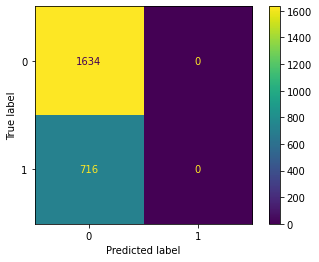

Validation Accuracy : 0.6950596252129472
Confusion matrix for validation : 



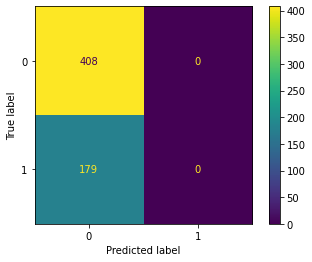

max_depth =  3
f1 score: 0.5739804338047972
Train Accuracy : 0.6978723404255319
Confusion matrix for training : 



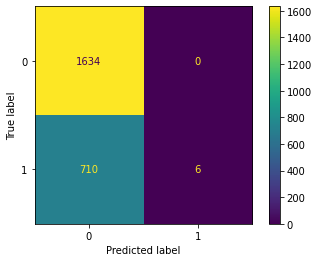

Validation Accuracy : 0.696763202725724
Confusion matrix for validation : 



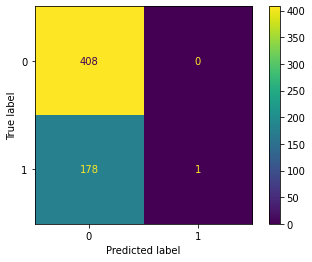

max_depth =  4
f1 score: 0.6304278274680278
Train Accuracy : 0.7076595744680851
Confusion matrix for training : 



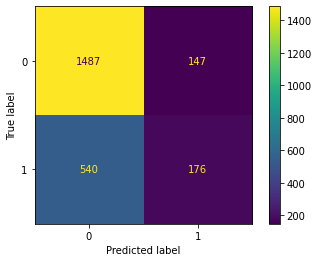

Validation Accuracy : 0.6695059625212947
Confusion matrix for validation : 



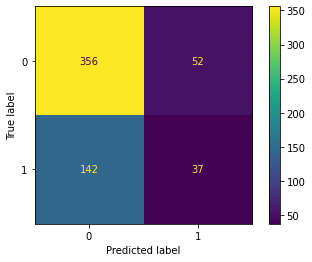

max_depth =  5
f1 score: 0.63157523907098
Train Accuracy : 0.7187234042553191
Confusion matrix for training : 



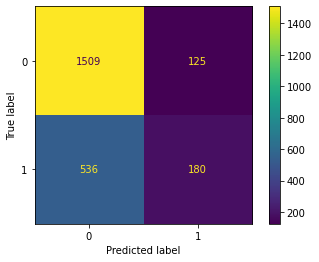

Validation Accuracy : 0.6729131175468483
Confusion matrix for validation : 



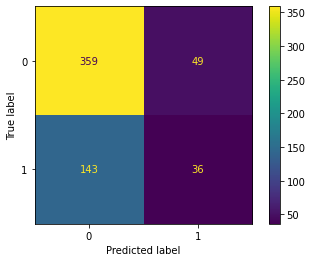

max_depth =  6
f1 score: 0.6355302280314719
Train Accuracy : 0.7263829787234043
Confusion matrix for training : 



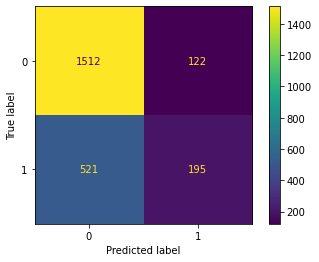

Validation Accuracy : 0.6729131175468483
Confusion matrix for validation : 



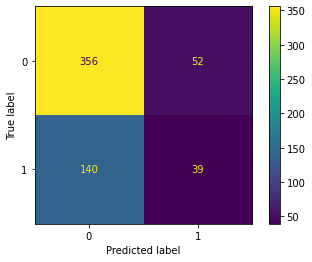

max_depth =  7
f1 score: 0.6581719754720988
Train Accuracy : 0.7523404255319149
Confusion matrix for training : 



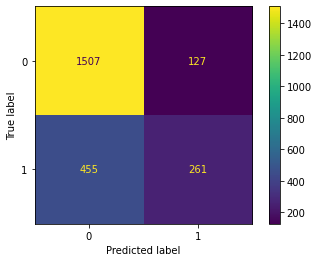

Validation Accuracy : 0.6831345826235093
Confusion matrix for validation : 



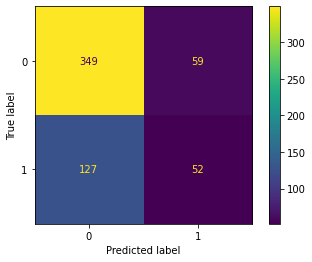

max_depth =  8
f1 score: 0.6574933969721567
Train Accuracy : 0.7817021276595745
Confusion matrix for training : 



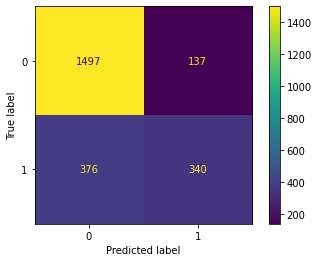

Validation Accuracy : 0.6797274275979557
Confusion matrix for validation : 



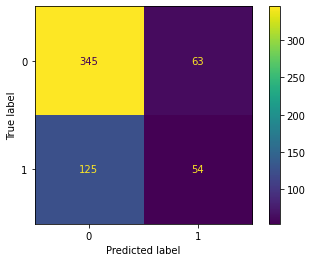

max_depth =  9
f1 score: 0.6388969378469043
Train Accuracy : 0.8034042553191489
Confusion matrix for training : 



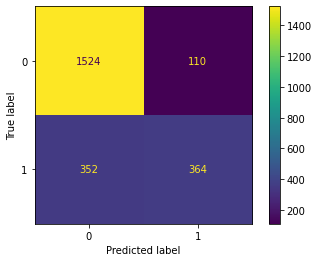

Validation Accuracy : 0.6678023850085179
Confusion matrix for validation : 



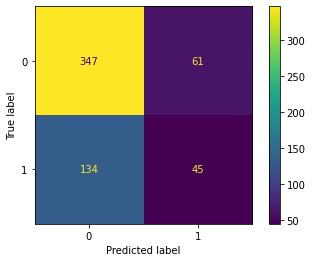

max_depth =  10
f1 score: 0.6373834593426044
Train Accuracy : 0.8446808510638298
Confusion matrix for training : 



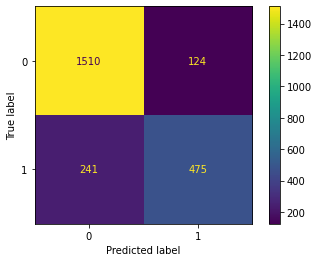

Validation Accuracy : 0.6507666098807495
Confusion matrix for validation : 



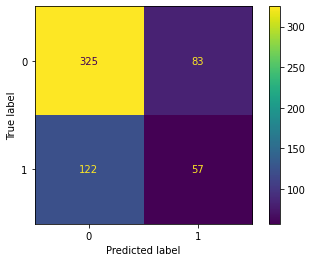

max_depth =  11
f1 score: 0.6413676270391739
Train Accuracy : 0.8757446808510638
Confusion matrix for training : 



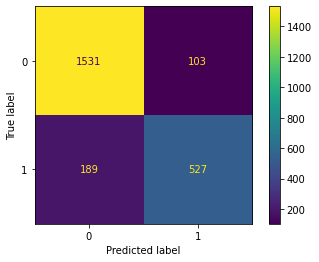

Validation Accuracy : 0.6507666098807495
Confusion matrix for validation : 



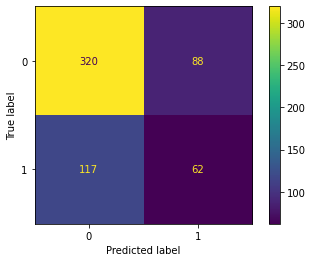

max_depth =  12
f1 score: 0.6401000374167046
Train Accuracy : 0.8991489361702127
Confusion matrix for training : 



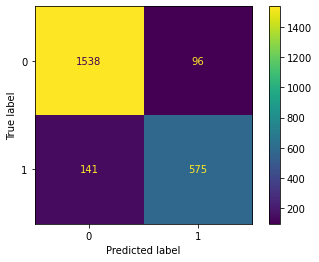

Validation Accuracy : 0.645655877342419
Confusion matrix for validation : 



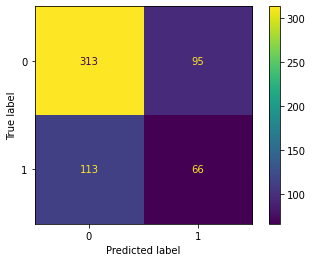

max_depth =  13
f1 score: 0.6428479943784795
Train Accuracy : 0.9234042553191489
Confusion matrix for training : 



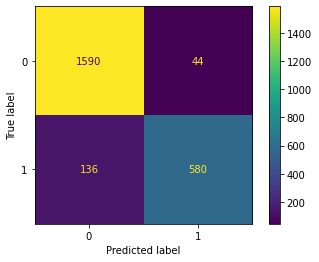

Validation Accuracy : 0.6507666098807495
Confusion matrix for validation : 



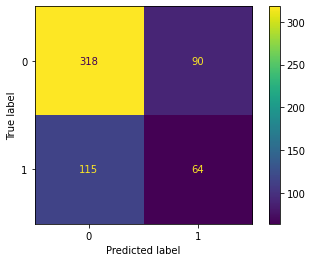

max_depth =  14
f1 score: 0.6310905760039485
Train Accuracy : 0.9412765957446808
Confusion matrix for training : 



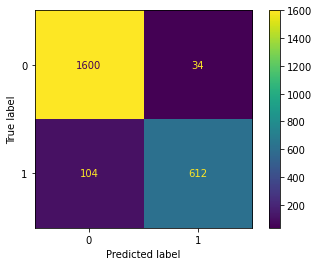

Validation Accuracy : 0.6354344122657581
Confusion matrix for validation : 



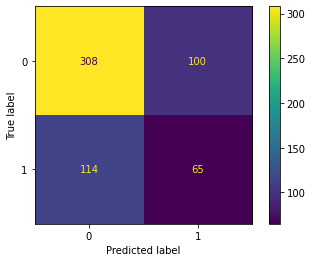

max_depth =  15
f1 score: 0.6171734322661854
Train Accuracy : 0.9565957446808511
Confusion matrix for training : 



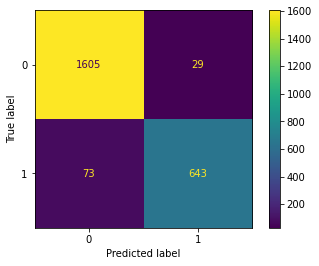

Validation Accuracy : 0.6183986371379898
Confusion matrix for validation : 



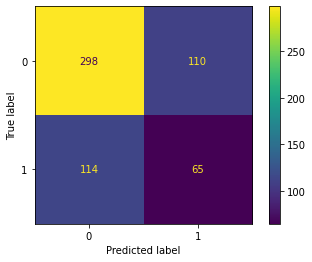

max_depth =  16
f1 score: 0.6261777915716116
Train Accuracy : 0.9672340425531915
Confusion matrix for training : 



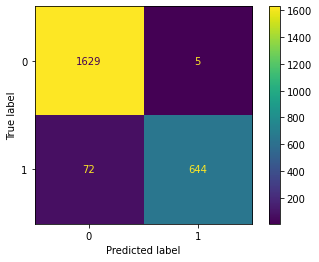

Validation Accuracy : 0.6337308347529813
Confusion matrix for validation : 



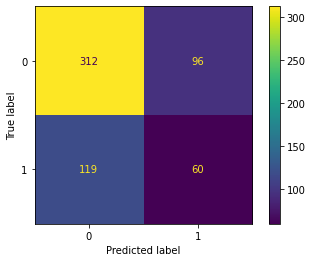

max_depth =  17
f1 score: 0.6166073070010832
Train Accuracy : 0.9808510638297873
Confusion matrix for training : 



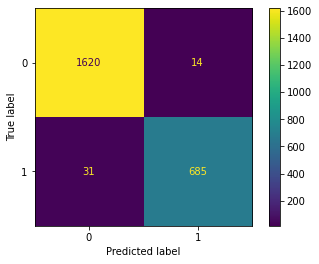

Validation Accuracy : 0.6201022146507666
Confusion matrix for validation : 



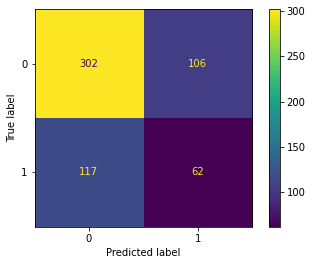

max_depth =  18
f1 score: 0.6041429866927575
Train Accuracy : 0.9868085106382979
Confusion matrix for training : 



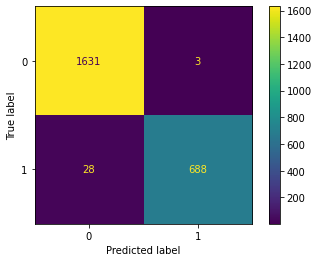

Validation Accuracy : 0.6047700170357752
Confusion matrix for validation : 



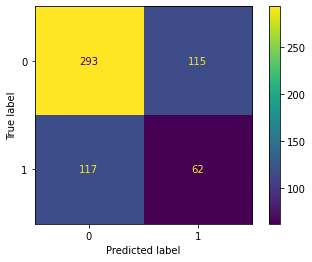

max_depth =  19
f1 score: 0.6131415333423763
Train Accuracy : 0.9923404255319149
Confusion matrix for training : 



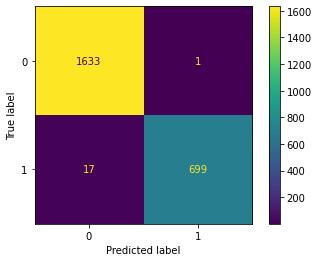

Validation Accuracy : 0.6183986371379898
Confusion matrix for validation : 



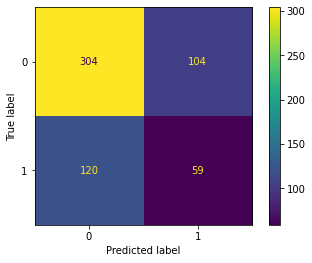

max_depth =  20
f1 score: 0.6159234120679142
Train Accuracy : 0.9953191489361702
Confusion matrix for training : 



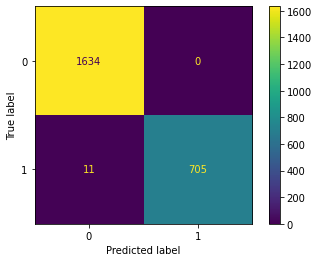

Validation Accuracy : 0.6201022146507666
Confusion matrix for validation : 



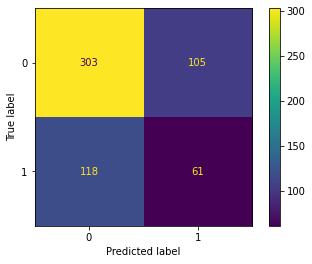

In [ ]:
skf =StratifiedKFold(n_splits=5, shuffle =True, random_state = 50)
skf.get_n_splits(X, y)

# The purpose of the K-fold is to prevent the classifier from over fitting the training data. 
# So on each fold you keep a separate test set which the classifier has not seen and verify the accuracy on it. 
# You average your prediction to see how best your classifier is performing.
X = X_train_1
y = y_train_1
num = []
depth = []
f1score  = [] 
accuracy_train = []
accuracy_val = []
num_top_features = []
user_normFollowersCount = []
user_r_followingCount  = []
user_normTweetsCount = []
user_tweetsCount = []
hist_r_emotion_other = []
user_r_listCount =[]
hist_emotion_sadness = []
tweet_normTopic_learningeducational= []
hist_r_normTopic_fitnesshealth = []
user_normRepliesCount = []
for x in range(2,21):
    depth.append(x)
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        # print(f'Num in Training: { len(X_train) } ')
        # print(f'Num in Test: { len(X_test) } ')
        y_train, y_val = y[train_index], y[val_index]
        
        
        # imputer = KNNImputer(n_neighbors=3) #change nn 
        # X_train = imputer.fit_transform(X_train)
        # X_test = imputer.fit_transform(X_test)
        
        clf = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f = f1_score(y_true = y_val , y_pred = y_pred,average = 'weighted')
        # evaluate_model(clf)
    print("max_depth = ", x)  
    # print('KFold CrossValScore Using Decision Tree %s' % cross_val_score(clf,X, y, cv=10).mean()) 
    print("f1 score:", f)
    f1score.append(f)
    print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
    accuracy_train.append( accuracy_score(y_train, clf.predict(X_train)))
    cm_train =  confusion_matrix(y_train, clf.predict(X_train)) #values 
    cm_test = confusion_matrix(y_val, clf.predict(X_val))
    
    print("Confusion matrix for training : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()    

    print("Validation Accuracy :", accuracy_score(y_val,y_pred))
    accuracy_val.append(accuracy_score(y_val,y_pred))
    print("Confusion matrix for validation : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()  

    count = 0
    for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)  :
        if (importance) != 0.0:
            count +=1

    num.append(count)

    # for importance, name in sorted(zip( clf.feature_importances_, df2.drop('retweeted_label',axis=1).columns),reverse=True)[:10]:
    #     print(name, importance)
    # print("\n--------------------------------------\n")

In [ ]:
num

[3, 7, 10, 18, 24, 29, 34, 36, 39, 39, 40, 40, 41, 41, 40, 41, 41, 40, 41]

In [ ]:
f1score

[0.5700187479133315,
 0.5739804338047972,
 0.6304278274680278,
 0.63157523907098,
 0.6355302280314719,
 0.6581719754720988,
 0.6574933969721567,
 0.6388969378469043,
 0.6373834593426044,
 0.6413676270391739,
 0.6401000374167046,
 0.6428479943784795,
 0.6310905760039485,
 0.6171734322661854,
 0.6261777915716116,
 0.6166073070010832,
 0.6041429866927575,
 0.6131415333423763,
 0.6159234120679142]

In [ ]:
accuracy_val

[0.6950596252129472,
 0.696763202725724,
 0.6695059625212947,
 0.6729131175468483,
 0.6729131175468483,
 0.6831345826235093,
 0.6797274275979557,
 0.6678023850085179,
 0.6507666098807495,
 0.6507666098807495,
 0.645655877342419,
 0.6507666098807495,
 0.6354344122657581,
 0.6183986371379898,
 0.6337308347529813,
 0.6201022146507666,
 0.6047700170357752,
 0.6183986371379898,
 0.6201022146507666]

0.6175865128660158
Train Accuracy : 0.7076595744680851
Confusion matrix for training : 



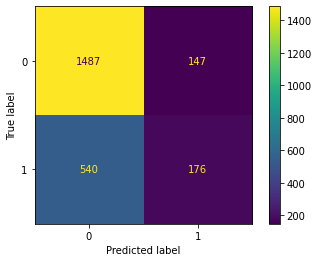

Test Accuracy : 0.6632653061224489
Confusion matrix for test : 



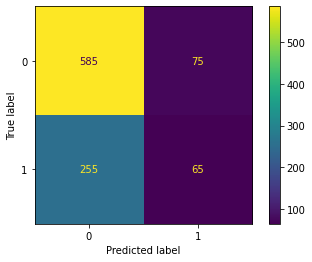

user_normFollowersCount 0.2607519149562382
user_normTweetsCount 0.1408952352282691
user_r_followingCount 0.12429491933243064
user_r_normFollowersCount 0.11681300152283727
user_r_followersCount 0.08619408100985466
user_normRepliesCount 0.06917871183012365
user_normFollowingCount 0.06193411476032644
user_tweetsCount 0.055808404815507244
user_normStatusesCount 0.0504285107072058
user_r_normMentionedInf 0.033701105837207083
user_statusesCount 0.0
user_retweetsCount 0.0
user_repliesCount 0.0
user_r_tweetsCount 0.0
user_r_statusesCount 0.0
user_r_retweetsCount 0.0
user_r_repliesCount 0.0
user_r_normTweetsCount 0.0
user_r_normStatusesCount 0.0
user_r_normRetweetsCount 0.0
user_r_normRepliesCount 0.0
user_r_normListCount 0.0
user_r_normFollowingCount 0.0
user_r_normFavouritesCount 0.0
user_r_mentionedInf 0.0
user_r_listCount 0.0
user_r_isVerified 0.0
user_r_hasURL 0.0
user_r_favouritesCount 0.0
user_r_defaultPhoto 0.0
user_r_daysAccountCreation 0.0
user_normRetweetsCount 0.0
user_normMentioned

In [ ]:
clf = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
print(f)
cm_train =  confusion_matrix(y_train, clf.predict(X_train))
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Confusion matrix for training : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=clf.classes_)
disp.plot()
plt.show() 
print("Test Accuracy :", accuracy_score(y_test,y_pred))
print("Confusion matrix for test : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=clf.classes_)
disp.plot()
plt.show()      
for importance, name in sorted(zip( clf.feature_importances_, df2.drop('retweeted_label',axis=1).columns),reverse=True):
        print(name, importance)
print("\n--------------------------------------\n")

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test,y_pred,
                              average='weighted'))

print ('Precision:', precision_score(y_test,y_pred,
                                    average='weighted'))


Recall: 0.6632653061224489
Precision: 0.6206268221574344


In [ ]:
merged_df

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


## All features

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = merged_df.drop('retweeted_label',axis=1).values
y = merged_df['retweeted_label'].values

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (3916, 179)
X_test shape: (980, 179)
y_train shape: (3916,)
y_test shape: (980,)
X_val shape: (3916,)
y val shape: (980,)


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

max_depth =  2
f1 score: 0.5715659142568722
Precision:  0.4847581218185419
Recall:  0.6962457337883959
Train Accuracy : 0.6951588502269289
Confusion matrix for training : 



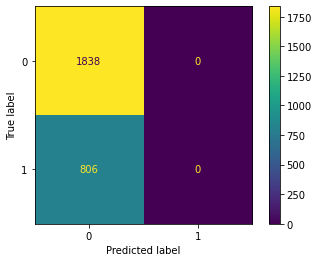

Validation Accuracy : 0.6962457337883959
Confusion matrix for validation : 



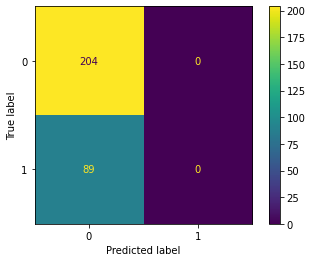

user_normTweetsCount 0.37923771973952686
user_normFollowersCount 0.3602674163525756
user_r_followingCount 0.26049486390789756
user_tweetsCount 0.0
user_statusesCount 0.0
user_retweetsCount 0.0
user_repliesCount 0.0
user_r_tweetsCount 0.0
user_r_statusesCount 0.0
user_r_retweetsCount 0.0

--------------------------------------



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth =  3
f1 score: 0.5715659142568722
Precision:  0.4847581218185419
Recall:  0.6962457337883959
Train Accuracy : 0.6981845688350984
Confusion matrix for training : 



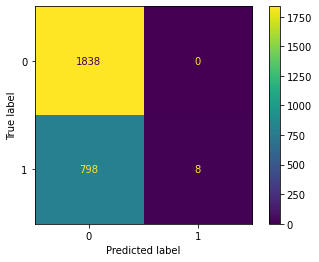

Validation Accuracy : 0.6962457337883959
Confusion matrix for validation : 



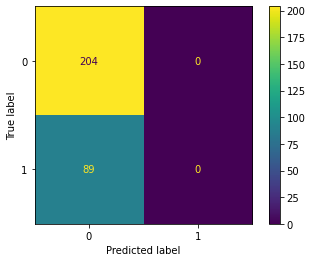

user_normTweetsCount 0.2440302484479565
user_normFollowersCount 0.23182331963341135
user_r_followingCount 0.1676221089044674
user_normFollowingCount 0.10366577227034149
user_r_followersCount 0.09352472441152437
hist_r_normTopic_arts&culture 0.09035626126728234
tweet_normTopic_filmtv&video 0.06897756506501654
user_tweetsCount 0.0
user_statusesCount 0.0
user_retweetsCount 0.0

--------------------------------------

max_depth =  4
f1 score: 0.590692227585935
Precision:  0.6086276969090316
Recall:  0.689419795221843
Train Accuracy : 0.7015885022692889
Confusion matrix for training : 



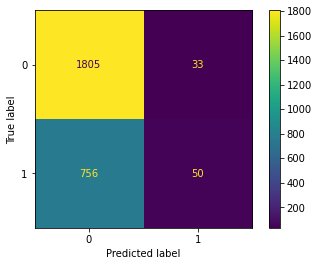

Validation Accuracy : 0.689419795221843
Confusion matrix for validation : 



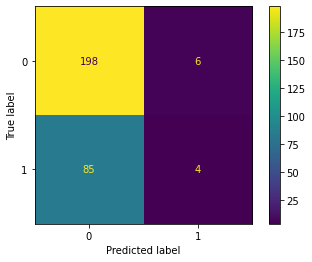

user_normTweetsCount 0.22571141170370881
user_normFollowersCount 0.1662153278720786
user_r_followingCount 0.12018361152891462
user_normFollowingCount 0.07432746780727086
user_r_followersCount 0.06705642364534094
hist_r_normTopic_arts&culture 0.06478466280090309
hist_normTopic_arts&culture 0.05638172858897144
hist_r_normSentiment_neu 0.05154660220822266
tweet_normTopic_filmtv&video 0.049456321353820165
user_normListCount 0.04799945056824762

--------------------------------------

max_depth =  5
f1 score: 0.6325311103366696
Precision:  0.6230451977001911
Recall:  0.6518771331058021
Train Accuracy : 0.7155824508320726
Confusion matrix for training : 



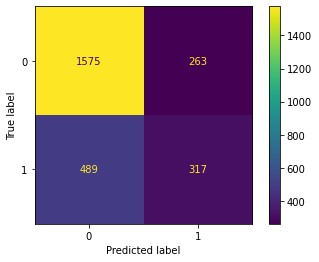

Validation Accuracy : 0.6518771331058021
Confusion matrix for validation : 



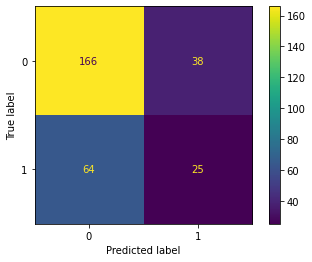

user_normTweetsCount 0.15258288387313448
user_normFollowersCount 0.11236301203916314
user_r_followingCount 0.10268622087373648
user_r_followersCount 0.08732605661092777
user_normFollowingCount 0.05024601682040075
hist_r_normTopic_arts&culture 0.04379499736542539
hist_normTopic_arts&culture 0.038114540514019815
hist_r_emotion_anger 0.03726911826813951
user_normStatusesCount 0.03710730420753683
hist_r_normSentiment_neu 0.03484595288924268

--------------------------------------

max_depth =  6
f1 score: 0.6041273797104314
Precision:  0.5913127969258862
Recall:  0.6279863481228669
Train Accuracy : 0.7428139183055976
Confusion matrix for training : 



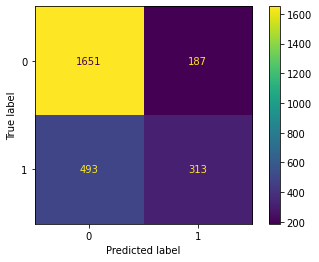

Validation Accuracy : 0.6279863481228669
Confusion matrix for validation : 



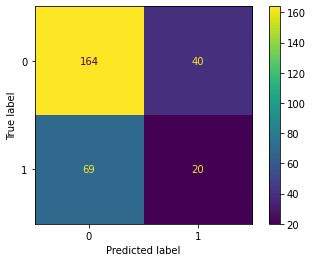

user_normTweetsCount 0.10401257986793666
user_normFollowersCount 0.09902059727933207
user_r_followingCount 0.06999906201043209
user_r_followersCount 0.05068868399370621
tweet_normTopic_filmtv&video 0.04599817866383708
tweet_normEmotion_surprise 0.03956592626583082
user_normFollowingCount 0.03425166509451333
hist_r_normTopic_arts&culture 0.029854139243264296
user_r_normRetweetsCount 0.026675829766098065
hist_normTopic_arts&culture 0.02598188989952765

--------------------------------------

max_depth =  7
f1 score: 0.6060830831045698
Precision:  0.5977269539567917
Recall:  0.6177474402730375
Train Accuracy : 0.7757186081694403
Confusion matrix for training : 



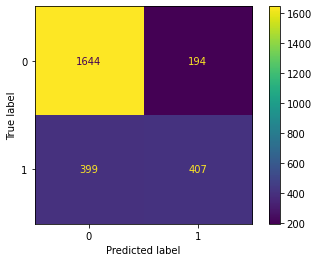

Validation Accuracy : 0.6177474402730375
Confusion matrix for validation : 



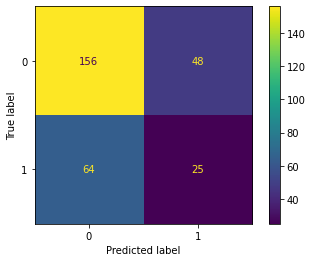

user_normFollowersCount 0.08082634153279158
user_normTweetsCount 0.0751435466313863
user_r_followingCount 0.05057059239385011
user_normStatusesCount 0.0382978336941069
user_r_followersCount 0.03661987323264945
tweet_normEmotion_surprise 0.03621691442074065
tweet_normTopic_filmtv&video 0.03323123306597633
hist_r_emotion_other 0.03235118656640593
user_normListCount 0.031593297897699435
hist_normTopic_arts&culture 0.028747087422109612

--------------------------------------

max_depth =  8
f1 score: 0.6302040214010579
Precision:  0.6290634463410463
Recall:  0.6313993174061433
Train Accuracy : 0.7980332829046899
Confusion matrix for training : 



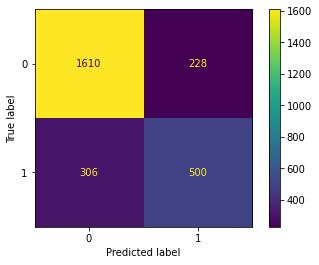

Validation Accuracy : 0.6313993174061433
Confusion matrix for validation : 



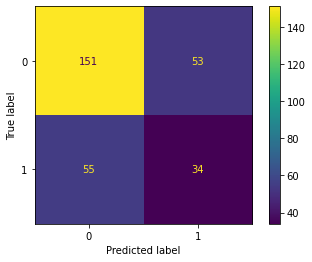

user_normTweetsCount 0.0591844928202512
user_normFollowersCount 0.056343990661289145
user_normStatusesCount 0.04023960196695167
user_r_followingCount 0.039830364637055124
tweet_normTopic_filmtv&video 0.0394205201155404
user_r_followersCount 0.0288425117202412
hist_normTopic_music 0.026833213586353686
hist_r_emotion_other 0.025480412555698072
user_r_normFollowersCount 0.022974068066679856
tweet_normEmotion_surprise 0.02251351982596589

--------------------------------------

max_depth =  9
f1 score: 0.6331915123623616
Precision:  0.6290492737999553
Recall:  0.6382252559726962
Train Accuracy : 0.8260211800302572
Confusion matrix for training : 



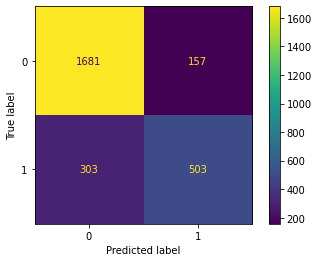

Validation Accuracy : 0.6382252559726962
Confusion matrix for validation : 



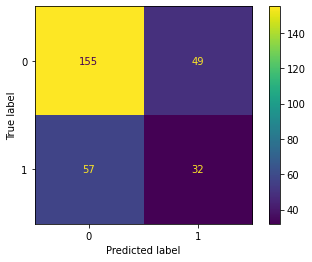

user_normTweetsCount 0.05112062387391026
user_normFollowersCount 0.04618072255707831
user_normStatusesCount 0.03298122607988768
user_r_followingCount 0.032645806537002234
tweet_normTopic_filmtv&video 0.032309889327066056
tweet_normEmotion_surprise 0.02448743487998534
hist_emotion_surprise 0.024336803337478806
user_r_followersCount 0.023639930646887252
hist_normTopic_music 0.021993067537503946
hist_r_emotion_other 0.020884283293817803

--------------------------------------

max_depth =  10
f1 score: 0.617979066860598
Precision:  0.6151290030848142
Recall:  0.621160409556314
Train Accuracy : 0.8559001512859304
Confusion matrix for training : 



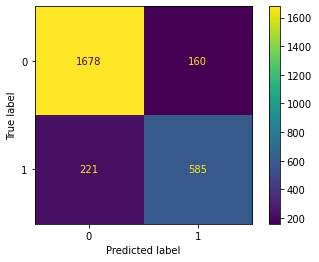

Validation Accuracy : 0.621160409556314
Confusion matrix for validation : 



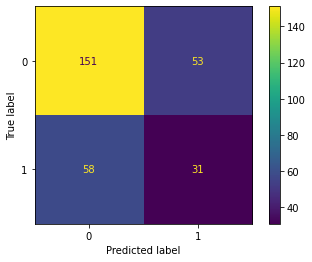

user_normTweetsCount 0.04229133653976322
user_normFollowersCount 0.03783133279149475
user_r_followingCount 0.0304981583317541
user_r_followersCount 0.030307642253983535
user_normStatusesCount 0.02701828101882986
tweet_normTopic_filmtv&video 0.02646832071710947
hist_r_normTopic_music 0.022515719153702207
user_r_normFollowersCount 0.0215046258913869
tweet_normEmotion_sadness 0.020665207700879366
tweet_normEmotion_joy 0.02035143247626886

--------------------------------------

max_depth =  11
f1 score: 0.6182646878790479
Precision:  0.6228387415325445
Recall:  0.6143344709897611
Train Accuracy : 0.8903177004538578
Confusion matrix for training : 



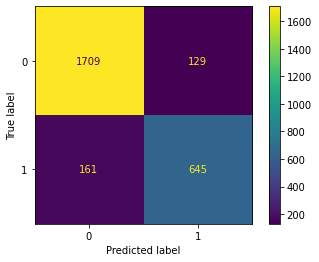

Validation Accuracy : 0.6143344709897611
Confusion matrix for validation : 



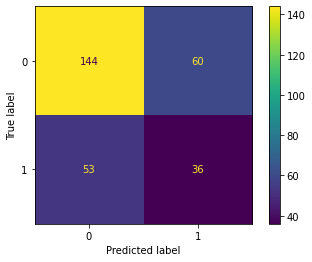

user_normTweetsCount 0.035926132438829216
user_normFollowersCount 0.03556629187308144
tweet_normTopic_filmtv&video 0.02895878313979384
user_r_followersCount 0.025450265551642228
user_normStatusesCount 0.02476934204079774
user_r_followingCount 0.02271838089791702
hist_emotion_surprise 0.021674279580703656
user_r_normFollowersCount 0.021136937073839315
tweet_normEmotion_sadness 0.020983813901804482
user_repliesCount 0.020767397998009696

--------------------------------------

max_depth =  12
f1 score: 0.6110958068040322
Precision:  0.6081815615675863
Recall:  0.6143344709897611
Train Accuracy : 0.9130105900151286
Confusion matrix for training : 



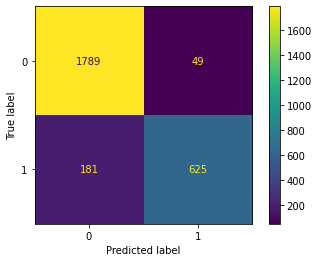

Validation Accuracy : 0.6143344709897611
Confusion matrix for validation : 



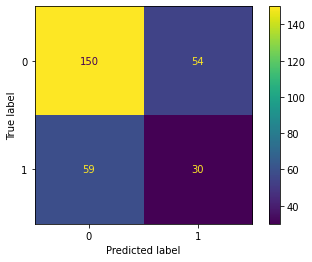

user_normTweetsCount 0.03662081287725767
tweet_normTopic_filmtv&video 0.028910344301397557
user_normFollowersCount 0.02788936836310809
user_normStatusesCount 0.02738177762557546
user_r_followersCount 0.019853168469517173
user_r_followingCount 0.01971538931414285
hist_r_normTopic_music 0.017613856026894838
user_r_normFollowersCount 0.017279034243960913
user_repliesCount 0.01669017501175511
hist_normTopic_music 0.016569984652773023

--------------------------------------

max_depth =  13
f1 score: 0.6178907165524734
Precision:  0.6125413801832982
Recall:  0.6245733788395904
Train Accuracy : 0.9292738275340393
Confusion matrix for training : 



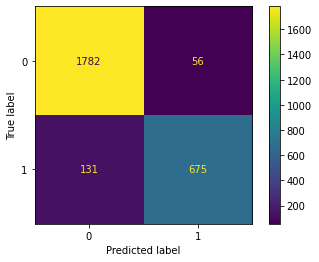

Validation Accuracy : 0.6245733788395904
Confusion matrix for validation : 



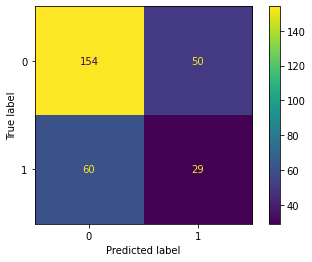

user_normTweetsCount 0.03580529250954944
user_normStatusesCount 0.02882082642821738
tweet_normTopic_filmtv&video 0.027446988210296286
user_normFollowersCount 0.026477691053227403
user_r_followingCount 0.026071463396408395
user_r_normFollowersCount 0.02138442726310222
hist_emotion_surprise 0.02105032525397076
user_r_followersCount 0.020201853593491564
tweet_normEmotion_joy 0.018550735699725845
hist_r_normTopic_music 0.01672229474917282

--------------------------------------

max_depth =  14
f1 score: 0.6029211119864809
Precision:  0.6098332467918337
Recall:  0.5972696245733788
Train Accuracy : 0.9568835098335855
Confusion matrix for training : 



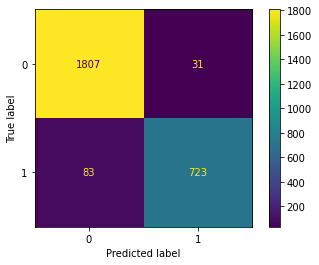

Validation Accuracy : 0.5972696245733788
Confusion matrix for validation : 



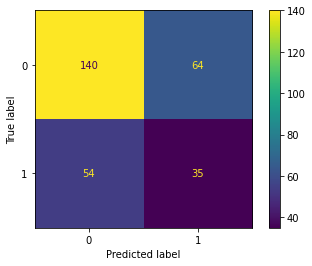

user_normTweetsCount 0.03286434484778778
user_normFollowersCount 0.025425266816666413
tweet_normTopic_filmtv&video 0.02435601009000812
user_r_followingCount 0.022582713941727447
user_normStatusesCount 0.022050639313342824
user_r_normFollowersCount 0.021345863197157287
user_r_followersCount 0.01672563863374039
hist_emotion_surprise 0.016681967002585243
user_normListCount 0.016342375616726416
tweet_normEmotion_sadness 0.015096716479248725

--------------------------------------

max_depth =  15
f1 score: 0.6083380656336732
Precision:  0.6059603416057943
Recall:  0.6109215017064846
Train Accuracy : 0.9625567322239031
Confusion matrix for training : 



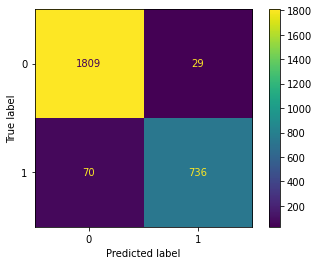

Validation Accuracy : 0.6109215017064846
Confusion matrix for validation : 



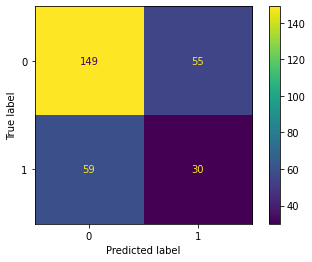

user_normTweetsCount 0.030137130154881533
user_normFollowersCount 0.029603884015481793
tweet_normTopic_filmtv&video 0.024299064856920485
user_r_followersCount 0.022058409106045698
user_normStatusesCount 0.021999084120567437
user_r_followingCount 0.019756931326244943
tweet_normEmotion_joy 0.01841621051643324
user_r_normFollowersCount 0.01838070828360691
hist_r_normSentiment_comp 0.015492281531334697
hist_normTopic_filmtv&video 0.014406326391328644

--------------------------------------

max_depth =  16
f1 score: 0.610435627125065
Precision:  0.6136845727439025
Recall:  0.6075085324232082
Train Accuracy : 0.9754160363086233
Confusion matrix for training : 



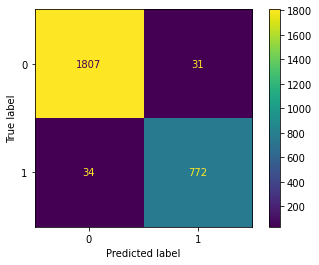

Validation Accuracy : 0.6075085324232082
Confusion matrix for validation : 



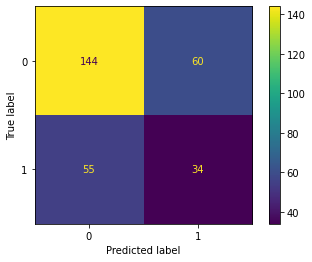

user_normTweetsCount 0.03141177828073885
user_normFollowersCount 0.025209432022526405
tweet_normTopic_filmtv&video 0.023112472346160196
user_normStatusesCount 0.022358828920380897
user_r_followingCount 0.021954174795301235
user_r_followersCount 0.020664144121492416
user_statusesCount 0.01923960932273843
user_r_normFollowersCount 0.016222154280548857
tweet_normEmotion_joy 0.015621144388439699
hist_r_normTopic_food&dining 0.01538985224895988

--------------------------------------

max_depth =  17
f1 score: 0.603660594553327
Precision:  0.6069544220996056
Recall:  0.6006825938566553
Train Accuracy : 0.9901664145234493
Confusion matrix for training : 



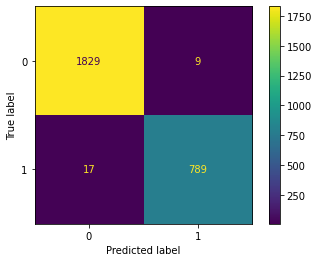

Validation Accuracy : 0.6006825938566553
Confusion matrix for validation : 



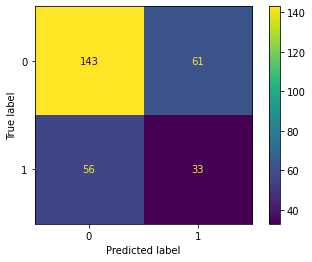

user_normFollowersCount 0.03127972508283844
user_normTweetsCount 0.027702189032870226
user_normStatusesCount 0.027098184234344694
user_r_followingCount 0.02246699758155236
tweet_normTopic_filmtv&video 0.022335812485428444
user_statusesCount 0.021068127678417897
hist_emotion_surprise 0.02029323202639191
user_r_normFollowersCount 0.018375251443013278
user_r_followersCount 0.018137710336847686
tweet_normEmotion_sadness 0.014985842220403707

--------------------------------------

max_depth =  18
f1 score: 0.6057882564819452
Precision:  0.6119228893972921
Recall:  0.6006825938566553
Train Accuracy : 0.9939485627836612
Confusion matrix for training : 



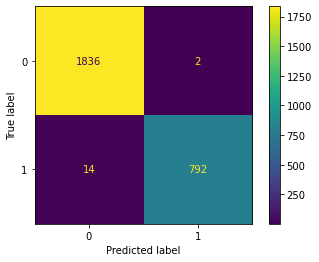

Validation Accuracy : 0.6006825938566553
Confusion matrix for validation : 



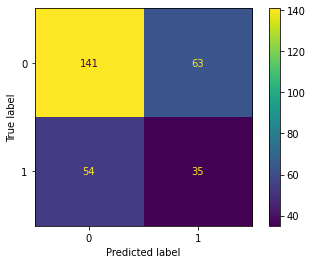

user_normTweetsCount 0.03043148397409912
user_normFollowersCount 0.02704557931974982
user_normStatusesCount 0.023373979831330764
user_r_followingCount 0.022462142160481972
tweet_normTopic_filmtv&video 0.021992169908266166
hist_emotion_surprise 0.019722013633141525
user_r_normFollowersCount 0.01927416882057681
hist_r_normTopic_music 0.016638531400142816
hist_r_normTopic_diaries&dailylife 0.01523468160391382
user_r_followersCount 0.015102354010289245

--------------------------------------

max_depth =  19
f1 score: 0.5923109319172254
Precision:  0.5985828408549033
Recall:  0.5870307167235495
Train Accuracy : 0.9950832072617246
Confusion matrix for training : 



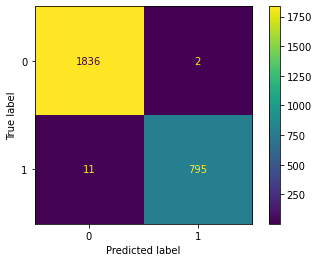

Validation Accuracy : 0.5870307167235495
Confusion matrix for validation : 



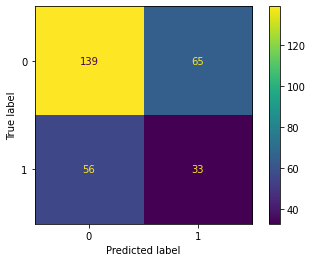

user_normTweetsCount 0.02704454989096871
user_normStatusesCount 0.024322269460593862
user_normFollowersCount 0.023300547381221018
tweet_normTopic_filmtv&video 0.021805569025636833
user_r_followingCount 0.018919204947122212
user_r_followersCount 0.017707128181486988
hist_normTopic_filmtv&video 0.01676996809377219
user_r_normFollowersCount 0.015304866550453907
user_repliesCount 0.014994647042955686
tweet_normEmotion_joy 0.014737840985590264

--------------------------------------

max_depth =  20
f1 score: 0.6132709584201492
Precision:  0.6158281037836251
Recall:  0.6109215017064846
Train Accuracy : 0.9988653555219364
Confusion matrix for training : 



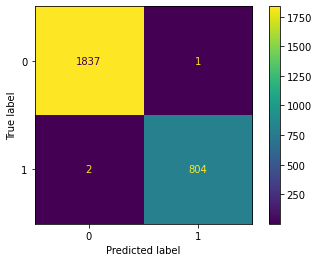

Validation Accuracy : 0.6109215017064846
Confusion matrix for validation : 



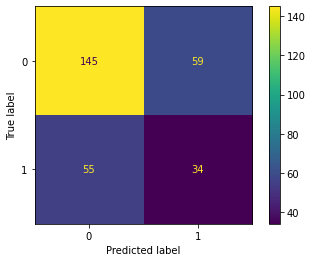

user_normTweetsCount 0.030519372214804705
user_normFollowersCount 0.02569567101230458
user_normStatusesCount 0.0222706572958906
tweet_normTopic_filmtv&video 0.021589843751294822
user_r_followingCount 0.018885691753958243
tweet_normEmotion_sadness 0.01786961108980246
user_r_followersCount 0.0175319493049225
hist_r_normTopic_music 0.01633414504700945
hist_emotion_surprise 0.015434028945655766
user_r_normFollowersCount 0.015153453554467294

--------------------------------------



In [ ]:
skf =StratifiedKFold(n_splits=10)
skf.get_n_splits(X, y)

# The purpose of the K-fold is to prevent the classifier from over fitting the training data. 
# So on each fold you keep a separate test set which the classifier has not seen and verify the accuracy on it. 
# You average your prediction to see how best your classifier is performing.
X = X_train_1
y = y_train_1
depth = []
f1score  = [] 
accuracy_train = []
accuracy_val = []
num_top_features = []
user_normFollowersCount = []
user_r_followingCount  = []
user_normTweetsCount = []
user_tweetsCount = []
hist_r_emotion_other = []
user_r_listCount =[]
hist_emotion_sadness = []
tweet_normTopic_learningeducational= []
hist_r_normTopic_fitnesshealth = []
user_normRepliesCount = []
for x in range(2,21):
    depth.append(x)
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        # print(f'Num in Training: { len(X_train) } ')
        # print(f'Num in Test: { len(X_test) } ')
        y_train, y_val = y[train_index], y[val_index]
        
        
        # imputer = KNNImputer(n_neighbors=3) #change nn 
        # X_train = imputer.fit_transform(X_train)
        # X_test = imputer.fit_transform(X_test)
        
        clf = DecisionTreeClassifier( criterion = "entropy", max_depth= x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f = f1_score(y_true = y_val , y_pred = y_pred,average = 'weighted')

        #calculating precision and reall
        precision = precision_score(y_true = y_val , y_pred = y_pred,average = 'weighted')
        recall = recall_score(y_true = y_val , y_pred = y_pred,average = 'weighted')
        

        # evaluate_model(clf)
    print("max_depth = ", x)  
    # print('KFold CrossValScore Using Decision Tree %s' % cross_val_score(clf,X, y, cv=10).mean()) 
    print("f1 score:", f)
    print('Precision: ',precision)
    print('Recall: ',recall)
    f1score.append(f)
    print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
    accuracy_train.append( accuracy_score(y_train, clf.predict(X_train)))
    cm_train =  confusion_matrix(y_train, clf.predict(X_train)) #values 
    cm_test = confusion_matrix(y_val, clf.predict(X_val))
    
    print("Confusion matrix for training : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()    

    print("Validation Accuracy :", accuracy_score(y_val,y_pred))
    accuracy_val.append(accuracy_score(y_val,y_pred))
    print("Confusion matrix for validation : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()  



    count = 0
    for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)  :
        if (importance) != 0.0:
            count +=1
        if name == "user_normFollowersCount":
            user_normFollowersCount.append((x,importance))
        if name == "user_r_followingCount":
            user_r_followingCount.append((x,importance))
        if name == "user_normTweetsCount":
            user_normTweetsCount.append((x,importance))
        if name == "user_tweetsCount":
            user_tweetsCount.append((x,importance))
        if name == "hist_r_emotion_other":
            hist_r_emotion_other.append((x,importance))
        if name == "user_r_listCount":
            user_r_listCount.append((x,importance))
        if name == "hist_emotion_sadness":
            hist_emotion_sadness.append((x,importance))
        if name == "tweet_normTopic_learning&educational":
            tweet_normTopic_learningeducational.append((x,importance))
        if name == "hist_r_normTopic_fitness&health":
            hist_r_normTopic_fitnesshealth.append((x,importance))
        if name == "user_normRepliesCount":
            user_normRepliesCount.append((x,importance))
            

    num_top_features.append(count)

    for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)[:10]:
        print(name, importance)
    print("\n--------------------------------------\n")

In [ ]:
print(    user_normFollowersCount)
print("------------")
print(    user_r_followingCount )
print("------------")
print(    user_normTweetsCount)
print("------------")
print(    user_tweetsCount)
print("------------")
print(     hist_r_emotion_other)
print("------------")
print(    user_r_listCount)
print("------------")
print(     hist_emotion_sadness)
print("------------")
print(     tweet_normTopic_learningeducational)
print("------------")
print(     hist_r_normTopic_fitnesshealth)
print("------------")
print(     user_normRepliesCount )

[(2, 0.44513152990713023), (3, 0.29975425240164943), (4, 0.18541628913513392), (5, 0.11569010975918788), (6, 0.08046534569094305), (7, 0.06264432227756937), (8, 0.05125059695106154), (9, 0.042690992201623465), (10, 0.03653259136360561), (11, 0.03743353462272593), (12, 0.03405663122892119), (13, 0.03418639650919692), (14, 0.03945529176999323), (15, 0.0354953017627459), (16, 0.03406477084721146), (17, 0.03982390567940291), (18, 0.03605552802155206), (19, 0.03973919100677385), (20, 0.04227920676641539)]
------------
[(2, 0.2600674668505327), (3, 0.1751309980581168), (4, 0.10832920471452728), (5, 0.06759178301974997), (6, 0.06490112283111013), (7, 0.050527178127388585), (8, 0.05092631013881733), (9, 0.04242086606463766), (10, 0.036301432346908954), (11, 0.03140973605604827), (12, 0.028413370544459117), (13, 0.030354677057245472), (14, 0.024302721857440698), (15, 0.02689129538354938), (16, 0.022411827151900893), (17, 0.02208155415731078), (18, 0.02195045749560807), (19, 0.021846170800452317

In [ ]:
f1score

[0.5700187479133315,
 0.5700187479133315,
 0.5988784111156907,
 0.6312597506183044,
 0.6367434545206985,
 0.618843270974907,
 0.6408563005141847,
 0.6154184229141639,
 0.6189730128097474,
 0.6161571252553423,
 0.6244893846971112,
 0.6200497202469766,
 0.6037085573417824,
 0.599780205913085,
 0.6172995694994232,
 0.6117731871340569,
 0.6232124822972213,
 0.6207084912178561,
 0.6219894446298982]

In [ ]:
accuracy_train

[0.6953191489361702,
 0.6953191489361702,
 0.7008510638297872,
 0.7336170212765958,
 0.754468085106383,
 0.7782978723404256,
 0.805531914893617,
 0.8417021276595744,
 0.8663829787234043,
 0.8978723404255319,
 0.914468085106383,
 0.9391489361702128,
 0.9617021276595744,
 0.9748936170212766,
 0.9872340425531915,
 0.9897872340425532,
 0.9931914893617021,
 0.9940425531914894,
 0.9961702127659574]

In [ ]:
accuracy_val

[0.6950596252129472,
 0.6950596252129472,
 0.6882453151618398,
 0.676320272572402,
 0.676320272572402,
 0.6609880749574105,
 0.666098807495741,
 0.645655877342419,
 0.6388415672913118,
 0.6303236797274276,
 0.6422487223168655,
 0.6252129471890971,
 0.6132879045996593,
 0.5979557069846678,
 0.6218057921635435,
 0.616695059625213,
 0.6235093696763203,
 0.6235093696763203,
 0.6235093696763203]

In [ ]:
num_top_features

[3,
 7,
 14,
 26,
 45,
 59,
 70,
 86,
 102,
 104,
 115,
 119,
 124,
 128,
 128,
 128,
 132,
 135,
 127]

Testing on testing set

0.5688653502573832
Train Accuracy : 0.7008510638297872
Confusion matrix for training : 



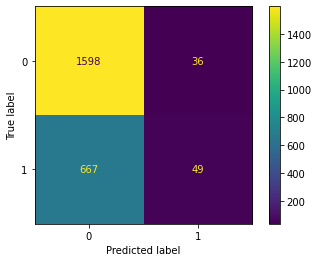

Test Accuracy : 0.6704081632653062
Confusion matrix for test : 



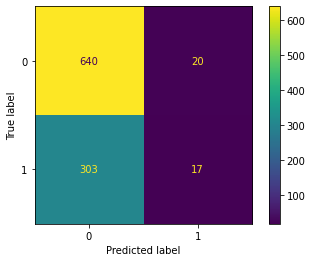

user_normFollowersCount 0.18541628913513392
user_normTweetsCount 0.12279720572908605
user_r_followingCount 0.10832920471452728
hist_r_emotion_other 0.08835159841557375
user_normRepliesCount 0.06029268835751539
user_normFollowingCount 0.05397866165985649
hist_r_normSentiment_neu 0.05244470982724532
tweet_normTopic_filmtv&video 0.050083986367557495
tweet_normTopic_youth&studentlife 0.04997203710382715
user_normFavouritesCount 0.04918640874218705
user_tweetsCount 0.048639800745844924
user_r_followersCount 0.046302310448112345
user_normStatusesCount 0.043950955430760476
hist_r_normTopic_celebrity&popculture 0.04025414332277239
user_statusesCount 0.0
user_retweetsCount 0.0
user_repliesCount 0.0
user_r_tweetsCount 0.0
user_r_statusesCount 0.0
user_r_retweetsCount 0.0
user_r_repliesCount 0.0
user_r_normTweetsCount 0.0
user_r_normStatusesCount 0.0
user_r_normRetweetsCount 0.0
user_r_normRepliesCount 0.0
user_r_normMentionedInf 0.0
user_r_normListCount 0.0
user_r_normFollowingCount 0.0
user_r_n

In [ ]:
clf = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
print(f)
cm_train =  confusion_matrix(y_train, clf.predict(X_train))
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Confusion matrix for training : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=clf.classes_)
disp.plot()
plt.show() 
print("Test Accuracy :", accuracy_score(y_test,y_pred))
print("Confusion matrix for test : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=clf.classes_)
disp.plot()
plt.show()      
for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True):
        print(name, importance)
print("\n--------------------------------------\n")

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_test,y_pred,
                              average='weighted'))

print ('Precision:', precision_score(y_test,y_pred,
                                    average='weighted'))

Recall: 0.6704081632653062
Precision: 0.6071011821655664


max_depth =  2
f1 score: 0.5767930084544504
Train Accuracy : 0.6968973747016707
Confusion matrix for training : 



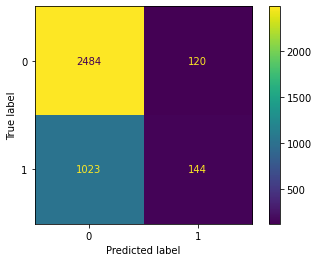

Validation Accuracy : 0.6827586206896552
Confusion matrix for validation : 



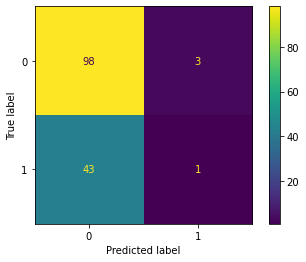

user_normFollowersCount 0.39051719100001375
user_normTweetsCount 0.38519854675559
hist_r_hateSpeech_hateful 0.22428426224439618
user_tweetsCount 0.0
user_statusesCount 0.0
user_retweetsCount 0.0
user_repliesCount 0.0
user_r_tweetsCount 0.0
user_r_statusesCount 0.0
user_r_retweetsCount 0.0

--------------------------------------

max_depth =  3
f1 score: 0.5767930084544504
Train Accuracy : 0.6968973747016707
Confusion matrix for training : 



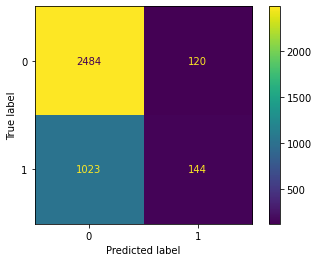

Validation Accuracy : 0.6827586206896552
Confusion matrix for validation : 



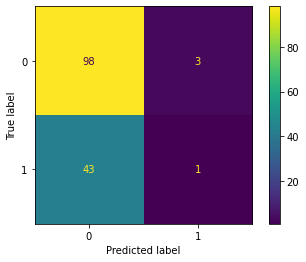

user_normFollowersCount 0.2456762013450185
user_normTweetsCount 0.24233021723883985
hist_r_hateSpeech_hateful 0.21858275644090783
user_r_followingCount 0.12667175376547887
user_normStatusesCount 0.10557815078044003
hist_emotion_fear 0.061160920429314855
user_tweetsCount 0.0
user_statusesCount 0.0
user_retweetsCount 0.0
user_repliesCount 0.0

--------------------------------------

max_depth =  4
f1 score: 0.5633583208395803
Train Accuracy : 0.7096260938743039
Confusion matrix for training : 



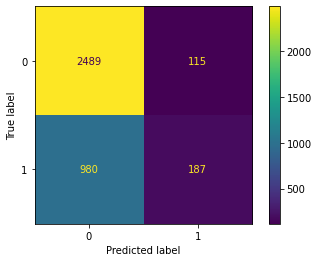

Validation Accuracy : 0.6275862068965518
Confusion matrix for validation : 



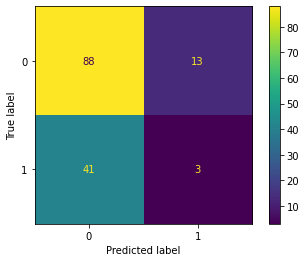

user_normFollowersCount 0.16890642119841429
user_normTweetsCount 0.16660600220110278
hist_r_hateSpeech_hateful 0.15027923308806485
user_tweetsCount 0.09861456803299551
user_r_followingCount 0.08708891003002163
user_normStatusesCount 0.07258671172641154
user_r_normFollowersCount 0.046648618824418904
hist_emotion_fear 0.04204913675138125
hist_r_normSentiment_neu 0.04142194633994073
user_r_daysAccountCreation 0.04037902138116011

--------------------------------------

max_depth =  5
f1 score: 0.5839131061807858
Train Accuracy : 0.7252718111906656
Confusion matrix for training : 



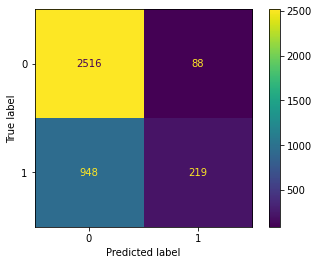

Validation Accuracy : 0.6482758620689655
Confusion matrix for validation : 



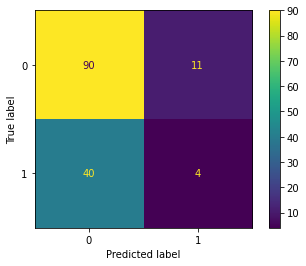

user_normFollowersCount 0.11958669012637675
user_normTweetsCount 0.11795798062060159
hist_r_hateSpeech_hateful 0.10639853684793288
user_tweetsCount 0.06981966526574566
user_r_followingCount 0.06165943498956732
hist_r_emotion_other 0.059994463131183125
user_normStatusesCount 0.0513917975464186
hist_r_normSentiment_neu 0.051244935259765624
user_normListCount 0.033907857530056
user_r_normFollowersCount 0.03302748281917669

--------------------------------------

max_depth =  6
f1 score: 0.5375615763546798
Train Accuracy : 0.7358790771678599
Confusion matrix for training : 



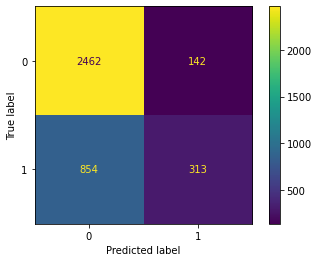

Validation Accuracy : 0.5862068965517241
Confusion matrix for validation : 



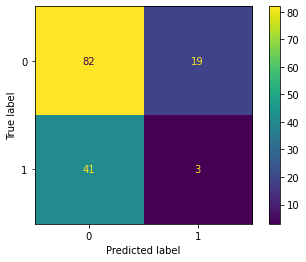

user_normFollowersCount 0.10028533630118448
user_normTweetsCount 0.08706724426014675
hist_r_hateSpeech_hateful 0.07853497786179676
user_tweetsCount 0.05153535028212116
user_r_followingCount 0.04551211422011811
hist_r_emotion_other 0.04428316378609475
user_normStatusesCount 0.03793335700052288
hist_r_normSentiment_neu 0.037824954885487136
user_normListCount 0.03759047782852703
user_normFollowingCount 0.03611814836165426

--------------------------------------

max_depth =  7
f1 score: 0.5838054187192118
Train Accuracy : 0.7562980641739592
Confusion matrix for training : 



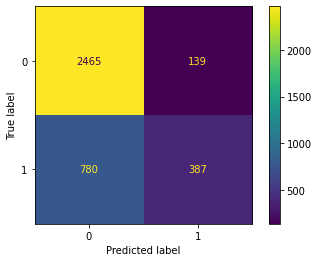

Validation Accuracy : 0.6275862068965518
Confusion matrix for validation : 



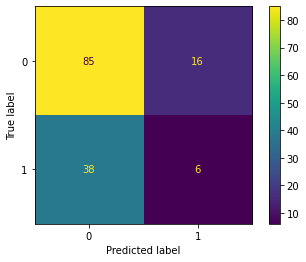

user_normFollowersCount 0.07423282042466701
hist_r_emotion_other 0.07148618338614442
user_normTweetsCount 0.06444857589770835
hist_r_hateSpeech_hateful 0.05813285494861627
user_tweetsCount 0.04503469960416681
user_r_followingCount 0.03368879964566722
user_normStatusesCount 0.02807888154124225
hist_r_normSentiment_neu 0.027998640550526168
user_normListCount 0.02782507685811605
user_normFollowingCount 0.026735234883691505

--------------------------------------

max_depth =  8
f1 score: 0.5653622529054897
Train Accuracy : 0.7743304163351896
Confusion matrix for training : 



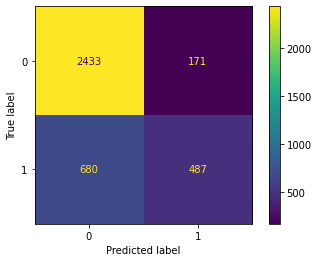

Validation Accuracy : 0.593103448275862
Confusion matrix for validation : 



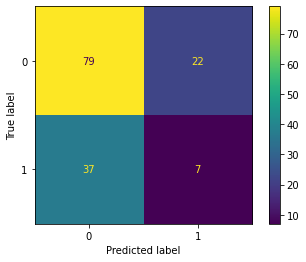

user_normFollowersCount 0.05792515315270719
hist_r_hateSpeech_hateful 0.054893075516446226
hist_r_emotion_other 0.0513023013016864
user_normTweetsCount 0.05029033799324856
user_tweetsCount 0.029766994537515662
user_r_followingCount 0.026287952792882107
user_normListCount 0.02471930070247751
user_normStatusesCount 0.021910436708837685
hist_r_normSentiment_neu 0.021847823276534235
user_normFollowingCount 0.020861965992293455

--------------------------------------

max_depth =  9
f1 score: 0.5104341033366812
Train Accuracy : 0.7939538583929993
Confusion matrix for training : 



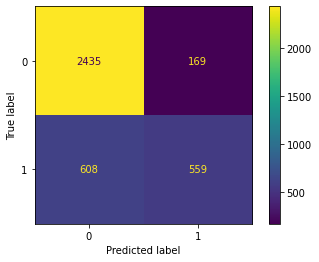

Validation Accuracy : 0.5172413793103449
Confusion matrix for validation : 



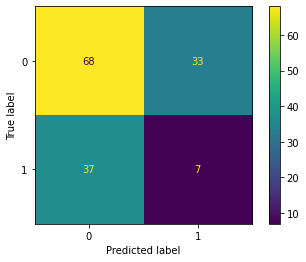

user_normFollowersCount 0.047627174732421
hist_r_hateSpeech_hateful 0.045134142197767825
user_normTweetsCount 0.04504835432651741
hist_r_emotion_other 0.042181738593409894
user_daysAccountCreation 0.025178138942578743
user_tweetsCount 0.02447499528157953
user_normStatusesCount 0.023869918959904757
hist_normTopic_celebrity&popculture 0.023702455477744928
hist_r_normSentiment_neu 0.023469881257685194
hist_emotion_fear 0.022448869678000142

--------------------------------------

max_depth =  10
f1 score: 0.5506453856200283
Train Accuracy : 0.8281622911694511
Confusion matrix for training : 



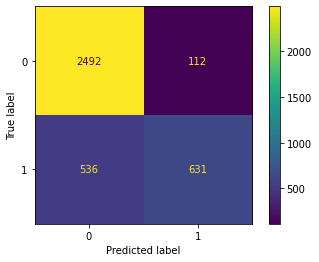

Validation Accuracy : 0.5724137931034483
Confusion matrix for validation : 



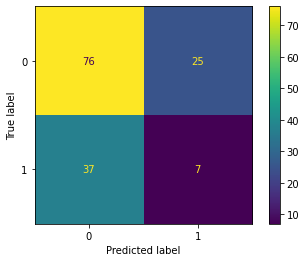

user_normFollowersCount 0.0430212484251804
hist_r_hateSpeech_hateful 0.03693472637182696
hist_r_emotion_other 0.034518679141144266
user_normTweetsCount 0.03383778109446291
user_tweetsCount 0.028155285853529752
hist_r_normSentiment_neu 0.022957291719542024
user_normFollowingCount 0.022723161340302122
user_r_followingCount 0.02079292027293055
user_normListCount 0.0202873146488222
user_daysAccountCreation 0.019773796923860568

--------------------------------------

max_depth =  11
f1 score: 0.5384092974317279
Train Accuracy : 0.8552108194112967
Confusion matrix for training : 



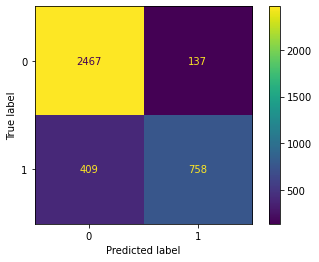

Validation Accuracy : 0.5448275862068965
Confusion matrix for validation : 



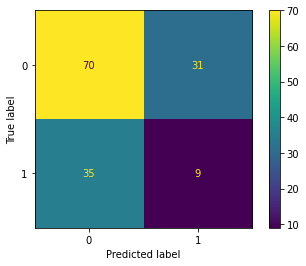

user_normFollowersCount 0.03803714677158199
hist_r_emotion_other 0.033245853329224195
hist_r_hateSpeech_hateful 0.0316377291412747
user_normTweetsCount 0.028984932559970356
user_tweetsCount 0.02198120861009223
hist_normTopic_celebrity&popculture 0.0219190001346641
tweet_normReadability_DaleChallIndex 0.021808067840225463
user_normFollowingCount 0.020129264476085203
hist_emotion_fear 0.020017012817321083
user_normListCount 0.019685502998127623

--------------------------------------

max_depth =  12
f1 score: 0.5256275769544374
Train Accuracy : 0.8854415274463007
Confusion matrix for training : 



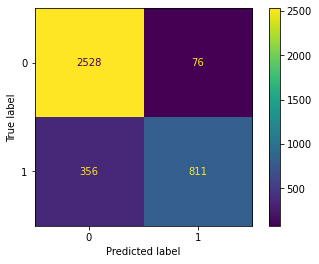

Validation Accuracy : 0.5241379310344828
Confusion matrix for validation : 



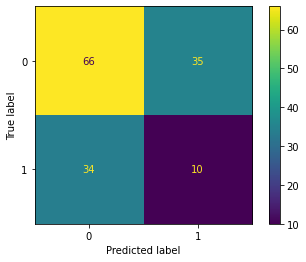

hist_r_emotion_other 0.031723704824729144
user_normFollowersCount 0.02887859166557339
hist_r_hateSpeech_hateful 0.027366949016566344
user_normTweetsCount 0.025072253703015395
user_daysAccountCreation 0.02337183886255261
user_tweetsCount 0.021785693982309843
user_normFollowingCount 0.020939258677894694
tweet_normReadability_DaleChallIndex 0.02034260986425027
user_followersCount 0.01953747051381996
user_r_followingCount 0.01917474483462701

--------------------------------------

max_depth =  13
f1 score: 0.5502519676122531
Train Accuracy : 0.9116945107398569
Confusion matrix for training : 



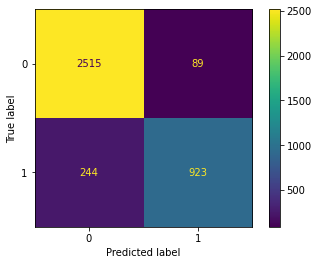

Validation Accuracy : 0.5517241379310345
Confusion matrix for validation : 



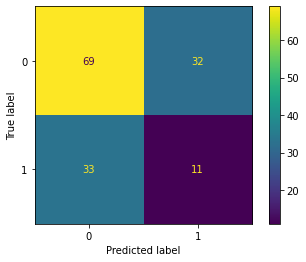

user_normFollowersCount 0.02749095325589936
user_normTweetsCount 0.02719775680003763
hist_r_emotion_other 0.02685653810902757
hist_r_hateSpeech_hateful 0.024035306683459382
user_daysAccountCreation 0.019177743101717788
hist_normTopic_celebrity&popculture 0.018451356704278436
user_tweetsCount 0.0173522685645347
hist_r_normSentiment_neu 0.016842272756633907
user_normFollowingCount 0.016723667717631244
tweet_normEmotion_other 0.016421100927999217

--------------------------------------

max_depth =  14
f1 score: 0.5158515130190007
Train Accuracy : 0.9252187748607796
Confusion matrix for training : 



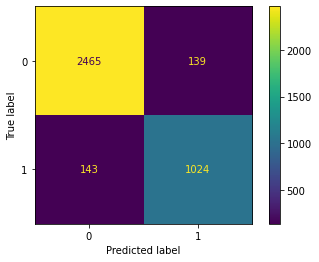

Validation Accuracy : 0.503448275862069
Confusion matrix for validation : 



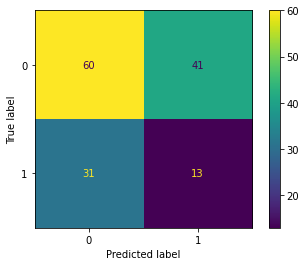

hist_r_emotion_other 0.02678627796648037
user_normFollowersCount 0.026065046750887232
user_normTweetsCount 0.025597173680132458
hist_r_hateSpeech_hateful 0.02437954997788636
user_repliesCount 0.019660803379283068
tweet_normEmotion_other 0.01645691043927314
tweet_normReadability_DaleChallIndex 0.01642041237800715
user_r_followingCount 0.01630060911057384
user_tweetsCount 0.015948151969277468
user_followersCount 0.015817978320658396

--------------------------------------

max_depth =  15
f1 score: 0.5364923598806657
Train Accuracy : 0.9504110315566163
Confusion matrix for training : 



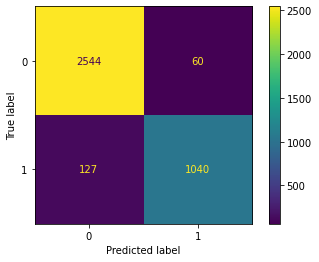

Validation Accuracy : 0.5310344827586206
Confusion matrix for validation : 



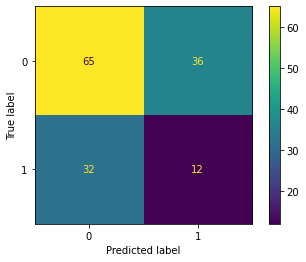

user_normTweetsCount 0.02811704365328316
hist_r_emotion_other 0.026968445702054745
user_normFollowersCount 0.02577455310970221
hist_r_hateSpeech_hateful 0.020622313208358067
user_r_favouritesCount 0.019602451396172022
user_normFollowingCount 0.017353971581922464
user_repliesCount 0.01676214092482419
tweet_normReadability_DaleChallIndex 0.01532913558767752
user_tweetsCount 0.014888260920741298
user_r_followingCount 0.014155086223190925

--------------------------------------

max_depth =  16
f1 score: 0.5274025358454792
Train Accuracy : 0.9655263855741183
Confusion matrix for training : 



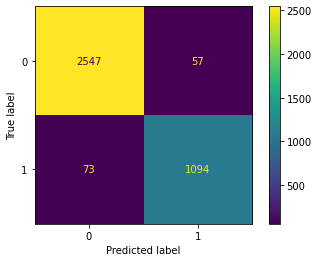

Validation Accuracy : 0.5172413793103449
Confusion matrix for validation : 



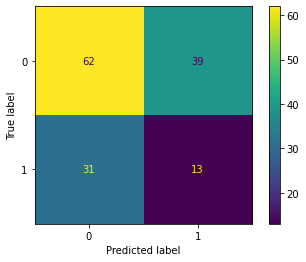

user_normTweetsCount 0.027493684599597945
hist_r_emotion_other 0.02741027803957531
user_normFollowersCount 0.023218424380558954
hist_r_hateSpeech_hateful 0.01967786647255508
user_normFollowingCount 0.017922435205746316
user_tweetsCount 0.01727730398842105
user_repliesCount 0.016854812316881143
tweet_normReadability_DaleChallIndex 0.015040682688156486
tweet_normEmotion_other 0.014514197882906223
user_normStatusesCount 0.014372830281328776

--------------------------------------

max_depth =  17
f1 score: 0.5351187768115835
Train Accuracy : 0.9753381066030231
Confusion matrix for training : 



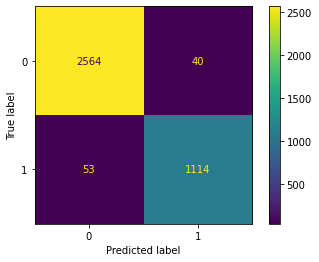

Validation Accuracy : 0.5241379310344828
Confusion matrix for validation : 



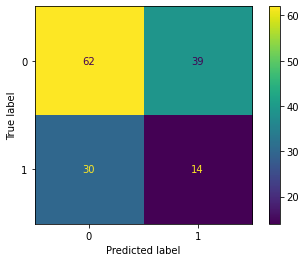

user_normFollowersCount 0.02595843255024963
hist_r_emotion_other 0.02565433582151056
user_normTweetsCount 0.02426397405551402
hist_r_hateSpeech_hateful 0.023480550173765897
user_repliesCount 0.022070652960520243
user_tweetsCount 0.01729225111762278
hist_normTopic_arts&culture 0.015260602107900817
user_r_favouritesCount 0.01515624195042181
user_statusesCount 0.014130424466946321
user_normFollowingCount 0.013534586356317973

--------------------------------------

max_depth =  18
f1 score: 0.5234478746665062
Train Accuracy : 0.9880668257756563
Confusion matrix for training : 



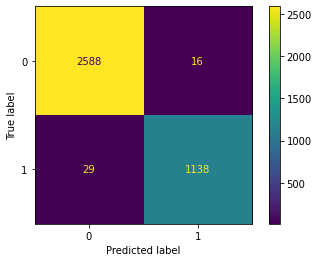

Validation Accuracy : 0.5103448275862069
Confusion matrix for validation : 



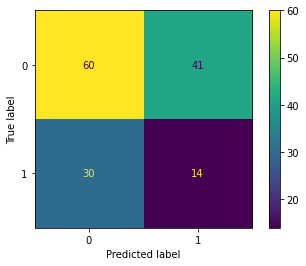

user_normFollowersCount 0.028879964783924482
user_normTweetsCount 0.027494774123063365
hist_r_emotion_other 0.02636109577505714
user_repliesCount 0.019517166154796324
hist_r_hateSpeech_hateful 0.018285447966277273
user_tweetsCount 0.016947964768996602
hist_normTopic_arts&culture 0.01645702092745613
user_r_favouritesCount 0.015486306852665862
user_normFollowingCount 0.015244126806122438
hist_r_normSentiment_neu 0.0149429320909399

--------------------------------------

max_depth =  19
f1 score: 0.5190367269431617
Train Accuracy : 0.9888623707239459
Confusion matrix for training : 



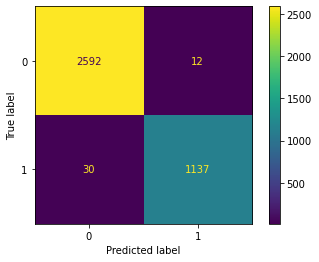

Validation Accuracy : 0.503448275862069
Confusion matrix for validation : 



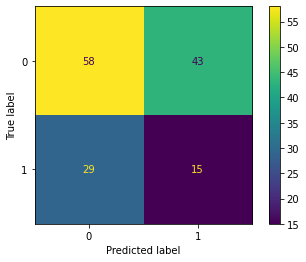

hist_r_emotion_other 0.02656313213066867
user_normTweetsCount 0.025253919558398927
hist_r_hateSpeech_hateful 0.02292408157175824
user_normFollowersCount 0.022715423316734564
user_repliesCount 0.018289849835465118
tweet_normReadability_DaleChallIndex 0.017148833061445608
user_tweetsCount 0.017076408364521248
user_normStatusesCount 0.016709939208832923
hist_normTopic_arts&culture 0.01634453220541825
user_r_favouritesCount 0.015380453255309335

--------------------------------------

max_depth =  20
f1 score: 0.5308910633924893
Train Accuracy : 0.9936356404136834
Confusion matrix for training : 



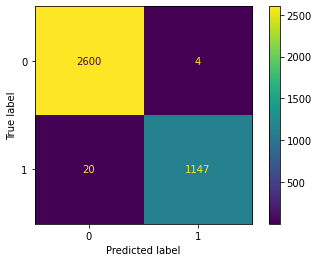

Validation Accuracy : 0.5241379310344828
Confusion matrix for validation : 



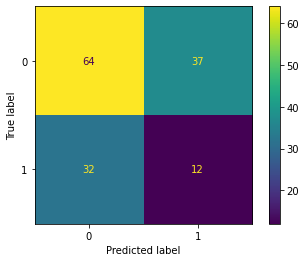

user_normTweetsCount 0.028668945208864892
hist_r_emotion_other 0.02606085805272563
user_normFollowersCount 0.023209365312947136
hist_r_hateSpeech_hateful 0.0179135143375651
user_repliesCount 0.017461055212870943
user_normStatusesCount 0.017400199614473325
tweet_normReadability_DaleChallIndex 0.01560781259847554
user_r_favouritesCount 0.015171308920228832
hist_r_normSentiment_neu 0.01449075199883597
user_tweetsCount 0.01437043266258258

--------------------------------------



In [ ]:
skf =StratifiedKFold(n_splits=27, shuffle =True, random_state = 50)
skf.get_n_splits(X, y)

# The purpose of the K-fold is to prevent the classifier from over fitting the training data. 
# So on each fold you keep a separate test set which the classifier has not seen and verify the accuracy on it. 
# You average your prediction to see how best your classifier is performing.
X = X_train
y = y_train
depth = []
f1score  = [] 
num_top_features = []
for x in range(2,21):
    depth.append(x)
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        # print(f'Num in Training: { len(X_train) } ')
        # print(f'Num in Test: { len(X_test) } ')
        y_train, y_val = y[train_index], y[val_index]
        
        
        # imputer = KNNImputer(n_neighbors=3) #change nn 
        # X_train = imputer.fit_transform(X_train)
        # X_test = imputer.fit_transform(X_test)
        
        clf = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth= x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f = f1_score(y_true = y_val , y_pred = y_pred,average = 'weighted')
        # evaluate_model(clf)
    print("max_depth = ", x)  
    # print('KFold CrossValScore Using Decision Tree %s' % cross_val_score(clf,X, y, cv=10).mean()) 
    print("f1 score:", f)
    f1score.append(f)
    print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
    cm_train =  confusion_matrix(y_train, clf.predict(X_train)) #values 
    cm_test = confusion_matrix(y_val, clf.predict(X_val))
    
    print("Confusion matrix for training : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()    

    print("Validation Accuracy :", accuracy_score(y_val,y_pred))
    print("Confusion matrix for validation : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()  

    count = 0
    for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)  :
        if (importance) != 0.0:
            count +=1

    num_top_features.append(count)
    for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)[:10]:
        print(name, importance)
    print("\n--------------------------------------\n")

## Create a model to test only on top features.

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
merged_df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
len(merged_df['retweeted_label'])

4896

### User features top 10

user_normFollowersCount 0.2607519149562382

user_normTweetsCount 0.1408952352282691

user_r_followingCount 0.12429491933243064

user_r_normFollowersCount 0.11681300152283727

user_r_followersCount 0.08619408100985466

user_normRepliesCount 0.06917871183012365

user_normFollowingCount 0.06193411476032644

user_tweetsCount 0.055808404815507244

user_normStatusesCount 0.0504285107072058

user_r_normMentionedInf 0.033701105837207083


In [ ]:
df = merged_df[['user_normFollowersCount','user_normTweetsCount', 'user_r_followingCount'
,'user_r_normFollowersCount',

'user_r_followersCount','user_normRepliesCount',

'user_normFollowingCount','user_tweetsCount','user_normStatusesCount',

'user_r_normMentionedInf','retweeted_label']].copy()

### Tweet features top 11

In [ ]:
df = merged_df[['hist_r_hateSpeech_hateful','hist_r_normSentiment_neu', 'tweet_normTopic_learning&educational'
,'hist_normTopic_fashion&style',

'tweet_normEmotion_other','tweet_normEmotion_sadness',

'tweet_normEmotion_surprise','tweet_normTopic_arts&culture','hist_emotion_joy',

'hist_r_normTopic_gaming','hist_r_normTopic_celebrity&popculture','retweeted_label']].copy()


# hist_r_hateSpeech_hateful 0.17454681414259746
# hist_r_normSentiment_neu 0.15495135206622396
# tweet_normTopic_learning&educational 0.08948059492531903
# hist_normTopic_fashion&style 0.08507085776357658
# tweet_normEmotion_other 0.07867723932522651
# tweet_normEmotion_sadness 0.07595546754478677
# tweet_normEmotion_surprise 0.07517246628105101
# tweet_normTopic_arts&culture 0.07131293463656578
# hist_emotion_joy 0.07062437430454566
# hist_r_normTopic_gaming 0.06678685252761042
# hist_r_normTopic_celebrity&popculture


### Test on original all

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
merged_df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
df = merged_df.copy()

In [ ]:
df

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


### REDO --> COMBINED MODEL

In [ ]:
df = merged_df[['user_normFollowersCount','user_normTweetsCount', 'user_r_followingCount'
,'hist_r_emotion_other',

'user_normRepliesCount','user_normFollowingCount',

'hist_r_normSentiment_neu','tweet_normTopic_filmtv&video','tweet_normTopic_youth&studentlife',

'user_normFavouritesCount','user_tweetsCount','user_r_followersCount','user_normStatusesCount','hist_r_normTopic_celebrity&popculture','retweeted_label']].copy()


# user_normFollowersCount 0.18541628913513392
# user_normTweetsCount 0.12279720572908605
# user_r_followingCount 0.10832920471452728
# hist_r_emotion_other 0.08835159841557375
# user_normRepliesCount 0.06029268835751539
# user_normFollowingCount 0.05397866165985649
# hist_r_normSentiment_neu 0.05244470982724532
# tweet_normTopic_filmtv&video 0.050083986367557495
# tweet_normTopic_youth&studentlife 0.04997203710382715
# user_normFavouritesCount 0.04918640874218705
# user_tweetsCount 0.048639800745844924
# user_r_followersCount 0.046302310448112345
# user_normStatusesCount 0.043950955430760476
# hist_r_normTopic_celebrity&popculture


In [ ]:
df

,user_normFollowersCount,user_normTweetsCount,user_r_followingCount,hist_r_emotion_other,user_normRepliesCount,user_normFollowingCount,hist_r_normSentiment_neu,tweet_normTopic_filmtv&video,tweet_normTopic_youth&studentlife,user_normFavouritesCount,user_tweetsCount,user_r_followersCount,user_normStatusesCount,hist_r_normTopic_celebrity&popculture,retweeted_label
0,3.233598,0.153846,2453,0.460259,33.923077,3.522863,0.749359,0.013067,0.062041,47.929423,2.0,2780,18.748509,0.059207,1
1,1.089132,0.333333,234,0.641573,7.555556,1.131685,0.801091,0.006823,0.002876,20.521564,3.0,282,23.131110,0.045199,1
2,5.166858,2.600000,3271,0.646218,0.000000,5.666858,0.681810,0.029716,0.001519,113.703107,13.0,2921,125.917146,0.021675,1
3,6.721870,9.533333,77,0.422039,2.133333,7.394057,0.782245,0.009891,0.002301,24.124939,143.0,26,93.612275,0.411100,1
4,0.972257,0.888889,3509,0.432934,0.222222,1.238791,0.751606,0.020275,0.001102,22.126827,8.0,4176,27.855338,0.058762,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0.612817,0.292096,296,0.553964,1.347079,0.805073,0.766060,0.010688,0.002812,44.378838,85.0,328,20.467957,0.066849,0
4892,2.888584,0.444444,296,0.553964,4.729167,3.178375,0.766060,0.010688,0.002812,1.637761,64.0,328,0.816685,0.066849,0
4893,1.826612,0.000000,296,0.553964,0.000000,1.866624,0.766060,0.026683,0.001728,75.942839,0.0,328,75.557002,0.066849,0
4894,5.979561,1.000000,2344,0.633325,9.272727,6.180924,0.773260,0.012877,0.002877,413.517033,11.0,590,314.261166,0.103991,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# # Use the same function above for the validation set
# X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, 
#     test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [ ]:
len(X_train)

3916

In [ ]:
len(df)

4896

In [ ]:
print(df.columns)

Index(['user_daysAccountCreation', 'user_statusesCount', 'user_followersCount',
       'user_favouritesCount', 'user_listCount', 'user_followingCount',
       'user_normStatusesCount', 'user_normFollowersCount',
       'user_normFavouritesCount', 'user_normListCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=180)


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

f1 = []
train = []
test = []

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='weighted'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
          }

for x in range(2,21): 
    kfold =StratifiedKFold(n_splits=5)
    model= DecisionTreeClassifier( criterion = "entropy", max_depth=x) 

    results = cross_validate(estimator=model,
                                            X=X,
                                            y=y,
                                            cv=kfold, n_jobs=-1,
                                            scoring=scoring, return_train_score=True)
    print("==== max depth", x, "====")
    # print(results)
    print('test_f1_score',np.mean(results['test_f1_score']))
    f1.append(np.mean(results['test_f1_score']))
    print('test_recall',np.mean(results['test_recall']))
    print('test_precision',np.mean(results['test_precision']))
    print('train_accuracy',np.mean(results['train_accuracy']))
    train.append(np.mean(results['train_accuracy']))
    print('test_accuracy',np.mean(results['test_accuracy']))
    test.append(np.mean(results['test_accuracy']))


==== max depth 2 ====
test_f1_score 0.15137420407381627
test_recall 0.6832077713618644
test_precision 0.5756585538978835
train_accuracy 0.6895427151180666
test_accuracy 0.6832077713618644
==== max depth 3 ====
test_f1_score 0.13257955025603202
test_recall 0.6817794083925705
test_precision 0.6234475532686596
train_accuracy 0.6976103222562764
test_accuracy 0.6817794083925705
==== max depth 4 ====
test_f1_score 0.17489418780677088
test_recall 0.678104479789873
test_precision 0.6241205209208627
train_accuracy 0.7073633617689634
test_accuracy 0.678104479789873
==== max depth 5 ====
test_f1_score 0.24585035571347436
test_recall 0.6648252068958328
test_precision 0.624687841704608
train_accuracy 0.7179845820176215
test_accuracy 0.6648252068958328
==== max depth 6 ====
test_f1_score 0.2851308514836949
test_recall 0.6497087823893601
test_precision 0.6125662051520406
train_accuracy 0.7356004300679341
test_accuracy 0.6497087823893601


KeyboardInterrupt: ignored

In [ ]:

f1 = []
train = []
test = []

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
          }

for x in range(2,21): 
    kfold =StratifiedKFold(n_splits=10, shuffle = True)
    model= DecisionTreeClassifier( criterion = "entropy", max_depth=x) 

    results = cross_validate(estimator=model,
                                            X=X,
                                            y=y,
                                            cv=kfold, n_jobs=-1,
                                            scoring=scoring, return_train_score=True)
    print("==== max depth", x, "====")
    # print(results)
    print('test_f1_score',np.mean(results['test_f1_score']))
    f1.append(np.mean(results['test_f1_score']))
    print('test_recall',np.mean(results['test_recall']))
    print('test_precision',np.mean(results['test_precision']))
    print('train_accuracy',np.mean(results['train_accuracy']))
    train.append(np.mean(results['train_accuracy']))
    print('test_accuracy',np.mean(results['test_accuracy']))
    test.append(np.mean(results['test_accuracy']))

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

f1 = []
train = []
test = []

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold, n_jobs=-1,
                                        scoring=scoring, return_train_score=True)
print("==== max depth", 5, "====")
# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
f1.append(np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
train.append(np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))
test.append(np.mean(results['test_accuracy']))



==== max depth 5 ====
test_f1_score 0.6256497936895268
test_recall 0.5431225775761253
test_precision 0.6274127890339241
train_accuracy 0.7149375024527169
test_accuracy 0.6734063686824422


In [ ]:
y2

[0.6840269604774424,
 0.6850436125370394,
 0.6805571553774885,
 0.6774976002671007,
 0.6681044196819832,
 0.6544117524310338,
 0.644608739201202,
 0.6339969116480948,
 0.6266403739409875,
 0.6254104586619924,
 0.6170314260673595,
 0.613966445473895,
 0.601303367972956,
 0.5955828220858896,
 0.5943608363590835,
 0.594355410876007,
 0.5953758190392722,
 0.595781895580318,
 0.590683193522808]

10 1 1


ValueError: ignored

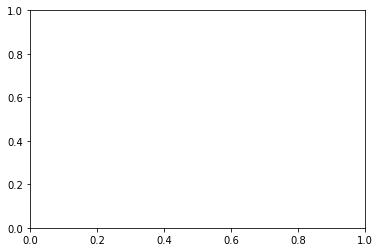

In [ ]:

# importing package
import matplotlib.pyplot as plt
import numpy as np

plt.clf() 
# create data
x =np.arange(2,21,1)[:10]

y = train[:10]

y2 = test[:10]
print(len(x),len(y),len(y2))
  
# plot lines
plt.plot(x, y, label = "train accuracy")
plt.plot(x, y2, label = "test accuracy")

plt.legend()
# for x,y in zip(x,y):

#     label = "{:.4}".format(y)

#     plt.annotate(label, # this is the text
#                  (x,y), # these are the coordinates to position the label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center
# plt.show()

# for x1,y1 in zip(x,y2):

#     label = "{:.4}".format(y1)

#     plt.annotate(label, # this is the text
#                  (x1,y1), # these are the coordinates to position the label
#                  textcoords="offset points", # how to position the text
#                  xytext=(0,10), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

plt.show()

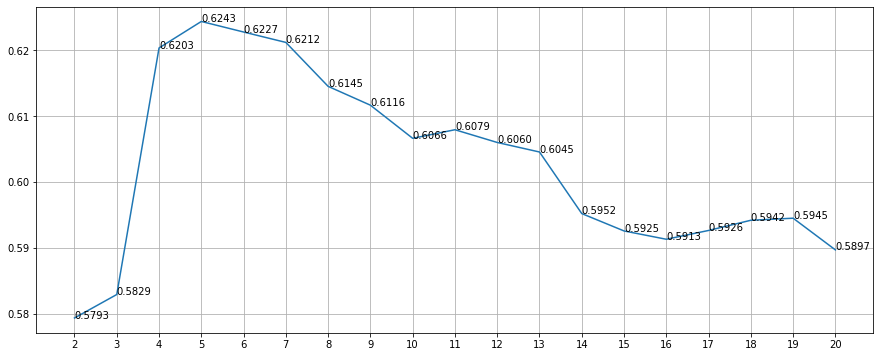

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

A = np.arange(2,21,1)[:20]
B = f1

plt.plot(A,B)
for i,j in zip(A,B):
    ax.annotate('%.4f' %j, xy=(i,j), xytext=(00,0), textcoords='offset points')
    # ax.annotate('%.4f,' %i, xy=(i,j))
plt.xticks(range(2,21))
plt.grid()
plt.show()

In [ ]:
results

{'fit_time': array([0.58232641, 0.57844186, 0.61545515, 0.60864282, 0.57641363,
        0.57328343, 0.59996319, 0.63414359, 0.58306217, 0.58816338]),
 'score_time': array([0.00879669, 0.00676799, 0.0066011 , 0.00965524, 0.00631547,
        0.0076611 , 0.00660443, 0.00592589, 0.00589132, 0.00402546]),
 'test_accuracy': array([0.70204082, 0.67959184, 0.66326531, 0.68367347, 0.68163265,
        0.66530612, 0.67280164, 0.66666667, 0.6993865 , 0.69120654]),
 'test_precision': array([0.67319481, 0.6038747 , 0.61686299, 0.64706474, 0.63924573,
        0.63022785, 0.58651153, 0.61817102, 0.67031619, 0.65032108]),
 'test_recall': array([0.70204082, 0.67959184, 0.66326531, 0.68367347, 0.68163265,
        0.66530612, 0.67280164, 0.66666667, 0.6993865 , 0.69120654]),
 'test_f1_score': array([0.64605677, 0.58573812, 0.62233454, 0.64670841, 0.63575844,
        0.6368807 , 0.58133315, 0.62127833, 0.62634927, 0.60081757])}

In [ ]:
print(np.mean(results['test_f1_score']))
print(np.mean(results['test_recall']))
print(np.mean(results['test_precision']))
print(np.mean(results['test_accuracy']))

0.6203255300427694
0.6805571553774885
0.6335790619194979
0.6805571553774885


In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 5) 
# fit the model
model.fit(X, y)
# get importance
# importance = model.feature_importances_
# summarize feature importance
count =0
for importance, name in sorted(zip( model.feature_importances_, df.drop('retweeted_label',axis=1).columns),reverse=True):
    if (importance) != 0.0:
        count +=1
    print(name, importance)

print(count)

user_normFollowersCount 0.2667116695465629
user_normTweetsCount 0.1075004847352666
user_r_followingCount 0.0874556433305085
hist_r_hateSpeech_hateful 0.062133148764731846
user_r_statusesCount 0.05790923455770099
user_r_normFollowersCount 0.04125285915927555
hist_r_normTopic_business&entrepreneurs 0.035254000117790604
hist_normSentiment_comp 0.032048393030360105
user_normFollowingCount 0.030437474397669022
hist_emotion_fear 0.025869930749957935
user_daysAccountCreation 0.024812768013328393
hist_emotion_surprise 0.023461526439807485
hist_r_normTopic_science&technology 0.023066695740226115
hist_r_normTopic_sports 0.021743284149366257
tweet_normTopic_diaries&dailylife 0.021095648853638363
tweet_normEmotion_other 0.020445573577102413
user_r_normMentionedInf 0.01929996208120208
tweet_normReadability_FleschReadingEase 0.018765288052435564
hist_r_normSentiment_neu 0.016591616017759533
hist_r_normSentiment_comp 0.016344766673278024
tweet_normEmotion_sadness 0.016072052183514183
user_statusesCou

In [ ]:
# for x in merged_df.columns:
#     print(x)
merged_df.columns[24]

user_daysAccountCreation
user_statusesCount
user_followersCount
user_favouritesCount
user_listCount
user_followingCount
user_normStatusesCount
user_normFollowersCount
user_normFavouritesCount
user_normListCount
user_normFollowingCount
user_isVerified
user_defaultPhoto
user_hasURL
user_tweetsCount
user_retweetsCount
user_repliesCount
user_normTweetsCount
user_normRetweetsCount
user_normRepliesCount
user_followsRetweeter
user_mentionedRetweeterCount
user_normMentionedRetweeterCount
user_r_mentionedInf
user_r_normMentionedInf
tweet_normSentiment_neg
tweet_normSentiment_neu
tweet_normSentiment_pos
tweet_normSentiment_comp
tweet_normTopic_arts&culture
tweet_normTopic_business&entrepreneurs
tweet_normTopic_celebrity&popculture
tweet_normTopic_diaries&dailylife
tweet_normTopic_family
tweet_normTopic_fashion&style
tweet_normTopic_filmtv&video
tweet_normTopic_fitness&health
tweet_normTopic_food&dining
tweet_normTopic_gaming
tweet_normTopic_learning&educational
tweet_normTopic_music
tweet_normTo

In [ ]:
merged_df.columns[108]

'user_r_normRepliesCount'

### REDO --> take only tweet features

In [ ]:
lst = list(range(0,25)) + list(range(89,109))
lst
df2=merged_df.drop(merged_df.columns[lst], axis=1)

In [ ]:
for x in df2.columns:
    print(x)

tweet_normSentiment_neg
tweet_normSentiment_neu
tweet_normSentiment_pos
tweet_normSentiment_comp
tweet_normTopic_arts&culture
tweet_normTopic_business&entrepreneurs
tweet_normTopic_celebrity&popculture
tweet_normTopic_diaries&dailylife
tweet_normTopic_family
tweet_normTopic_fashion&style
tweet_normTopic_filmtv&video
tweet_normTopic_fitness&health
tweet_normTopic_food&dining
tweet_normTopic_gaming
tweet_normTopic_learning&educational
tweet_normTopic_music
tweet_normTopic_news&socialconcern
tweet_normTopic_otherhobbies
tweet_normTopic_relationships
tweet_normTopic_science&technology
tweet_normTopic_sports
tweet_normTopic_travel&adventure
tweet_normTopic_youth&studentlife
tweet_normHateSpeech_hateful
tweet_normHateSpeech_targeted
tweet_normHateSpeech_aggressiveness
tweet_normEmotion_joy
tweet_normEmotion_sadness
tweet_normEmotion_other
tweet_normEmotion_anger
tweet_normEmotion_surprise
tweet_normEmotion_disgust
tweet_normEmotion_fear
tweet_normReadability_Kincaid
tweet_normReadability_ARI

In [ ]:
df2

,tweet_normSentiment_neg,tweet_normSentiment_neu,tweet_normSentiment_pos,tweet_normSentiment_comp,tweet_normTopic_arts&culture,tweet_normTopic_business&entrepreneurs,tweet_normTopic_celebrity&popculture,tweet_normTopic_diaries&dailylife,tweet_normTopic_family,tweet_normTopic_fashion&style,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,0.0830,0.9170,0.0000,-0.226300,0.021541,0.047053,0.006779,0.930722,0.418169,0.006066,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,0.2350,0.7650,0.0000,-0.507500,0.004055,0.123589,0.007961,0.034353,0.002813,0.001581,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,0.0000,0.6040,0.3960,0.599400,0.023454,0.007103,0.512836,0.204469,0.002715,0.003696,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,0.0945,0.9055,0.0000,-0.225600,0.006967,0.005907,0.071719,0.242664,0.003621,0.003137,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,0.0000,1.0000,0.0000,0.000000,0.037282,0.004646,0.016516,0.110614,0.002184,0.001196,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0.0000,1.0000,0.0000,0.000000,0.008857,0.004306,0.130995,0.452069,0.005577,0.005431,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,0.0000,1.0000,0.0000,0.000000,0.008857,0.004306,0.130995,0.452069,0.005577,0.005431,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,0.0000,0.8020,0.1980,0.299700,0.018034,0.006337,0.693198,0.208452,0.003594,0.004596,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,0.0250,0.9750,0.0000,-0.025733,0.014271,0.006668,0.137220,0.452610,0.011187,0.005954,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


In [ ]:
X = df2.drop('retweeted_label',axis=1).values
y = df2['retweeted_label'].values

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold, n_jobs=-1,
                                        scoring=scoring, return_train_score=True)
print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))



{'fit_time': array([2.05629849, 2.16039824, 1.75745082, 1.70286751, 0.7741642 ]), 'score_time': array([0.03659606, 0.06421781, 0.01532674, 0.03227067, 0.00796604]), 'test_accuracy': array([0.68571429, 0.6721144 , 0.6700715 , 0.66905005, 0.68641471]), 'train_accuracy': array([0.70377937, 0.69977023, 0.71074802, 0.70896094, 0.70896094]), 'test_precision': array([0.64103062, 0.64797501, 0.58189092, 0.61246757, 0.60709872]), 'train_precision': array([0.6939671 , 0.6673567 , 0.70252687, 0.69912867, 0.70689815]), 'test_recall': array([0.54354318, 0.5788514 , 0.50429984, 0.52761511, 0.50193019]), 'train_recall': array([0.54017775, 0.55781272, 0.5557901 , 0.55271053, 0.54870683]), 'test_f1_score': array([0.62723043, 0.6543838 , 0.58130075, 0.61211902, 0.56513424]), 'train_f1_score': array([0.61933435, 0.64219177, 0.6381803 , 0.63464747, 0.62926846])}
test_f1_score 0.6080336457881088
test_recall 0.5312479439828874
test_precision 0.6180925678888979
train_accuracy 0.7064438998910749
test_accuracy

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# define the model
model = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 5) 
# fit the model
model.fit(X, y)
# get importance
# importance = model.feature_importances_
# summarize feature importance
count =0
for importance, name in sorted(zip( model.feature_importances_, df2.drop('retweeted_label',axis=1).columns),reverse=True):
    if (importance) != 0.0:
        count +=1
    print(name, importance)

print(count)

hist_r_hateSpeech_hateful 0.15710967630506006
hist_r_hateSpeech_aggressiveness 0.11573092614257052
tweet_normHateSpeech_aggressiveness 0.11393646051541594
hist_r_normSentiment_neu 0.0904373470326837
tweet_normTopic_youth&studentlife 0.07809331221595857
hist_hateSpeech_aggressiveness 0.045493252654776876
hist_r_normTopic_relationships 0.03288886658585715
tweet_normHateSpeech_targeted 0.03046329013431286
hist_hateSpeech_hateful 0.027491870795521546
hist_emotion_fear 0.025143431168920094
hist_r_emotion_joy 0.02506037573483957
hist_normTopic_travel&adventure 0.024553261654808988
hist_r_normTopic_sports 0.02444013940304266
hist_normSentiment_comp 0.02411559137726012
tweet_normReadability_ColemanLiau 0.02378795595024206
tweet_normTopic_fitness&health 0.022924623048504587
tweet_normEmotion_surprise 0.022706161368885862
tweet_normEmotion_joy 0.02257245330743415
hist_r_normTopic_science&technology 0.02169186623859588
hist_normTopic_otherhobbies 0.021118625300145338
hist_normTopic_fashion&style 

### REDO --> take only user features

In [ ]:
lst = list(range(25,89)) + list(range(110,180))
lst
df2=merged_df.drop(merged_df.columns[lst], axis=1)
df2

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,user_r_isVerified,user_r_defaultPhoto,user_r_hasURL,user_r_tweetsCount,user_r_retweetsCount,user_r_repliesCount,user_r_normTweetsCount,user_r_normRetweetsCount,user_r_normRepliesCount,retweeted_label
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0,0,0,3.0,890.0,107.0,1.000000,296.666667,35.666667,1
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0,1,0,0.0,990.0,10.0,0.000000,99.000000,1.000000,1
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0,1,1,11.0,782.0,207.0,2.200000,156.400000,41.400000,1
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0,1,0,24.0,710.0,266.0,0.045977,1.360153,0.509579,1
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0,0,0,81.0,470.0,449.0,4.764706,27.647059,26.411765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0,1,0,0.0,297.0,191.0,0.000000,3.228261,2.076087,0


In [ ]:
for x in df2.columns:
    print(x)

user_daysAccountCreation
user_statusesCount
user_followersCount
user_favouritesCount
user_listCount
user_followingCount
user_normStatusesCount
user_normFollowersCount
user_normFavouritesCount
user_normListCount
user_normFollowingCount
user_isVerified
user_defaultPhoto
user_hasURL
user_tweetsCount
user_retweetsCount
user_repliesCount
user_normTweetsCount
user_normRetweetsCount
user_normRepliesCount
user_followsRetweeter
user_mentionedRetweeterCount
user_normMentionedRetweeterCount
user_r_mentionedInf
user_r_normMentionedInf
user_r_daysAccountCreation
user_r_statusesCount
user_r_followersCount
user_r_favouritesCount
user_r_listCount
user_r_followingCount
user_r_normStatusesCount
user_r_normFollowersCount
user_r_normFavouritesCount
user_r_normListCount
user_r_normFollowingCount
user_r_isVerified
user_r_defaultPhoto
user_r_hasURL
user_r_tweetsCount
user_r_retweetsCount
user_r_repliesCount
user_r_normTweetsCount
user_r_normRetweetsCount
user_r_normRepliesCount
retweeted_label


In [ ]:
X = df2.drop('retweeted_label',axis=1).values
y = df2['retweeted_label'].values

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 


results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold,
                                        scoring=scoring, return_train_score=True)
# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))



test_f1_score 0.6057950710065573
test_recall 0.5254379049537157
test_precision 0.6280372257237514
train_accuracy 0.7095584110851757
test_accuracy 0.6787119301244502


In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

# define the model
model = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 5) 
# fit the model
model.fit(X, y)
# get importance
# importance = model.feature_importances_
# summarize feature importance
count =0
for importance, name in sorted(zip( model.feature_importances_, df2.drop('retweeted_label',axis=1).columns),reverse=True):
    if (importance) != 0.0:
        count +=1
    print(name, importance)

print(count)

user_normFollowersCount 0.32314641469739064
user_normTweetsCount 0.13884920586203084
user_r_followingCount 0.11461601149201346
user_daysAccountCreation 0.08429299223932278
user_tweetsCount 0.051353611834890296
user_normFollowingCount 0.049327354885964715
user_normRetweetsCount 0.03495901712176821
user_r_normListCount 0.026078829160655327
user_normFavouritesCount 0.02015284606735734
user_r_normMentionedInf 0.019894714976283076
user_r_mentionedInf 0.019535602437341218
user_followingCount 0.01927988779413651
user_statusesCount 0.019203386230524824
user_followersCount 0.019042946215189982
user_retweetsCount 0.016404338851078254
user_r_followersCount 0.015517689544011724
user_r_daysAccountCreation 0.014634710588902417
user_r_repliesCount 0.013710440001138574
user_repliesCount 0.0
user_r_tweetsCount 0.0
user_r_statusesCount 0.0
user_r_retweetsCount 0.0
user_r_normTweetsCount 0.0
user_r_normStatusesCount 0.0
user_r_normRetweetsCount 0.0
user_r_normRepliesCount 0.0
user_r_normFollowingCount 0.

### REDO --> split data by hashtags

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
merged_df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

df = merged_df.copy()

In [ ]:
merged_df['retweeted_label'].value_counts()

0    3365
1    1531
Name: retweeted_label, dtype: int64

In [ ]:
VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
biden = df.loc[df['hashtag'] == "#biden"]
taiwan = df.loc[df['hashtag'] == "#taiwan"]
Lisa = df.loc[df['hashtag'] == "Lisa"]
EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
iOS16 = df.loc[df['hashtag'] == "#iOS16"]
onepiece = df.loc[df['hashtag'] == "#onepiece"]
F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
df = F1.copy()

# VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
# GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
# biden = df.loc[df['hashtag'] == "#biden"]
# taiwan = df.loc[df['hashtag'] == "#taiwan"]
# Lisa = df.loc[df['hashtag'] == "Lisa"]
# EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
# CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
# EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
# BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
# iOS16 = df.loc[df['hashtag'] == "#iOS16"]
# onepiece = df.loc[df['hashtag'] == "#onepiece"]
# F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
len(df)

264

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=10)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold, n_jobs=-1,
                                        scoring=scoring, return_train_score=True)

# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))

test_f1_score 0.5759008534860998
test_recall 0.5635416666666666
test_precision 0.6062921175640474
train_accuracy 0.7870545686629082
test_accuracy 0.5834757834757835


### REDO --> split data by categories

In [ ]:
political = pd.concat([VoteThemOut, GetBackToWorkYouFatPonce,biden,taiwan,CostOfLivingCrisis, 
                       EnoughIsEnough, EnergyPrices], axis=0)

nonp = pd.concat([iOS16, F1,onepiece, 
                       Lisa, BookLoversDay], axis=0)

# VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
# GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
# biden = df.loc[df['hashtag'] == "#biden"]
# taiwan = df.loc[df['hashtag'] == "#taiwan"]
# Lisa = df.loc[df['hashtag'] == "Lisa"]
# EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
# CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
# EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
# BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
# iOS16 = df.loc[df['hashtag'] == "#iOS16"]
# onepiece = df.loc[df['hashtag'] == "#onepiece"]
# F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
df = nonp.copy()

In [ ]:
len(df)

1378

In [ ]:
df = pd.concat([nonp, nonp ,nonp], axis=0)

In [ ]:
# train=df.sample(frac=0.4,random_state=50)

In [ ]:
# len(train)

1407

In [ ]:
# df = train.copy()

In [ ]:
df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
len(df)

1378

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold, n_jobs=-1,
                                        scoring=scoring, return_train_score=True)

print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))

test_f1_score 0.5908035347919045
test_recall 0.5544576798419605
test_precision 0.6021146409377105
train_accuracy 0.735846305982858
test_accuracy 0.6182951251646903


### REDO --> C*

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
merged_df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
merged_df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
merged_df

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


In [ ]:
df = merged_df[['retweeted_label', 'user_normFollowersCount',
'user_normTweetsCount', 
'user_r_followingCount', 
'hist_r_hateSpeech_hateful', 
'user_r_statusesCount',
'user_r_normFollowersCount', 
'hist_r_normTopic_business&entrepreneurs', 
'hist_normSentiment_comp',
'user_normFollowingCount',
'hist_emotion_fear',
'user_daysAccountCreation', 
'hist_emotion_surprise',
'hist_r_normTopic_science&technology',
'hist_r_normTopic_sports',
'tweet_normTopic_diaries&dailylife', 
'tweet_normEmotion_other', 
'user_r_normMentionedInf', 
'tweet_normReadability_FleschReadingEase',
'hist_r_normSentiment_neu',
'hist_r_normSentiment_comp', 
'tweet_normEmotion_sadness', 
'user_statusesCount', 
'hist_r_normSentiment_neg', 
'user_tweetsCount',
'user_normRetweetsCount', 
'user_r_normListCount', 
'user_normFavouritesCount',
'user_r_mentionedInf',
'user_followingCount',
'user_followersCount',
'user_retweetsCount',
'user_r_followersCount', 
'user_r_daysAccountCreation',
'hist_r_hateSpeech_aggressiveness', 
'tweet_normHateSpeech_aggressiveness',
'tweet_normTopic_youth&studentlife', 
'hist_hateSpeech_aggressiveness', 
'hist_r_normTopic_relationships', 
'tweet_normHateSpeech_targeted', 
'hist_hateSpeech_hateful', 
'hist_r_emotion_joy', 
'hist_normTopic_travel&adventure', 
'tweet_normReadability_ColemanLiau', 
'tweet_normTopic_fitness&health', 
'tweet_normEmotion_surprise', 
'tweet_normEmotion_joy',
'hist_normTopic_otherhobbies',
'hist_normTopic_fashion&style', 
'hist_r_normTopic_family', 
'tweet_normTopic_food&dining',
]].copy()

In [ ]:
df.shape

(4896, 51)

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


# scoring = {'accuracy' : make_scorer(accuracy_score), 
#            'precision' : make_scorer(precision_score,average='weighted'),
#            'recall' : make_scorer(recall_score,average='weighted'), 
#            'f1_score' : make_scorer(f1_score, average='weighted')}
# # for x in range(2,21): 
# kfold = StratifiedKFold(n_splits=10, random_state=50, shuffle = True)
# model= DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 5) 

# results = cross_validate(estimator=model,
#                                         X=X,
#                                         y=y,
#                                         cv=kfold, n_jobs=-1,
#                                         scoring=scoring, return_train_score=True)


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold, n_jobs=-1,
                                        scoring=scoring, return_train_score=True)

print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))



{'fit_time': array([0.66104078, 0.49869084, 0.47868371, 0.31283879, 0.35327578]), 'score_time': array([0.03249669, 0.0308671 , 0.00812435, 0.00854087, 0.03727889]), 'test_accuracy': array([0.69489796, 0.63840654, 0.66700715, 0.65474974, 0.67517875]), 'train_accuracy': array([0.72114402, 0.71355629, 0.72044932, 0.71074802, 0.72019403]), 'test_precision': array([0.66206947, 0.62235145, 0.61643975, 0.64626971, 0.62642061]), 'train_precision': array([0.70105741, 0.68966403, 0.69987422, 0.69101512, 0.69895489]), 'test_recall': array([0.57237272, 0.55700745, 0.53414863, 0.58582437, 0.53920112]), 'train_recall': array([0.59958762, 0.58964036, 0.60021591, 0.62007172, 0.61181884]), 'test_f1_score': array([0.65549646, 0.62879695, 0.61905078, 0.64999103, 0.62398533]), 'train_f1_score': array([0.68297512, 0.67330607, 0.68321867, 0.69307583, 0.6916225 ])}
test_f1_score 0.6354641108024495
test_recall 0.5577108577917714
test_precision 0.6347101980787178
train_accuracy 0.7172183377086808
test_accuracy

In [ ]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
# define the model
model = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 5) 
# fit the model
model.fit(X, y)
# get importance
# importance = model.feature_importances_
# summarize feature importance
count =0
for importance, name in sorted(zip( model.feature_importances_, df.drop('retweeted_label',axis=1).columns),reverse=True):
    if (importance) != 0.0:
        count +=1
    print(name, importance)

print(count)

user_normFollowersCount 0.28305643621984095
user_normTweetsCount 0.1075004847352666
user_r_followingCount 0.0874556433305085
hist_r_hateSpeech_hateful 0.062133148764731846
user_r_statusesCount 0.05790923455770099
user_r_normFollowersCount 0.04125285915927555
hist_r_normTopic_business&entrepreneurs 0.035254000117790604
hist_normSentiment_comp 0.032048393030360105
user_normFollowingCount 0.030437474397669022
hist_emotion_fear 0.025869930749957935
user_daysAccountCreation 0.024812768013328393
hist_emotion_surprise 0.023461526439807485
hist_r_normTopic_science&technology 0.023066695740226115
hist_r_normTopic_sports 0.021743284149366257
tweet_normTopic_diaries&dailylife 0.021095648853638363
tweet_normEmotion_other 0.020445573577102413
user_r_normMentionedInf 0.01929996208120208
tweet_normReadability_FleschReadingEase 0.018765288052435564
hist_r_normSentiment_neu 0.016591616017759533
tweet_normEmotion_sadness 0.016072052183514183
user_statusesCount 0.016015810891677223
hist_r_normSentiment_n

### C* data on splitting data by categories

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
merged_df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
merged_df

,hashtag,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,#EnoughIsEnough,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,#CostOfLivingCrisis,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,#GetBackToWorkYouFatPonce,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,#GetBackToWorkYouFatPonce,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,#EnoughIsEnough,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,#GetBackToWorkYouFatPonce,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,#GetBackToWorkYouFatPonce,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,#GetBackToWorkYouFatPonce,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,#GetBackToWorkYouFatPonce,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


In [ ]:
df = merged_df[['retweeted_label','hashtag', 'user_normFollowersCount',
'user_normTweetsCount', 
'user_r_followingCount', 
'hist_r_hateSpeech_hateful', 
'user_r_statusesCount',
'user_r_normFollowersCount', 
'hist_r_normTopic_business&entrepreneurs', 
'hist_normSentiment_comp',
'user_normFollowingCount',
'hist_emotion_fear',
'user_daysAccountCreation', 
'hist_emotion_surprise',
'hist_r_normTopic_science&technology',
'hist_r_normTopic_sports',
'tweet_normTopic_diaries&dailylife', 
'tweet_normEmotion_other', 
'user_r_normMentionedInf', 
'tweet_normReadability_FleschReadingEase',
'hist_r_normSentiment_neu',
'hist_r_normSentiment_comp', 
'tweet_normEmotion_sadness', 
'user_statusesCount', 
'hist_r_normSentiment_neg', 
'user_tweetsCount',
'user_normRetweetsCount', 
'user_r_normListCount', 
'user_normFavouritesCount',
'user_r_mentionedInf',
'user_followingCount',
'user_followersCount',
'user_retweetsCount',
'user_r_followersCount', 
'user_r_daysAccountCreation',
'hist_r_hateSpeech_aggressiveness', 
'tweet_normHateSpeech_aggressiveness',
'tweet_normTopic_youth&studentlife', 
'hist_hateSpeech_aggressiveness', 
'hist_r_normTopic_relationships', 
'tweet_normHateSpeech_targeted', 
'hist_hateSpeech_hateful', 
'hist_r_emotion_joy', 
'hist_normTopic_travel&adventure', 
'tweet_normReadability_ColemanLiau', 
'tweet_normTopic_fitness&health', 
'tweet_normEmotion_surprise', 
'tweet_normEmotion_joy',
'hist_normTopic_otherhobbies',
'hist_normTopic_fashion&style', 
'hist_r_normTopic_family', 
'tweet_normTopic_food&dining',
]].copy()

In [ ]:
df.shape

(4896, 52)

In [ ]:
VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
biden = df.loc[df['hashtag'] == "#biden"]
taiwan = df.loc[df['hashtag'] == "#taiwan"]
Lisa = df.loc[df['hashtag'] == "Lisa"]
EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
iOS16 = df.loc[df['hashtag'] == "#iOS16"]
onepiece = df.loc[df['hashtag'] == "#onepiece"]
F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
political = pd.concat([VoteThemOut, GetBackToWorkYouFatPonce,biden,taiwan,CostOfLivingCrisis, 
                       EnoughIsEnough, EnergyPrices], axis=0)

nonp = pd.concat([iOS16, F1,onepiece, 
                       Lisa, BookLoversDay], axis=0)

In [ ]:
political = pd.concat([VoteThemOut, GetBackToWorkYouFatPonce,biden,taiwan,CostOfLivingCrisis, 
                       EnoughIsEnough, EnergyPrices], axis=0)

nonp = pd.concat([iOS16, F1,onepiece, 
                       Lisa, BookLoversDay], axis=0)

# VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
# GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
# biden = df.loc[df['hashtag'] == "#biden"]
# taiwan = df.loc[df['hashtag'] == "#taiwan"]
# Lisa = df.loc[df['hashtag'] == "Lisa"]
# EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
# CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
# EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
# BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
# iOS16 = df.loc[df['hashtag'] == "#iOS16"]
# onepiece = df.loc[df['hashtag'] == "#onepiece"]
# F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
df = nonp.copy()

In [ ]:
len(df)

1378

In [ ]:
df = pd.concat([nonp, nonp ,nonp], axis=0)

In [ ]:
# train=df.sample(frac=0.4,random_state=50)

In [ ]:
# len(train)

1407

In [ ]:
# df = train.copy()

In [ ]:
df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
df.shape

(1378, 51)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


# scoring = {'accuracy' : make_scorer(accuracy_score), 
#            'precision' : make_scorer(precision_score,average='weighted'),
#            'recall' : make_scorer(recall_score,average='weighted'), 
#            'f1_score' : make_scorer(f1_score, average='weighted')}
# # for x in range(2,21): 
# kfold = StratifiedKFold(n_splits=5, random_state=50, shuffle = True)
# model= DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 5) 

# results = cross_validate(estimator=model,
#                                         X=X,
#                                         y=y,
#                                         cv=kfold, n_jobs=-1,
#                                         scoring=scoring, return_train_score=True)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= DecisionTreeClassifier( criterion = "entropy", max_depth=5) 

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold, n_jobs=-1,
                                        scoring=scoring, return_train_score=True)

print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))

{'fit_time': array([0.06437302, 0.05776095, 0.05188799, 0.05347705, 0.03810573]), 'score_time': array([0.00757003, 0.00793862, 0.0065949 , 0.00736761, 0.00431204]), 'test_accuracy': array([0.60869565, 0.63043478, 0.57971014, 0.62545455, 0.63272727]), 'train_accuracy': array([0.72323049, 0.72323049, 0.70871143, 0.74161378, 0.72348141]), 'test_precision': array([0.56227252, 0.64504996, 0.58745677, 0.58549425, 0.57083751]), 'train_precision': array([0.74953956, 0.71460764, 0.69757436, 0.75978679, 0.72101276]), 'test_recall': array([0.51686355, 0.61488191, 0.55033249, 0.53369653, 0.51202006]), 'train_recall': array([0.62468022, 0.66129229, 0.64603947, 0.6550138 , 0.64604164]), 'test_f1_score': array([0.56407022, 0.63568499, 0.5831202 , 0.5831687 , 0.54671117]), 'train_f1_score': array([0.67695239, 0.70725683, 0.69225948, 0.70797641, 0.69685883])}
test_f1_score 0.5825510548136955
test_recall 0.5455589085700356
test_precision 0.5902222010273865
train_accuracy 0.7240535217432083
test_accuracy

## Ignore this part below

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (3916, 10)
X_test shape: (980, 10)
y_train shape: (3916,)
y_test shape: (980,)
X_val shape: (3916,)
y val shape: (980,)


max_depth =  2
f1 score: 0.5700187479133315
Train Accuracy : 0.6953191489361702
Confusion matrix for training : 



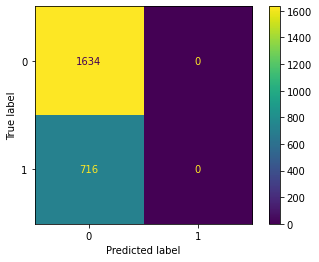

Validation Accuracy : 0.6950596252129472
Confusion matrix for validation : 



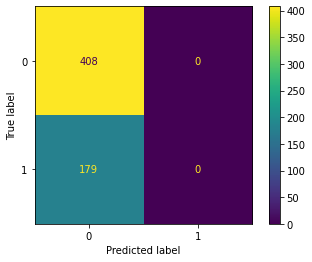

user_normFollowersCount 0.44513152990713023
user_normTweetsCount 0.29480100324233693
user_r_followingCount 0.2600674668505327
user_tweetsCount 0.0
user_r_normMentionedInf 0.0
user_r_normFollowersCount 0.0
user_r_followersCount 0.0
user_normStatusesCount 0.0
user_normRepliesCount 0.0
user_normFollowingCount 0.0

--------------------------------------

max_depth =  3
f1 score: 0.5739804338047972
Train Accuracy : 0.6978723404255319
Confusion matrix for training : 



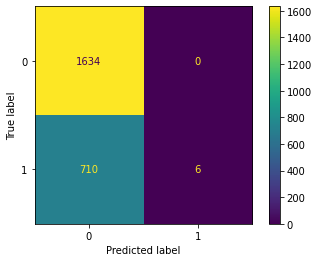

Validation Accuracy : 0.696763202725724
Confusion matrix for validation : 



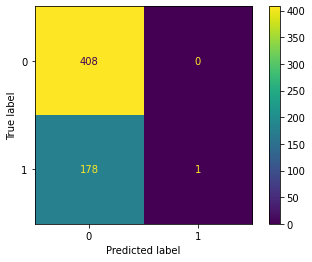

user_normFollowersCount 0.3161395594388532
user_normTweetsCount 0.2093724057395096
user_r_followingCount 0.18470409052277068
user_normFollowingCount 0.09203501157230526
user_normStatusesCount 0.07493751358959995
user_r_normFollowersCount 0.07367237310204039
user_r_followersCount 0.04913904603492087
user_tweetsCount 0.0
user_r_normMentionedInf 0.0
user_normRepliesCount 0.0

--------------------------------------

max_depth =  4
f1 score: 0.6304278274680278
Train Accuracy : 0.7076595744680851
Confusion matrix for training : 



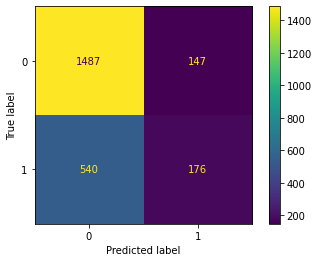

Validation Accuracy : 0.6695059625212947
Confusion matrix for validation : 



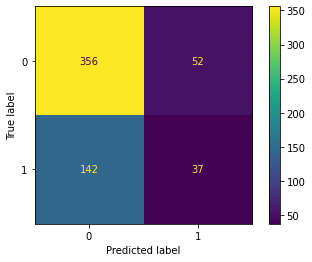

user_normFollowersCount 0.2607519149562381
user_normTweetsCount 0.14089523522826908
user_r_followingCount 0.12429491933243061
user_r_normFollowersCount 0.11681300152283726
user_r_followersCount 0.08619408100985465
user_normRepliesCount 0.06917871183012364
user_normFollowingCount 0.06193411476032643
user_tweetsCount 0.05580840481550724
user_normStatusesCount 0.05042851070720579
user_r_normMentionedInf 0.033701105837207083

--------------------------------------

max_depth =  5
f1 score: 0.6241223319736533
Train Accuracy : 0.7195744680851064
Confusion matrix for training : 



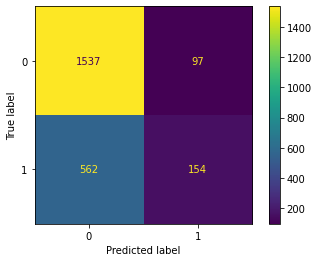

Validation Accuracy : 0.6746166950596252
Confusion matrix for validation : 



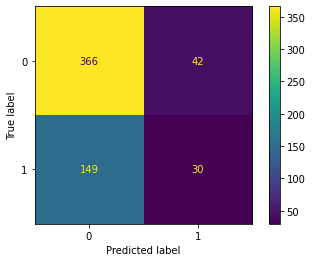

user_normFollowersCount 0.2616527540258823
user_normTweetsCount 0.12726718075126006
user_r_followingCount 0.12563033648565602
user_normFollowingCount 0.10896926651213276
user_r_normFollowersCount 0.09041271288696659
user_normRepliesCount 0.07250136733473123
user_r_followersCount 0.0667138126518936
user_normStatusesCount 0.06160073634860938
user_tweetsCount 0.059167335846641855
user_r_normMentionedInf 0.02608449715622605

--------------------------------------

max_depth =  6
f1 score: 0.6340559449653432
Train Accuracy : 0.7297872340425532
Confusion matrix for training : 



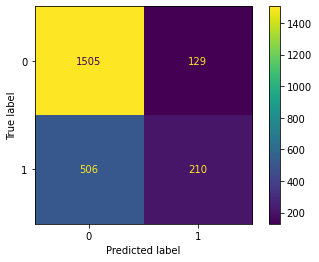

Validation Accuracy : 0.676320272572402
Confusion matrix for validation : 



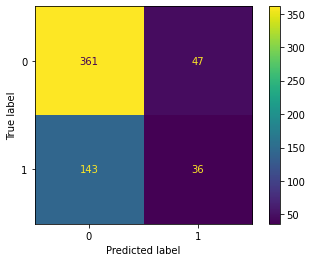

user_normFollowersCount 0.20643314249578332
user_normTweetsCount 0.12649540030110554
user_normFollowingCount 0.1105770763553493
user_r_followersCount 0.1062951042271436
user_r_followingCount 0.10501414728869661
user_r_normFollowersCount 0.0951753598675837
user_normStatusesCount 0.08783222912186554
user_normRepliesCount 0.06830111758648769
user_tweetsCount 0.057773580471407904
user_r_normMentionedInf 0.03610284228457685

--------------------------------------

max_depth =  7
f1 score: 0.6010775036570374
Train Accuracy : 0.7531914893617021
Confusion matrix for training : 



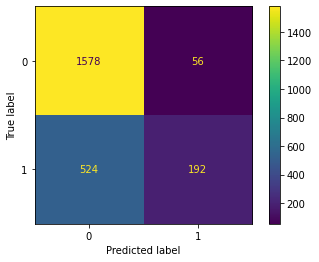

Validation Accuracy : 0.6626916524701874
Confusion matrix for validation : 



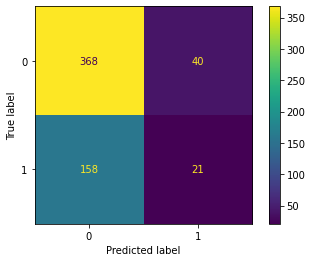

user_normFollowersCount 0.19615482593668102
user_r_followersCount 0.12160849188328758
user_normTweetsCount 0.11252442429561188
user_r_followingCount 0.10460646142894695
user_r_normFollowersCount 0.1025676627525596
user_normFollowingCount 0.10083277426632925
user_tweetsCount 0.08398137183727804
user_normStatusesCount 0.08056933805178554
user_normRepliesCount 0.061026461180923065
user_r_normMentionedInf 0.03612818836659711

--------------------------------------

max_depth =  8
f1 score: 0.6072116765594762
Train Accuracy : 0.776595744680851
Confusion matrix for training : 



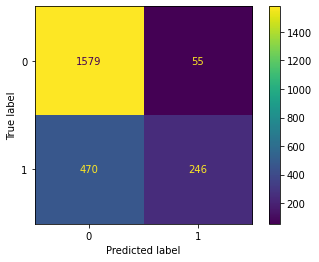

Validation Accuracy : 0.6592844974446337
Confusion matrix for validation : 



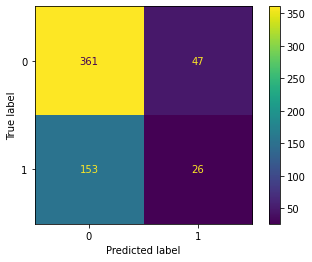

user_normFollowersCount 0.18341628296520968
user_r_followersCount 0.13396315062576958
user_r_followingCount 0.12204955082530658
user_r_normFollowersCount 0.11394937625660154
user_normTweetsCount 0.09917407525940178
user_normFollowingCount 0.09220050327148405
user_normStatusesCount 0.08130432672385594
user_tweetsCount 0.07024673550769624
user_normRepliesCount 0.05531167311714151
user_r_normMentionedInf 0.048384325447533

--------------------------------------

max_depth =  9
f1 score: 0.596038663007965
Train Accuracy : 0.7961702127659575
Confusion matrix for training : 



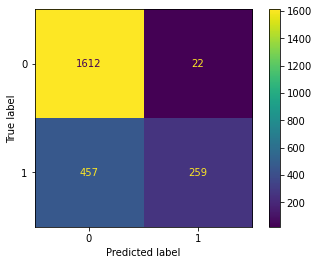

Validation Accuracy : 0.6524701873935264
Confusion matrix for validation : 



KeyboardInterrupt: ignored

In [ ]:
skf =StratifiedKFold(n_splits=5, shuffle =True, random_state = 50)
skf.get_n_splits(X, y)

# The purpose of the K-fold is to prevent the classifier from over fitting the training data. 
# So on each fold you keep a separate test set which the classifier has not seen and verify the accuracy on it. 
# You average your prediction to see how best your classifier is performing.
X = X_train_1
y = y_train_1
depth = []
f1score  = [] 
accuracy_train = []
accuracy_val = []
num_top_features = []

for x in range(2,21):
    depth.append(x)
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        # print(f'Num in Training: { len(X_train) } ')
        # print(f'Num in Test: { len(X_test) } ')
        y_train, y_val = y[train_index], y[val_index]
        
        
        # imputer = KNNImputer(n_neighbors=3) #change nn 
        # X_train = imputer.fit_transform(X_train)
        # X_test = imputer.fit_transform(X_test)
        
        clf = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f = f1_score(y_true = y_val , y_pred = y_pred,average = 'weighted')
        # evaluate_model(clf)
    print("max_depth = ", x)  
    # print('KFold CrossValScore Using Decision Tree %s' % cross_val_score(clf,X, y, cv=10).mean()) 
    print("f1 score:", f)
    f1score.append(f)
    print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
    accuracy_train.append( accuracy_score(y_train, clf.predict(X_train)))
    cm_train =  confusion_matrix(y_train, clf.predict(X_train)) #values 
    cm_test = confusion_matrix(y_val, clf.predict(X_val))
    
    print("Confusion matrix for training : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()    

    print("Validation Accuracy :", accuracy_score(y_val,y_pred))
    accuracy_val.append(accuracy_score(y_val,y_pred))
    print("Confusion matrix for validation : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()  



    for importance, name in sorted(zip( clf.feature_importances_, df.drop('retweeted_label',axis=1).columns),reverse=True)[:10]:
        print(name, importance)
    print("\n--------------------------------------\n")

In [ ]:
accuracy_val

[0.6950596252129472,
 0.696763202725724,
 0.6695059625212947,
 0.6746166950596252,
 0.676320272572402,
 0.6626916524701874,
 0.6592844974446337,
 0.6524701873935264,
 0.637137989778535,
 0.6422487223168655,
 0.6473594548551959,
 0.637137989778535,
 0.6422487223168655,
 0.6286201022146508,
 0.6473594548551959,
 0.6405451448040886,
 0.6337308347529813,
 0.6132879045996593,
 0.6303236797274276]

0.6175865128660158
Train Accuracy : 0.7076595744680851
Confusion matrix for training : 



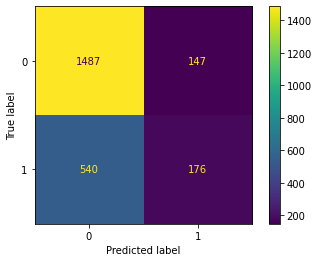

Test Accuracy : 0.6632653061224489
Confusion matrix for test : 



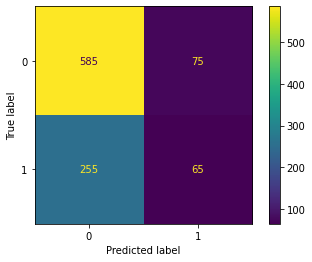

user_normFollowersCount 0.2607519149562381
user_normTweetsCount 0.14089523522826908
user_r_followingCount 0.12429491933243061
user_r_normFollowersCount 0.11681300152283726
user_r_followersCount 0.08619408100985465
user_normRepliesCount 0.06917871183012364
user_normFollowingCount 0.06193411476032643
user_tweetsCount 0.05580840481550724
user_normStatusesCount 0.05042851070720579
user_r_normMentionedInf 0.033701105837207083

--------------------------------------



In [ ]:
clf = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
print(f)
cm_train =  confusion_matrix(y_train, clf.predict(X_train))
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Confusion matrix for training : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=clf.classes_)
disp.plot()
plt.show() 
print("Test Accuracy :", accuracy_score(y_test,y_pred))
print("Confusion matrix for test : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=clf.classes_)
disp.plot()
plt.show()      
for importance, name in sorted(zip( clf.feature_importances_, df.drop('retweeted_label',axis=1).columns),reverse=True):
        print(name, importance)
print("\n--------------------------------------\n")

# Splitting data by hashtags

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
merged_df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
len(merged_df)

4896

In [ ]:
merged_df.sort_values(by=['hashtag'])

# 238 #EnoughIsEnough
# 760 #CostOfLivingCrisis
# 321 #GetBackToWorkYouFatPonce
# 691 #EnergyPrices
# 83 #VoteThemOut
# 179 Lisa
# 853 #taiwan
# 572 #biden
# 112 #onepiece
# 264 F1
# 508 #BookLoversDay
# 315 #iOS16

,Unnamed: 0,id,hashtag,retweeter,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
979,979,1944177338,#BookLoversDay,1047494322,3237,1231376,59987,40311,2844,37562,...,0.004244,0.222419,0.086531,0.606789,0.007370,0.010699,0.018890,0.047302,0.475275,0.365229
3560,3560,107043434,#BookLoversDay,1934072136,4934,71375,63645,57121,911,33398,...,0.004063,0.399334,0.030590,0.524797,0.001783,0.003306,0.002489,0.037702,0.627127,0.381541
3561,3561,342008888,#BookLoversDay,315765375,296,7758,287,33982,16,118,...,0.004019,0.056080,0.105066,0.578672,0.052097,0.043020,0.062751,0.102315,0.432957,0.017092
3562,3562,1431321691,#BookLoversDay,736139693914501120,4951,104538,115551,112496,1380,3397,...,0.003808,0.272404,0.055860,0.549018,0.015163,0.007030,0.059055,0.036420,0.485921,0.344282
3563,3563,2600400422,#BookLoversDay,114518329,4468,25770,100554,35291,1820,5503,...,0.003696,0.153664,0.067977,0.699591,0.005845,0.017074,0.042346,0.013504,0.403346,0.344208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1847,1847,1079057886876073985,Lisa,1310168636955402240,616,45365,882,77928,14,917,...,0.006012,0.156122,0.036295,0.620577,0.011135,0.030835,0.030931,0.019105,0.319917,0.164201
1846,1846,1173941029667594241,Lisa,1293320718650937344,1066,12747,671,20190,1,1358,...,0.003242,0.169838,0.011473,0.625226,0.015738,0.038411,0.024766,0.014547,0.367885,0.276708
1845,1845,1010722801576054784,Lisa,1095295020070985728,970,81685,502,149097,1,539,...,0.003030,0.196763,0.007724,0.612863,0.005305,0.040088,0.008623,0.008634,0.320096,0.183356
1843,1843,1365648524231073795,Lisa,1432667551482269698,387,10936,268,7350,0,302,...,0.008779,0.105124,0.018241,0.609033,0.019076,0.041484,0.162113,0.013678,0.332211,0.364076


In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

df = merged_df.copy()

In [ ]:
VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
biden = df.loc[df['hashtag'] == "#biden"]
taiwan = df.loc[df['hashtag'] == "#taiwan"]
Lisa = df.loc[df['hashtag'] == "Lisa"]
EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
iOS16 = df.loc[df['hashtag'] == "#iOS16"]
onepiece = df.loc[df['hashtag'] == "#onepiece"]
F1 = df.loc[df['hashtag'] == "F1"]


In [ ]:
len(Lisa)

179

In [ ]:
# law = pd.concat([VoteThemOut, GetBackToWorkYouFatPonce, biden, taiwan])
# # music = pd.concat([Lisa])
# society = pd.concat([EnoughIsEnough,CostOfLivingCrisis, EnergyPrices,iOS16])
# hobbies = pd.concat([BookLoversDay,Lisa,onepiece, F1])
# tech = pd.concat([iOS16])
# books = pd.concat([onepiece])
# automotive = pd.concat([F1])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Test on each hashtag

In [ ]:
df = EnergyPrices.copy()

# VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
# GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
# biden = df.loc[df['hashtag'] == "#biden"]
# taiwan = df.loc[df['hashtag'] == "#taiwan"]
# Lisa = df.loc[df['hashtag'] == "Lisa"]
# EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
# CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
# EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
# BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
# iOS16 = df.loc[df['hashtag'] == "#iOS16"]
# onepiece = df.loc[df['hashtag'] == "#onepiece"]
# F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
len(df)

691

In [ ]:
for x in df.columns:
    print(x)

hashtag
user_daysAccountCreation
user_statusesCount
user_followersCount
user_favouritesCount
user_listCount
user_followingCount
user_normStatusesCount
user_normFollowersCount
user_normFavouritesCount
user_normListCount
user_normFollowingCount
user_isVerified
user_defaultPhoto
user_hasURL
user_tweetsCount
user_retweetsCount
user_repliesCount
user_normTweetsCount
user_normRetweetsCount
user_normRepliesCount
user_followsRetweeter
user_mentionedRetweeterCount
user_normMentionedRetweeterCount
user_r_mentionedInf
user_r_normMentionedInf
tweet_normSentiment_neg
tweet_normSentiment_neu
tweet_normSentiment_pos
tweet_normSentiment_comp
tweet_normTopic_arts&culture
tweet_normTopic_business&entrepreneurs
tweet_normTopic_celebrity&popculture
tweet_normTopic_diaries&dailylife
tweet_normTopic_family
tweet_normTopic_fashion&style
tweet_normTopic_filmtv&video
tweet_normTopic_fitness&health
tweet_normTopic_food&dining
tweet_normTopic_gaming
tweet_normTopic_learning&educational
tweet_normTopic_music
twee

In [ ]:
df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
df

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
81,3405,227774,5400,17761,193,5938,66.893979,1.585903,5.216153,0.056681,...,0.017667,0.105000,0.044732,0.651635,0.027859,0.005564,0.144905,0.020303,0.379380,0.364649
83,3216,295940,32260,186059,104,19599,92.021144,10.031095,57.854167,0.032338,...,0.002837,0.008525,0.005781,0.971596,0.002556,0.002718,0.005398,0.003426,0.243306,0.000000
88,3075,135082,4168,188407,37,4937,43.929106,1.355447,61.270569,0.012033,...,0.002867,0.008947,0.008055,0.966457,0.002849,0.002674,0.006465,0.004554,0.260699,0.000000
613,3835,58165,3370,93429,7,4090,15.166884,0.878748,24.362190,0.001825,...,0.009254,0.048893,0.037154,0.541022,0.027211,0.010433,0.299505,0.035784,0.306679,0.305911
670,2435,499288,4562,313333,10,5009,205.046407,1.873511,128.678850,0.004107,...,0.003458,0.043866,0.006935,0.761444,0.002919,0.013108,0.007798,0.133930,0.493539,0.370221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,1751,142749,10241,58927,29,10206,81.524272,5.848658,33.653341,0.016562,...,0.012113,0.039384,0.023348,0.514612,0.043815,0.029712,0.292571,0.051402,0.308072,0.374009
4270,4637,405494,7324,196217,487,8056,87.447488,1.579469,42.315506,0.105025,...,0.003983,0.029904,0.009861,0.511173,0.033006,0.022035,0.361349,0.032672,0.344939,0.430101
4271,2018,33273,2136,293632,10,970,16.488107,1.058474,145.506442,0.004955,...,0.003983,0.029904,0.009861,0.511173,0.033006,0.022035,0.361349,0.032672,0.344939,0.430101
4272,1473,74785,30120,167132,42,25933,50.770536,20.448065,113.463680,0.028513,...,0.002635,0.011381,0.003451,0.972434,0.002039,0.002222,0.004570,0.003904,0.510632,0.000000


In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

Test

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (552, 179)
X_test shape: (139, 179)
y_train shape: (552,)
y_test shape: (139,)
X_val shape: (552,)
y val shape: (139,)


0.5672253814000479
Train Accuracy : 0.7608695652173914
Confusion matrix for training : 



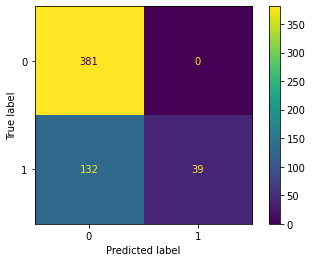

Test Accuracy : 0.6618705035971223
Confusion matrix for test : 



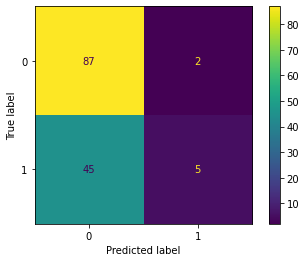

In [ ]:
clf = DecisionTreeClassifier(random_state=42, criterion = "entropy", max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
print(f)
cm_train =  confusion_matrix(y_train, clf.predict(X_train))
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Confusion matrix for training : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=clf.classes_)
disp.plot()
plt.show() 
print("Test Accuracy :", accuracy_score(y_test,y_pred))
print("Confusion matrix for test : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=clf.classes_)
disp.plot()
plt.show()      
# for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True):
#         print(name, importance)
# print("\n--------------------------------------\n")

Test 2

In [ ]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=4):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {
        #   "Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean(),
            #   "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
            #   "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
            #   "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
            #   "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean(),
            #   "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
            #   "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
            #   "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }



In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=42)
decision_tree_result = cross_validation(decision_tree_model, X, y, 4)
print(decision_tree_result)

{'Mean Training Accuracy': 0.9960629921259841, 'Mean Training Precision': 1.0, 'Mean Training Recall': 0.9884615384615385, 'Mean Training F1 Score': 0.9941860465116279, 'Mean Validation Accuracy': 0.5039370078740157, 'Mean Validation Precision': 0.30711797260710305, 'Mean Validation Recall': 0.376585623678647, 'Mean Validation F1 Score': 0.3357199445434739}


## Test on diff categories

In [ ]:
merged_df = hobbies.copy() # society, hobbies

In [ ]:
len(merged_df)

1063

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
merged_df.drop(['id','hashtag', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

In [ ]:
merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
X = merged_df.drop('retweeted_label',axis=1).values
y = merged_df['retweeted_label'].values

In [ ]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
X_train_1, X_val, y_train_1, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(y_train.shape))
print("y val shape: {}".format(y_test.shape))

X_train shape: (850, 179)
X_test shape: (213, 179)
y_train shape: (850,)
y_test shape: (213,)
X_val shape: (850,)
y val shape: (213,)


max_depth =  2
f1 score: 0.6197506030286405
Train Accuracy : 0.7027027027027027
Confusion matrix for training : 



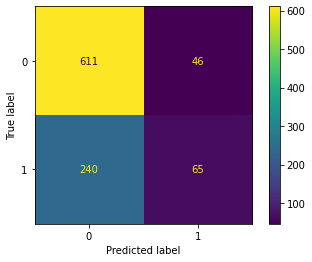

Validation Accuracy : 0.6791666666666667
Confusion matrix for validation : 



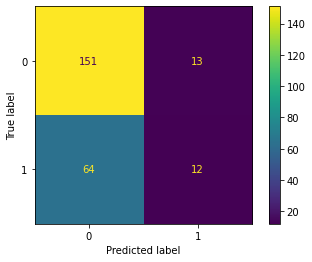

user_normFollowersCount 0.43598423686717636
user_r_followingCount 0.37798982829200534
hist_r_normTopic_celebrity&popculture 0.18602593484081825
user_tweetsCount 0.0
user_statusesCount 0.0
user_retweetsCount 0.0
user_repliesCount 0.0
user_r_tweetsCount 0.0
user_r_statusesCount 0.0
user_r_retweetsCount 0.0

--------------------------------------

max_depth =  3
f1 score: 0.6266625168585953
Train Accuracy : 0.7224532224532224
Confusion matrix for training : 



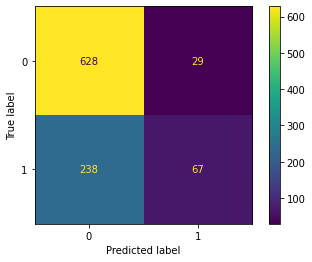

Validation Accuracy : 0.6833333333333333
Confusion matrix for validation : 



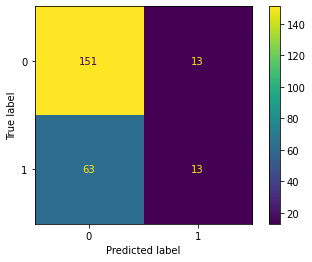

user_normFollowersCount 0.26347545632857355
user_r_followingCount 0.22842808082333477
hist_r_normTopic_celebrity&popculture 0.11241981687990728
hist_r_normTopic_youth&studentlife 0.11013787196833018
hist_normTopic_business&entrepreneurs 0.1024374074162082
hist_hateSpeech_targeted 0.09297964368960204
hist_emotion_fear 0.09012172289404385
user_tweetsCount 0.0
user_statusesCount 0.0
user_retweetsCount 0.0

--------------------------------------

max_depth =  4
f1 score: 0.6530673019654556
Train Accuracy : 0.7484407484407485
Confusion matrix for training : 



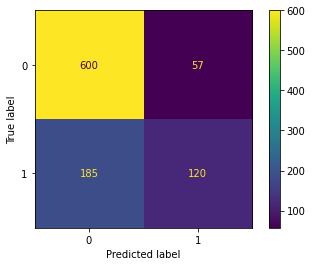

Validation Accuracy : 0.6875
Confusion matrix for validation : 



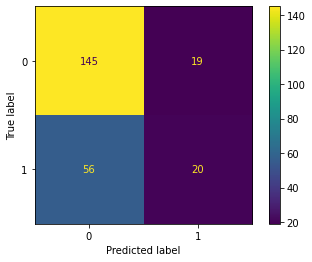

user_normFollowersCount 0.1705276980969849
user_r_followingCount 0.14784418763825047
hist_normTopic_business&entrepreneurs 0.12610745122312178
hist_r_normTopic_celebrity&popculture 0.07276082888384058
hist_r_normTopic_youth&studentlife 0.07128389885636172
user_r_daysAccountCreation 0.062025682054746366
hist_hateSpeech_targeted 0.06017867785184727
hist_normTopic_food&dining 0.05937128076851122
hist_r_normTopic_arts&culture 0.058995913823637496
hist_emotion_fear 0.05832896227909096

--------------------------------------

max_depth =  5
f1 score: 0.6439958592132505
Train Accuracy : 0.761954261954262
Confusion matrix for training : 



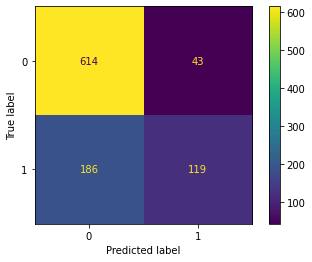

Validation Accuracy : 0.6833333333333333
Confusion matrix for validation : 



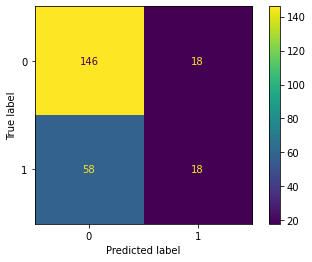

user_normFollowersCount 0.18450458867074473
hist_normTopic_business&entrepreneurs 0.1337539208153516
user_r_followingCount 0.09700886191164244
hist_r_normTopic_celebrity&popculture 0.08407154886344077
hist_r_normTopic_youth&studentlife 0.046773363303267104
tweet_normTopic_sports 0.04447809960442822
user_r_daysAccountCreation 0.040698528102755066
hist_hateSpeech_targeted 0.03948660507398052
user_normRetweetsCount 0.03939833837448815
tweet_normEmotion_anger 0.03895682657259731

--------------------------------------

max_depth =  6
f1 score: 0.6095095095095096
Train Accuracy : 0.7827442827442828
Confusion matrix for training : 



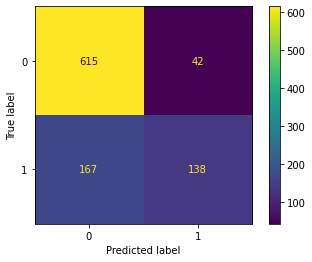

Validation Accuracy : 0.6541666666666667
Confusion matrix for validation : 



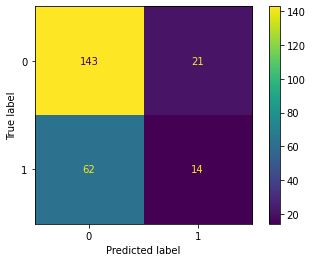

user_normFollowersCount 0.1380395402099721
hist_normTopic_business&entrepreneurs 0.1000697590431241
user_r_followingCount 0.07257845883970201
hist_r_normTopic_celebrity&popculture 0.06289923753906995
tweet_normTopic_sports 0.049799578384325166
user_statusesCount 0.04694511038053439
hist_normTopic_diaries&dailylife 0.04050384454152905
user_normStatusesCount 0.03585652443574191
hist_r_normTopic_youth&studentlife 0.034994108336129065
hist_r_normTopic_food&dining 0.03301795082176323

--------------------------------------

max_depth =  7
f1 score: 0.5898645957785742
Train Accuracy : 0.8253638253638254
Confusion matrix for training : 



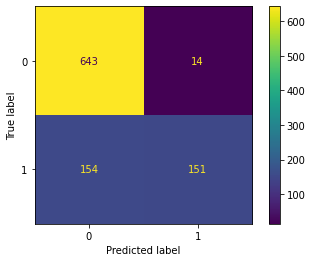

Validation Accuracy : 0.6416666666666667
Confusion matrix for validation : 



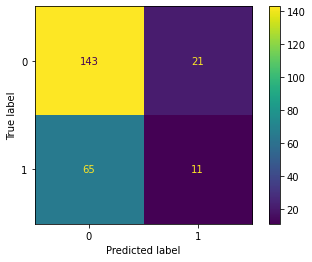

user_normFollowersCount 0.0830485814200617
hist_normTopic_business&entrepreneurs 0.07238150458946535
user_r_followingCount 0.0524967592790779
user_r_tweetsCount 0.047187692589156414
hist_normTopic_fashion&style 0.04687189433321571
hist_r_normTopic_celebrity&popculture 0.04549567715703305
hist_r_normTopic_food&dining 0.045262329848271374
user_normStatusesCount 0.04103291963987246
user_normTweetsCount 0.03584548455989812
user_statusesCount 0.033955889920723105

--------------------------------------

max_depth =  8
f1 score: 0.6099338372065642
Train Accuracy : 0.8586278586278586
Confusion matrix for training : 



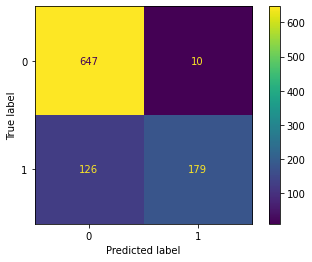

Validation Accuracy : 0.6458333333333334
Confusion matrix for validation : 



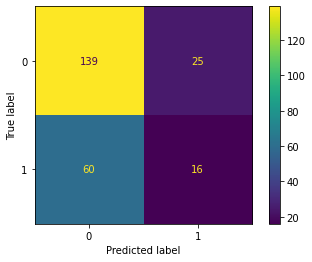

user_normFollowersCount 0.0783377246849763
hist_normTopic_business&entrepreneurs 0.0689596044820587
user_normTweetsCount 0.04523788264438546
user_r_followingCount 0.04118842556267603
user_r_tweetsCount 0.03702298561613321
hist_normTopic_fashion&style 0.03677521350341118
hist_r_normTopic_celebrity&popculture 0.035695447447416435
hist_r_normTopic_food&dining 0.03551236551266143
user_normStatusesCount 0.032194013105104585
user_normListCount 0.027660612947618256

--------------------------------------

max_depth =  9
f1 score: 0.5922152244557559
Train Accuracy : 0.8846153846153846
Confusion matrix for training : 



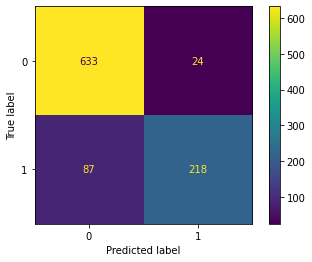

Validation Accuracy : 0.6083333333333333
Confusion matrix for validation : 



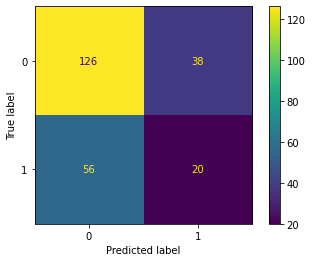

user_normFollowersCount 0.05473803276619604
hist_normTopic_business&entrepreneurs 0.05352954241647352
user_normTweetsCount 0.03800288255144585
user_r_followingCount 0.03460106458655434
user_r_tweetsCount 0.031101813166943208
hist_normTopic_fashion&style 0.03089366782616061
tweet_normTopic_arts&culture 0.03027388215107135
hist_r_normTopic_celebrity&popculture 0.029986591274157152
hist_r_normTopic_food&dining 0.029832790060283377
hist_hateSpeech_targeted 0.028383780867773257

--------------------------------------

max_depth =  10
f1 score: 0.5976489533011272
Train Accuracy : 0.920997920997921
Confusion matrix for training : 



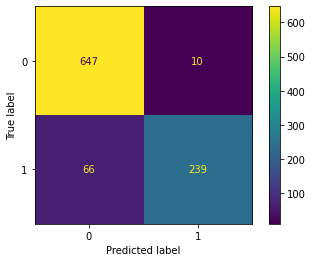

Validation Accuracy : 0.6125
Confusion matrix for validation : 



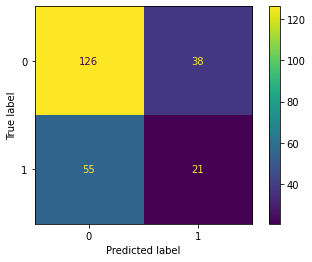

hist_normTopic_business&entrepreneurs 0.049999327356898604
user_normFollowersCount 0.04696322697859233
tweet_normTopic_gaming 0.03517093685961308
user_r_tweetsCount 0.034684497877748084
hist_hateSpeech_targeted 0.03354845485429502
user_normTweetsCount 0.032605081127550464
user_r_followingCount 0.029686445927278628
user_statusesCount 0.026732899891157097
hist_normTopic_fashion&style 0.026505635314267473
tweet_normTopic_arts&culture 0.025973881908703502

--------------------------------------

max_depth =  11
f1 score: 0.5564234904880067
Train Accuracy : 0.9417879417879418
Confusion matrix for training : 



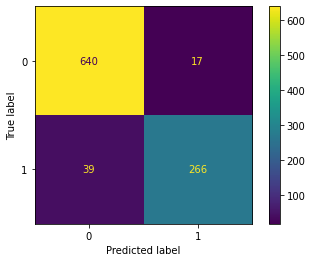

Validation Accuracy : 0.5541666666666667
Confusion matrix for validation : 



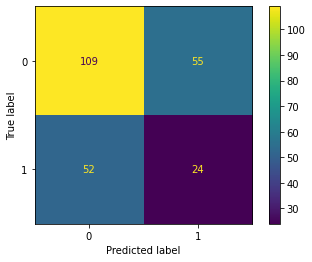

tweet_normTopic_arts&culture 0.04336100358989101
user_normFollowersCount 0.04229919556970896
hist_normTopic_business&entrepreneurs 0.036598729643554435
user_normTweetsCount 0.0360978859450736
hist_normTopic_fashion&style 0.032137136345985626
user_r_tweetsCount 0.03171927932301786
tweet_normTopic_gaming 0.03167802624110161
hist_r_emotion_anger 0.03038202413884902
user_r_followingCount 0.026738213339129176
hist_r_normTopic_celebrity&popculture 0.02317234698938283

--------------------------------------

max_depth =  12
f1 score: 0.5543517572136174
Train Accuracy : 0.972972972972973
Confusion matrix for training : 



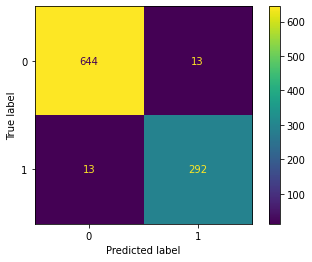

Validation Accuracy : 0.55
Confusion matrix for validation : 



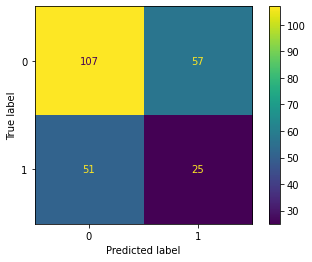

user_normFollowersCount 0.0465883543445508
hist_normTopic_business&entrepreneurs 0.04125604222673473
tweet_normTopic_arts&culture 0.039723595345665594
user_r_tweetsCount 0.03565974385802928
hist_normTopic_fashion&style 0.03407919164329646
hist_r_normTopic_food&dining 0.03227162336732534
user_normTweetsCount 0.031025272062438797
user_r_followingCount 0.024495234865764673
tweet_normTopic_gaming 0.023444250524265346
hist_r_normTopic_celebrity&popculture 0.021228497009008217

--------------------------------------

max_depth =  13
f1 score: 0.5295935215032628
Train Accuracy : 0.9875259875259875
Confusion matrix for training : 



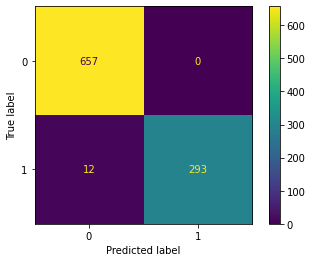

Validation Accuracy : 0.525
Confusion matrix for validation : 



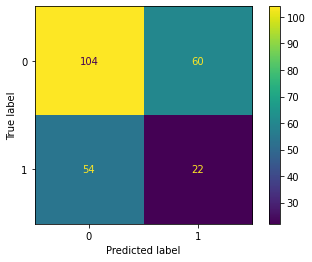

user_normFollowersCount 0.04118321795061468
tweet_normTopic_arts&culture 0.03761200954155239
user_normTweetsCount 0.03521454506859676
hist_r_normTopic_food&dining 0.03489723171444408
hist_hateSpeech_targeted 0.032048898228120404
hist_normTopic_business&entrepreneurs 0.03197825110378582
hist_normTopic_fashion&style 0.027876252365274638
user_r_tweetsCount 0.027513796678512524
hist_r_emotion_anger 0.026353840713882252
hist_r_normTopic_family 0.02360896164316745

--------------------------------------

max_depth =  14
f1 score: 0.5330197918926202
Train Accuracy : 0.9948024948024948
Confusion matrix for training : 



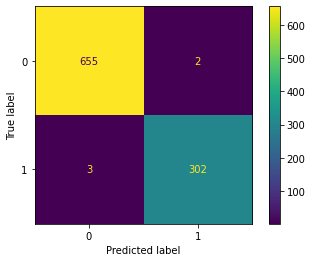

Validation Accuracy : 0.5291666666666667
Confusion matrix for validation : 



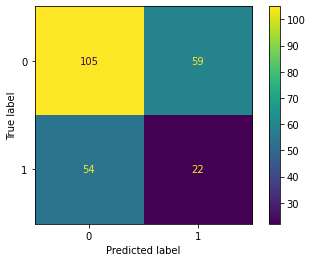

tweet_normTopic_arts&culture 0.042705051828819875
user_normFollowersCount 0.0400965688257182
user_normTweetsCount 0.03428538371388414
hist_normTopic_business&entrepreneurs 0.031134481716475714
hist_normTopic_fashion&style 0.027140717194748535
user_r_tweetsCount 0.026787825164602718
hist_r_emotion_anger 0.025658475480797697
user_r_followingCount 0.022581174586229342
tweet_normTopic_gaming 0.021612314273893294
user_tweetsCount 0.020276115075876146

--------------------------------------

max_depth =  15
f1 score: 0.5391666666666666
Train Accuracy : 0.997920997920998
Confusion matrix for training : 



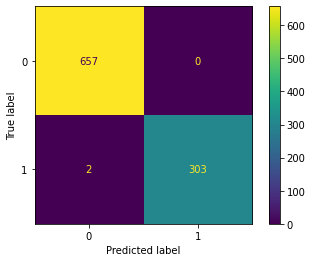

Validation Accuracy : 0.5333333333333333
Confusion matrix for validation : 



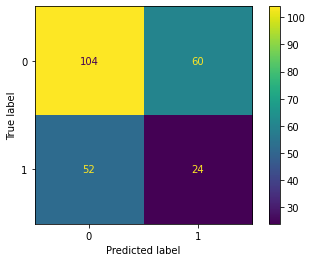

user_normFollowersCount 0.0397198604415306
tweet_normTopic_arts&culture 0.03627554728014352
user_normTweetsCount 0.03529164275180868
hist_normTopic_business&entrepreneurs 0.030618270742411247
hist_hateSpeech_targeted 0.02816749497961641
hist_normTopic_fashion&style 0.026885729398546665
user_r_tweetsCount 0.026536152798881864
hist_r_emotion_anger 0.025417413386903794
user_normStatusesCount 0.02324407825218906
user_r_followingCount 0.022369023820202186

--------------------------------------

max_depth =  16
f1 score: 0.5521206929003031
Train Accuracy : 0.998960498960499
Confusion matrix for training : 



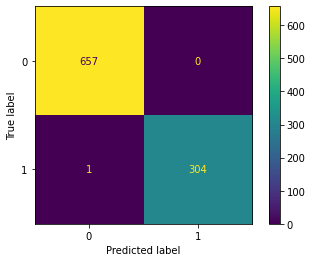

Validation Accuracy : 0.5458333333333333
Confusion matrix for validation : 



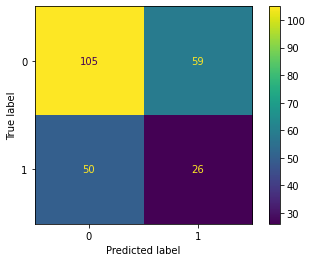

user_normFollowersCount 0.03959334418765596
tweet_normTopic_arts&culture 0.036160001900625086
user_normTweetsCount 0.03142721690283325
hist_normTopic_business&entrepreneurs 0.030743734110087517
hist_r_normTopic_food&dining 0.02937654439746152
hist_normTopic_fashion&style 0.02680009259800457
user_r_tweetsCount 0.02645162947460429
hist_r_emotion_anger 0.025336453487016238
user_r_followingCount 0.02229777369331087
tweet_normTopic_gaming 0.021341072884750005

--------------------------------------

max_depth =  17
f1 score: 0.5521206929003031
Train Accuracy : 0.998960498960499
Confusion matrix for training : 



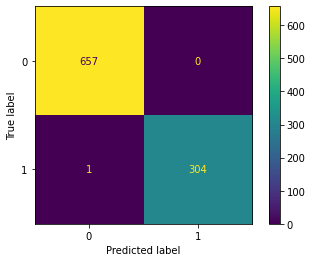

Validation Accuracy : 0.5458333333333333
Confusion matrix for validation : 



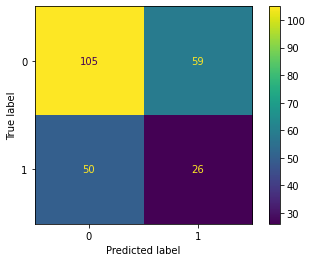

user_normFollowersCount 0.03959334418765596
tweet_normTopic_arts&culture 0.036160001900625086
user_normTweetsCount 0.03142721690283325
hist_normTopic_business&entrepreneurs 0.030743734110087517
hist_r_normTopic_food&dining 0.02937654439746152
hist_normTopic_fashion&style 0.02680009259800457
user_r_tweetsCount 0.02645162947460429
hist_r_emotion_anger 0.025336453487016238
user_r_followingCount 0.02229777369331087
tweet_normTopic_gaming 0.021341072884750005

--------------------------------------

max_depth =  18
f1 score: 0.5521206929003031
Train Accuracy : 0.998960498960499
Confusion matrix for training : 



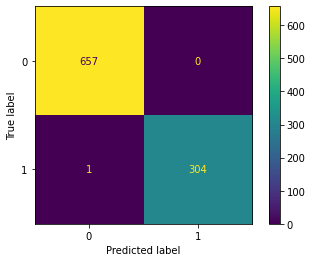

Validation Accuracy : 0.5458333333333333
Confusion matrix for validation : 



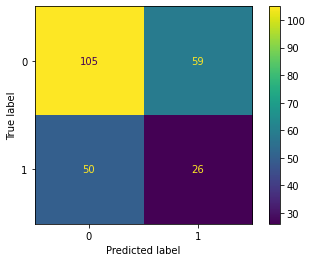

user_normFollowersCount 0.03959334418765596
tweet_normTopic_arts&culture 0.036160001900625086
user_normTweetsCount 0.03142721690283325
hist_normTopic_business&entrepreneurs 0.030743734110087517
hist_r_normTopic_food&dining 0.02937654439746152
hist_normTopic_fashion&style 0.02680009259800457
user_r_tweetsCount 0.02645162947460429
hist_r_emotion_anger 0.025336453487016238
user_r_followingCount 0.02229777369331087
tweet_normTopic_gaming 0.021341072884750005

--------------------------------------

max_depth =  19
f1 score: 0.5521206929003031
Train Accuracy : 0.998960498960499
Confusion matrix for training : 



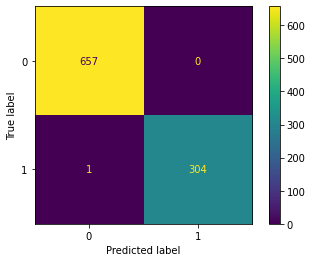

Validation Accuracy : 0.5458333333333333
Confusion matrix for validation : 



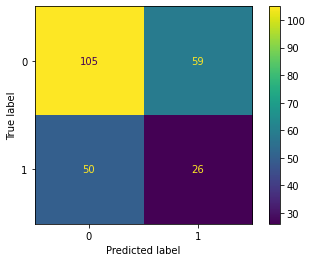

user_normFollowersCount 0.03959334418765596
tweet_normTopic_arts&culture 0.036160001900625086
user_normTweetsCount 0.03142721690283325
hist_normTopic_business&entrepreneurs 0.030743734110087517
hist_r_normTopic_food&dining 0.02937654439746152
hist_normTopic_fashion&style 0.02680009259800457
user_r_tweetsCount 0.02645162947460429
hist_r_emotion_anger 0.025336453487016238
user_r_followingCount 0.02229777369331087
tweet_normTopic_gaming 0.021341072884750005

--------------------------------------

max_depth =  20
f1 score: 0.5521206929003031
Train Accuracy : 0.998960498960499
Confusion matrix for training : 



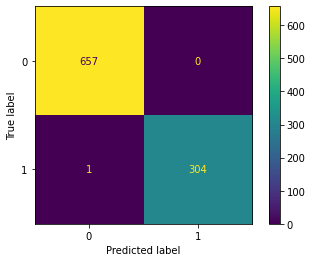

Validation Accuracy : 0.5458333333333333
Confusion matrix for validation : 



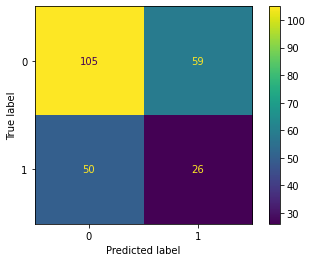

user_normFollowersCount 0.03959334418765596
tweet_normTopic_arts&culture 0.036160001900625086
user_normTweetsCount 0.03142721690283325
hist_normTopic_business&entrepreneurs 0.030743734110087517
hist_r_normTopic_food&dining 0.02937654439746152
hist_normTopic_fashion&style 0.02680009259800457
user_r_tweetsCount 0.02645162947460429
hist_r_emotion_anger 0.025336453487016238
user_r_followingCount 0.02229777369331087
tweet_normTopic_gaming 0.021341072884750005

--------------------------------------



In [ ]:
skf =StratifiedKFold(n_splits=5, shuffle =True, random_state = 50)
skf.get_n_splits(X, y)

# The purpose of the K-fold is to prevent the classifier from over fitting the training data. 
# So on each fold you keep a separate test set which the classifier has not seen and verify the accuracy on it. 
# You average your prediction to see how best your classifier is performing.
X = X_train_1
y = y_train_1
depth = []
f1score  = [] 
accuracy_train = []
accuracy_val = []
num_top_features = []
user_normFollowersCount = []
user_r_followingCount  = []
user_normTweetsCount = []
user_tweetsCount = []
hist_r_emotion_other = []
user_r_listCount =[]
hist_emotion_sadness = []
tweet_normTopic_learningeducational= []
hist_r_normTopic_fitnesshealth = []
user_normRepliesCount = []
for x in range(2,21):
    depth.append(x)
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        # print(f'Num in Training: { len(X_train) } ')
        # print(f'Num in Test: { len(X_test) } ')
        y_train, y_val = y[train_index], y[val_index]
        
        
        # imputer = KNNImputer(n_neighbors=3) #change nn 
        # X_train = imputer.fit_transform(X_train)
        # X_test = imputer.fit_transform(X_test)
        
        clf = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= x)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        f = f1_score(y_true = y_val , y_pred = y_pred,average = 'weighted')
        # evaluate_model(clf)
    print("max_depth = ", x)  
    # print('KFold CrossValScore Using Decision Tree %s' % cross_val_score(clf,X, y, cv=10).mean()) 
    print("f1 score:", f)
    f1score.append(f)
    print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
    accuracy_train.append( accuracy_score(y_train, clf.predict(X_train)))
    cm_train =  confusion_matrix(y_train, clf.predict(X_train)) #values 
    cm_test = confusion_matrix(y_val, clf.predict(X_val))
    
    print("Confusion matrix for training : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()    

    print("Validation Accuracy :", accuracy_score(y_val,y_pred))
    accuracy_val.append(accuracy_score(y_val,y_pred))
    print("Confusion matrix for validation : \n" )
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                              display_labels=clf.classes_)
    disp.plot()
    plt.show()  



    # count = 0
    # for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)  :
    #     if (importance) != 0.0:
    #         count +=1
    #     if name == "user_normFollowersCount":
    #         user_normFollowersCount.append((x,importance))
    #     if name == "user_r_followingCount":
    #         user_r_followingCount.append((x,importance))
    #     if name == "user_normTweetsCount":
    #         user_normTweetsCount.append((x,importance))
    #     if name == "user_tweetsCount":
    #         user_tweetsCount.append((x,importance))
    #     if name == "hist_r_emotion_other":
    #         hist_r_emotion_other.append((x,importance))
    #     if name == "user_r_listCount":
    #         user_r_listCount.append((x,importance))
    #     if name == "hist_emotion_sadness":
    #         hist_emotion_sadness.append((x,importance))
    #     if name == "tweet_normTopic_learning&educational":
    #         tweet_normTopic_learningeducational.append((x,importance))
    #     if name == "hist_r_normTopic_fitness&health":
    #         hist_r_normTopic_fitnesshealth.append((x,importance))
    #     if name == "user_normRepliesCount":
    #         user_normRepliesCount.append((x,importance))
            

    # num_top_features.append(count)

    for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)[:10]:
        print(name, importance)
    print("\n--------------------------------------\n")

In [ ]:
print(f1score)

[0.6197506030286405, 0.6266625168585953, 0.6530673019654556, 0.6439958592132505, 0.6095095095095096, 0.5898645957785742, 0.6099338372065642, 0.5922152244557559, 0.5976489533011272, 0.5564234904880067, 0.5543517572136174, 0.5295935215032628, 0.5330197918926202, 0.5391666666666666, 0.5521206929003031, 0.5521206929003031, 0.5521206929003031, 0.5521206929003031, 0.5521206929003031]


Train Accuracy : 0.7835294117647059
Confusion matrix for training : 



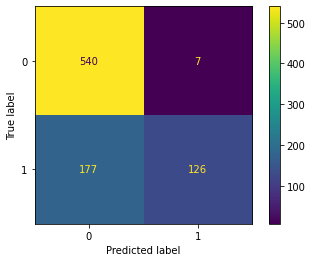

Test Accuracy : 0.6056338028169014
Confusion matrix for test : 



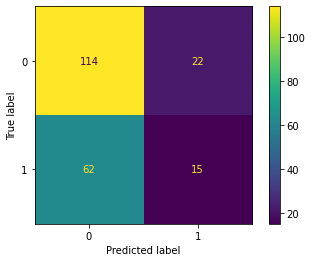

user_normFollowersCount 0.1133468917880499
user_daysAccountCreation 0.06909556378116727
user_normRepliesCount 0.051287132357239924
hist_r_politeness 0.04390407035705149
hist_normTopic_youth&studentlife 0.04343288074942081
hist_normTopic_news&socialconcern 0.04330117403591542
hist_r_hateSpeech_aggressiveness 0.04218147877095045
hist_r_normSentiment_neu 0.037430944928537505
user_r_followingCount 0.03642146982656341
hist_emotion_disgust 0.0355302529536106

--------------------------------------



In [ ]:
clf = DecisionTreeClassifier(random_state=50, criterion = "entropy", max_depth= 6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
f = f1_score(y_true = y_test , y_pred = y_pred,average = 'weighted')
cm_train =  confusion_matrix(y_train, clf.predict(X_train))
cm_test = confusion_matrix(y_test, clf.predict(X_test))
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Confusion matrix for training : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                            display_labels=clf.classes_)
disp.plot()
plt.show() 
print("Test Accuracy :", accuracy_score(y_test,y_pred))
print("Confusion matrix for test : \n" )
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                            display_labels=clf.classes_)
disp.plot()
plt.show()      
for importance, name in sorted(zip( clf.feature_importances_, merged_df.drop('retweeted_label',axis=1).columns),reverse=True)[:10]:
        print(name, importance)
print("\n--------------------------------------\n")

# Testing XGBoost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#/content/drive/MyDrive/Colab Notebooks/Ziwen /raw_d

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
merged_df.drop(['id','hashtag', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)
# merged_df.drop(['Unnamed: 0'], inplace = True, axis =1)

In [ ]:
merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
df = merged_df.copy()

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import StratifiedKFold, KFold
import xgboost as xgb

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= xgb.XGBClassifier(use_label_encoder=False, learning_rate=0.001, n_estimators =10, objective = 'binary:logistic', max_depth =5, min_child_weight = 1, max_delta_step = 0, subsample = 0.8)

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold,
                                        scoring=scoring, return_train_score=True)

# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

test_f1_score 0.6267009202177424
test_recall 0.5427733507472585
test_precision 0.6312367785272254
train_accuracy 0.7863048970947988
test_accuracy 0.6770801109003356


## On tweet features

In [ ]:
lst = list(range(0,25)) + list(range(89,109))
lst
df2=merged_df.drop(merged_df.columns[lst], axis=1)

In [ ]:
for x in df2.columns:
    print(x)

tweet_normSentiment_neg
tweet_normSentiment_neu
tweet_normSentiment_pos
tweet_normSentiment_comp
tweet_normTopic_arts&culture
tweet_normTopic_business&entrepreneurs
tweet_normTopic_celebrity&popculture
tweet_normTopic_diaries&dailylife
tweet_normTopic_family
tweet_normTopic_fashion&style
tweet_normTopic_filmtv&video
tweet_normTopic_fitness&health
tweet_normTopic_food&dining
tweet_normTopic_gaming
tweet_normTopic_learning&educational
tweet_normTopic_music
tweet_normTopic_news&socialconcern
tweet_normTopic_otherhobbies
tweet_normTopic_relationships
tweet_normTopic_science&technology
tweet_normTopic_sports
tweet_normTopic_travel&adventure
tweet_normTopic_youth&studentlife
tweet_normHateSpeech_hateful
tweet_normHateSpeech_targeted
tweet_normHateSpeech_aggressiveness
tweet_normEmotion_joy
tweet_normEmotion_sadness
tweet_normEmotion_other
tweet_normEmotion_anger
tweet_normEmotion_surprise
tweet_normEmotion_disgust
tweet_normEmotion_fear
tweet_normReadability_Kincaid
tweet_normReadability_ARI

In [ ]:
df2

,tweet_normSentiment_neg,tweet_normSentiment_neu,tweet_normSentiment_pos,tweet_normSentiment_comp,tweet_normTopic_arts&culture,tweet_normTopic_business&entrepreneurs,tweet_normTopic_celebrity&popculture,tweet_normTopic_diaries&dailylife,tweet_normTopic_family,tweet_normTopic_fashion&style,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,0.0830,0.9170,0.0000,-0.226300,0.021541,0.047053,0.006779,0.930722,0.418169,0.006066,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,0.2350,0.7650,0.0000,-0.507500,0.004055,0.123589,0.007961,0.034353,0.002813,0.001581,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,0.0000,0.6040,0.3960,0.599400,0.023454,0.007103,0.512836,0.204469,0.002715,0.003696,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,0.0945,0.9055,0.0000,-0.225600,0.006967,0.005907,0.071719,0.242664,0.003621,0.003137,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,0.0000,1.0000,0.0000,0.000000,0.037282,0.004646,0.016516,0.110614,0.002184,0.001196,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,0.0000,1.0000,0.0000,0.000000,0.008857,0.004306,0.130995,0.452069,0.005577,0.005431,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,0.0000,1.0000,0.0000,0.000000,0.008857,0.004306,0.130995,0.452069,0.005577,0.005431,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,0.0000,0.8020,0.1980,0.299700,0.018034,0.006337,0.693198,0.208452,0.003594,0.004596,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,0.0250,0.9750,0.0000,-0.025733,0.014271,0.006668,0.137220,0.452610,0.011187,0.005954,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


In [ ]:
X = df2.drop('retweeted_label',axis=1).values
y = df2['retweeted_label'].values

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= xgb.XGBClassifier(use_label_encoder=False, learning_rate=0.01, n_estimators =10, objective = 'binary:logistic', max_depth =5, min_child_weight = 1, max_delta_step = 0, subsample = 0.8)

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold,
                                        scoring=scoring, return_train_score=True)

# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))



/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

test_f1_score 0.6047275450624074
test_recall 0.5255840654486219
test_precision 0.6137261086799161
train_accuracy 0.7265112029671872
test_accuracy 0.672792520481124


## On user features

In [ ]:
lst = list(range(25,89)) + list(range(110,180))
lst
df2=merged_df.drop(merged_df.columns[lst], axis=1)
df2

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,user_r_isVerified,user_r_defaultPhoto,user_r_hasURL,user_r_tweetsCount,user_r_retweetsCount,user_r_repliesCount,user_r_normTweetsCount,user_r_normRetweetsCount,user_r_normRepliesCount,retweeted_label
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0,0,0,3.0,890.0,107.0,1.000000,296.666667,35.666667,1
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0,1,0,0.0,990.0,10.0,0.000000,99.000000,1.000000,1
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0,1,1,11.0,782.0,207.0,2.200000,156.400000,41.400000,1
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0,1,0,24.0,710.0,266.0,0.045977,1.360153,0.509579,1
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0,0,0,81.0,470.0,449.0,4.764706,27.647059,26.411765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0,1,0,0.0,996.0,4.0,0.000000,249.000000,1.000000,0
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0,1,0,0.0,297.0,191.0,0.000000,3.228261,2.076087,0


In [ ]:
for x in df2.columns:
    print(x)

user_daysAccountCreation
user_statusesCount
user_followersCount
user_favouritesCount
user_listCount
user_followingCount
user_normStatusesCount
user_normFollowersCount
user_normFavouritesCount
user_normListCount
user_normFollowingCount
user_isVerified
user_defaultPhoto
user_hasURL
user_tweetsCount
user_retweetsCount
user_repliesCount
user_normTweetsCount
user_normRetweetsCount
user_normRepliesCount
user_followsRetweeter
user_mentionedRetweeterCount
user_normMentionedRetweeterCount
user_r_mentionedInf
user_r_normMentionedInf
user_r_daysAccountCreation
user_r_statusesCount
user_r_followersCount
user_r_favouritesCount
user_r_listCount
user_r_followingCount
user_r_normStatusesCount
user_r_normFollowersCount
user_r_normFavouritesCount
user_r_normListCount
user_r_normFollowingCount
user_r_isVerified
user_r_defaultPhoto
user_r_hasURL
user_r_tweetsCount
user_r_retweetsCount
user_r_repliesCount
user_r_normTweetsCount
user_r_normRetweetsCount
user_r_normRepliesCount
retweeted_label


In [ ]:
X = df2.drop('retweeted_label',axis=1).values
y = df2['retweeted_label'].values

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= xgb.XGBClassifier(use_label_encoder=False, learning_rate=0.01, n_estimators =100, objective = 'binary:logistic', max_depth =5, min_child_weight = 1, max_delta_step = 0, subsample = 0.8)

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold,
                                        scoring=scoring, return_train_score=True)

# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))


/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

test_f1_score 0.6162963507202572
test_recall 0.5343053788397083
test_precision 0.6379184276862585
train_accuracy 0.7518382327055555
test_accuracy 0.6852523399553897


## Test on SImplified model 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')
merged_df.columns

Index(['Unnamed: 0', 'id', 'hashtag', 'retweeter', 'user_daysAccountCreation',
       'user_statusesCount', 'user_followersCount', 'user_favouritesCount',
       'user_listCount', 'user_followingCount',
       ...
       'hist_r_hateSpeech_aggressiveness', 'hist_r_emotion_joy',
       'hist_r_emotion_sadness', 'hist_r_emotion_other',
       'hist_r_emotion_anger', 'hist_r_emotion_surprise',
       'hist_r_emotion_disgust', 'hist_r_emotion_fear', 'hist_r_politeness',
       'hist_r_subjectivity'],
      dtype='object', length=187)

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)

merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
merged_df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
merged_df

,user_daysAccountCreation,user_statusesCount,user_followersCount,user_favouritesCount,user_listCount,user_followingCount,user_normStatusesCount,user_normFollowersCount,user_normFavouritesCount,user_normListCount,...,hist_r_hateSpeech_aggressiveness,hist_r_emotion_joy,hist_r_emotion_sadness,hist_r_emotion_other,hist_r_emotion_anger,hist_r_emotion_surprise,hist_r_emotion_disgust,hist_r_emotion_fear,hist_r_politeness,hist_r_subjectivity
0,1006,18861,3253,48217,2,3544,18.748509,3.233598,47.929423,0.001988,...,0.004637,0.049839,0.007233,0.460259,0.046680,0.005357,0.352681,0.017950,0.263689,0.336033
1,3478,80450,3788,71374,5,3936,23.131110,1.089132,20.521564,0.001438,...,0.003945,0.028422,0.031606,0.641573,0.022045,0.022625,0.209005,0.024724,0.278936,0.342730
2,1738,218844,8980,197616,14,9849,125.917146,5.166858,113.703107,0.008055,...,0.004301,0.037736,0.024571,0.646218,0.022648,0.011990,0.231628,0.025210,0.316334,0.188489
3,4106,384372,27600,99057,230,30360,93.612275,6.721870,24.124939,0.056016,...,0.037475,0.069341,0.004094,0.422039,0.050795,0.026791,0.400510,0.026429,0.267371,0.387316
4,4037,112452,3925,89326,29,5001,27.855338,0.972257,22.126827,0.007184,...,0.004966,0.028020,0.009490,0.432934,0.035853,0.005974,0.472730,0.014999,0.261833,0.346952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4891,2996,61322,1836,132959,5,2412,20.467957,0.612817,44.378838,0.001669,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4892,1822,1488,5263,2984,1,5791,0.816685,2.888584,1.637761,0.000549,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4893,3149,237929,5752,239144,10,5878,75.557002,1.826612,75.942839,0.003176,...,0.006136,0.123168,0.011034,0.553964,0.032482,0.007235,0.242353,0.029764,0.354860,0.280472
4894,1321,415139,7899,546256,13,8165,314.261166,5.979561,413.517033,0.009841,...,0.007632,0.033019,0.015912,0.633325,0.020088,0.021851,0.264173,0.011632,0.342239,0.374785


In [ ]:
df = merged_df[['retweeted_label', "user_r_normFollowersCount",
"hist_politeness",
"hist_r_normTopic_sports",
"hist_normTopic_music",
"tweet_normEmotion_other"
,"tweet_irony"
,"hist_r_normTopic_youth&studentlife"
,"hist_normTopic_sports"
,"tweet_normReadability_ColemanLiau"
,"user_followsRetweeter"
,"tweet_normTopic_relationships"
,"user_r_statusesCount"
,"hist_normTopic_otherhobbies"
,"user_r_normFollowingCount"
,"tweet_normReadability_FleschReadingEase"
,"hist_normTopic_food&dining"
,"tweet_normReadability_charactersperword"
,"tweet_normTopic_arts&culture"
,"tweet_normTopic_learning&educational"
,"hist_r_hateSpeech_hateful"
,"hist_r_normSentiment_neu"
,"tweet_normHateSpeech_aggressiveness"
,"hist_r_normTopic_otherhobbies"
,"tweet_normEmotion_sadness"
,"hist_r_hateSpeech_aggressiveness"
,"hist_hateSpeech_hateful"
,"tweet_normEmotion_surprise"
,"tweet_normHateSpeech_targeted"
,"hist_normTopic_travel&adventure"
,"tweet_normTopic_youth&studentlife"
,"hist_r_emotion_anger"
,"hist_normSentiment_pos"
,"hist_r_normTopic_family"
,"hist_emotion_sadness"
,"tweet_normTopic_celebrity&popculture"
,"hist_normTopic_relationships"
,"hist_r_politeness"
,"hist_normTopic_family"
,"hist_emotion_fear"
,"hist_normTopic_diaries&dailylife"
,"hist_r_normTopic_business&entrepreneurs"
,"user_normFollowersCount"
,"user_normTweetsCount"
,"user_r_followingCount"
,"user_daysAccountCreation"
,"user_tweetsCount"
,"user_normFollowingCount"
,"user_normRetweetsCount"
,"user_r_normListCount"
,"user_normFavouritesCount"
,"user_r_normMentionedInf"
,"user_r_mentionedInf"
,"user_followingCount"
,"user_statusesCount"
,"user_followersCount"
,"user_retweetsCount"
,"user_r_followersCount"
,"user_r_daysAccountCreation"
,"user_r_repliesCount"

]].copy()

In [ ]:
df.shape

(4896, 60)

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= xgb.XGBClassifier(use_label_encoder=False, learning_rate=0.001, n_estimators =10, objective = 'binary:logistic', max_depth =5, min_child_weight = 1, max_delta_step = 0, subsample = 0.8)

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold,
                                        scoring=scoring, return_train_score=True)

# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

test_f1_score 0.639494105442356
test_recall 0.556189375866991
test_precision 0.6507226098604875
train_accuracy 0.7802281665290216
test_accuracy 0.6864734944028684


## ON indiv hashtags

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/final_year_project/run_prediction/merged_df_FINAL_NEW_nonenglish.csv')

In [ ]:
merged_df= merged_df.drop(['Unnamed: 0'], axis=1)

In [ ]:
merged_df.drop(['id', 'retweeter'], inplace = True, axis =1)
merged_df.drop(['retweeter_tweet'], inplace = True, axis =1)
merged_df.drop(['user_topic_mode', 'cardiff_tokens'], inplace = True, axis =1)
# merged_df.drop(['Unnamed: 0'], inplace = True, axis =1)

In [ ]:
merged_df['tweet_sentiment_mode'].replace('neutral', 0, inplace = True)
merged_df['tweet_sentiment_mode'].replace('negative', 1, inplace = True)
merged_df['tweet_sentiment_mode'].replace('positive', 2, inplace = True)

In [ ]:
df = merged_df.copy()

In [ ]:
VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
biden = df.loc[df['hashtag'] == "#biden"]
taiwan = df.loc[df['hashtag'] == "#taiwan"]
Lisa = df.loc[df['hashtag'] == "Lisa"]
EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
iOS16 = df.loc[df['hashtag'] == "#iOS16"]
onepiece = df.loc[df['hashtag'] == "#onepiece"]
F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
df = CostOfLivingCrisis.copy()

# VoteThemOut = df.loc[df['hashtag'] == "#VoteThemOut"]
# GetBackToWorkYouFatPonce = df.loc[df['hashtag'] == "#GetBackToWorkYouFatPonce"]
# biden = df.loc[df['hashtag'] == "#biden"]
# taiwan = df.loc[df['hashtag'] == "#taiwan"]
# Lisa = df.loc[df['hashtag'] == "Lisa"]
# EnoughIsEnough = df.loc[df['hashtag'] == "#EnoughIsEnough"]
# CostOfLivingCrisis = df.loc[df['hashtag'] == "#CostOfLivingCrisis"]
# EnergyPrices = df.loc[df['hashtag'] == "#EnergyPrices"]
# BookLoversDay = df.loc[df['hashtag'] == "#BookLoversDay"]
# iOS16 = df.loc[df['hashtag'] == "#iOS16"]
# onepiece = df.loc[df['hashtag'] == "#onepiece"]
# F1 = df.loc[df['hashtag'] == "F1"]

In [ ]:
df.drop(['hashtag'], inplace = True, axis =1)

In [ ]:
X = df.drop('retweeted_label',axis=1).values
y = df['retweeted_label'].values

In [ ]:
len(df)

760

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate


scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score,average='weighted'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1_score' : make_scorer(f1_score,average='weighted'),
            }

kfold = StratifiedKFold(n_splits=5)
model= xgb.XGBClassifier(use_label_encoder=False, learning_rate=0.0001, n_estimators =10, objective = 'binary:logistic', max_depth =5, min_child_weight = 1, max_delta_step = 0, subsample = 0.8)

results = cross_validate(estimator=model,
                                        X=X,
                                        y=y,
                                        cv=kfold,
                                        scoring=scoring, return_train_score=True)

# print(results)
print('test_f1_score',np.mean(results['test_f1_score']))
print('test_recall',np.mean(results['test_recall']))
print('test_precision',np.mean(results['test_precision']))
print('train_accuracy',np.mean(results['train_accuracy']))
print('test_accuracy',np.mean(results['test_accuracy']))

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `us

test_f1_score 0.6070918477286452
test_recall 0.5169505707087959
test_precision 0.6015331394488658
train_accuracy 0.8394736842105264
test_accuracy 0.6710526315789475


# END

## test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# import XGBClassifier
from xgboost import XGBClassifier

from xgboost import cv

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [ ]:
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

## Test another

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
import gc